<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Customer Segmentation <br>for ABCDEats inc.</center></div> <br>


<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Data Mining Project</center></div>
   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 50</center></div>
   <div><center> Steven Carlson | 20240555 </center></div>
   <div><center> Benedikt Ruggaber | 20240500 </center></div>
   <div><center> Joshua Wehr | 20240501 </center></div>
   <br>
   <div><center>Fall/Spring Semester 2024-2025</center></div> <br>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        ol > li::before {
            content: "";
            font-weight: bold;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            style="counter-reset: none;"
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            text-align: center;
        }
    </style>
</head>
<body>



<a class='anchor' id='Index'></a>
<h2><b>Index</b></h2>
<ol>
    <li><a href="#1-data-preprocessing">Data Preprocessing</a> </li>
        <ol>
        <li><a href="#11-importing-data-and-libraries">Importing Data and Libraries</a> </li> 
        <li><a href="#12-treating-hr_-dow_-and-cui_">Treating 'HR_', 'DOW_' and 'CUI_'</a></li>
        <li><a href="#13-scaling">Scaling</a></li>
        </ol>
    <li><a href="#2-clustering">Clustering</a> </li>
        <ol>
        <li><a href="#21-time-of-the-day-orders">Time of the day orders</a></li>
        <li><a href="#22-cluster-analysis-high-spenderslow-spenders-across-all-periods-of-the-day">Cluster Analysis</a></li>
        <li><a href="#23-cuisine-preference-clustering">Cuisine Preference Clustering</a></li>
        <li><a href="#24-cluster-analysis">Cluster Analysis</a></li>
        <li><a href="#25-order-volume-features">Order Volume Features</a></li>
        <li><a href="#26-cluster-analysis">Cluster Analysis</a></li>
        <li><a href="#27-day-of-week-orders">Day of the week orders</a></li>
        <li><a href="#28-merge-time-of-day-and-order-volume">Merge time of the day and order volume</a></li>
        <li><a href="#29-cluster-analysis">Cluster Analysis</a></li>
        </ol>
    <li><a href="#3-age-perspective">Age Perspective</a> </li>
    <li><a href="#4-customer-time-of-day-ordering-patterns-a-detailed-analysis">Detailed Analysis</a></li>
</ol>
</body>
</html>

# <a class='anchor' id='1'></a>

># **1. Data Preprocessing** 

# <a class='anchor' id='1.1.'></a>
># 1.1. Importing Data and Libraries

In [50]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
#from minisom import MiniSom

#SOM imports
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# If you saved as CSV:
# You can put a line for your access here
df = pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\processed_ABCDEats_data_2.csv")

# Or if you saved as pickle:
#df = pd.read_pickle('processed_ABCDEats_data.pkl')

#You can put a line for your access here
df_original =  pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\original_ABCDEats_data.csv")



C:\Users\sacar\AppData\Local\Temp\ipykernel_28072\3516971010.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original =  pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\original_ABCDEats_data.csv")


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                31737 non-null  object 
 1   customer_region            31737 non-null  object 
 2   customer_age               31737 non-null  int64  
 3   vendor_count               31737 non-null  int64  
 4   product_count              31737 non-null  int64  
 5   is_chain                   31737 non-null  int64  
 6   first_order                31737 non-null  int64  
 7   last_order                 31737 non-null  int64  
 8   last_promo                 31737 non-null  object 
 9   payment_method             31737 non-null  object 
 10  CUI_American               31737 non-null  int64  
 11  CUI_Asian                  31737 non-null  int64  
 12  CUI_Beverages              31737 non-null  int64  
 13  CUI_Cafe                   31737 non-null  int

In [53]:
df.head()

customer_id   customer_region   customer_age   vendor_count   \
0  1b8f824d5e    2360                         18              2   
1  5d272b9dcb    8670                         17              2   
2  f6d1b2ba63    4660                         38              1   
3  180c632ed8    4660                         24              2   
4  4eb37a6705    4660                         20              2   

   product_count   is_chain   first_order   last_order   last_promo   \
0               5          1             0            1  DELIVERY      
1               2          2             0            1  DISCOUNT      
2               2          2             0            1  DISCOUNT      
3               3          1             0            2  DELIVERY      
4               5          0             0            2  -             

   payment_method   ...  weekend_ratio          lunch_orders   dinner_orders   \
0  DIGI             ...                    1.0              0               2   
1  DIGI             ...                    1.0              1               0   
2  CASH             ...                    1.0              1               0   
3  DIGI             ...                    0.5              1               0   
4  DIGI             ...                    0.5              0               0   

   meal_preference   morning_orders   midday_orders   evening_orders   \
0  dinner                          0               0                2   
1  lunch                           1               1                0   
2  lunch                           1               1                0   
3  lunch                           0               2                0   
4  dinner                          2               0                0   

   night_orders   drinking_orders   primary_time_period  
0              0                 0              evening  
1              0                 0              morning  
2              0                 0              morning  
3              0                 0               midday  
4              0                 0              morning  

[5 rows x 72 columns]

# <a class='anchor' id='1.2.'></a>

># 1.2. Treating 'HR_', 'DOW_', and 'CUI_'

In [54]:
#Select numeric data types
df_numeric = df.select_dtypes(include=[np.number])

In [55]:
#Select numeric data types for the original data
df_numeric_original = df_original.select_dtypes(include=[np.number])


Dropping HR_ columns to replace with: morning_orders, midday_orders, evening_orders, night_orders, twilight_orders. 
Dropping DOW_ colums to replace with: weekend_orders, weekday_orders and weekend_ratio.

In [56]:
# Identify columns that start with 'HR_', 'DOW_', or 'CUI_', we summed them to new features
columns_to_drop = df_numeric.filter(like='HR_').columns.tolist() + \
                  df_numeric.filter(like='DOW_').columns.tolist() #+ \
                 # ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']
# Print the columns to be dropped for verification
print("Columns to be dropped:", columns_to_drop)

# Drop the identified columns from the copied DataFrame
df_new = df_numeric.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df_new






Columns to be dropped: ['HR_0 ', 'HR_1 ', 'HR_2 ', 'HR_3 ', 'HR_4 ', 'HR_5 ', 'HR_6 ', 'HR_7 ', 'HR_8 ', 'HR_9 ', 'HR_10 ', 'HR_11 ', 'HR_12 ', 'HR_13 ', 'HR_14 ', 'HR_15 ', 'HR_16 ', 'HR_17 ', 'HR_18 ', 'HR_19 ', 'HR_20 ', 'HR_21 ', 'HR_22 ', 'HR_23 ', 'DOW_0 ', 'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ']


customer_age   vendor_count   product_count   is_chain   first_order   \
0                 18              2               5          1             0   
1                 17              2               2          2             0   
2                 38              1               2          2             0   
3                 24              2               3          1             0   
4                 20              2               5          0             0   
...              ...            ...             ...        ...           ...   
31732             30              1               1          1            34   
31733             27              1               1          0            28   
31734             24              1               1          1            12   
31735             34              1               1          0             7   
31736             30              1               1          0            34   

       last_order   CUI_American   CUI_Asian   CUI_Beverages   CUI_Cafe   ...  \
0                1              0           0               0          0  ...   
1                1             12           6               0          0  ...   
2                1              9           0               0          0  ...   
3                2              0          13               0          0  ...   
4                2             14          40               0          0  ...   
...            ...            ...         ...             ...        ...  ...   
31732            0              0           0              18          0  ...   
31733            0             18           0               0          0  ...   
31734            0              0           0               0          0  ...   
31735            0              0          12               0          0  ...   
31736            0              0           0               0          0  ...   

       weekend_orders   underweekend_orders   weekend_ratio          \
0                    2                     0                    1.0   
1                    2                     0                    1.0   
2                    2                     0                    1.0   
3                    1                     1                    0.5   
4                    1                     1                    0.5   
...                ...                   ...                    ...   
31732                1                     0                    1.0   
31733                1                     0                    1.0   
31734                1                     0                    1.0   
31735                1                     0                    1.0   
31736                1                     0                    1.0   

       lunch_orders   dinner_orders   morning_orders   midday_orders   \
0                  0               2                0               0   
1                  1               0                1               1   
2                  1               0                1               1   
3                  1               0                0               2   
4                  0               0                2               0   
...              ...             ...              ...             ...   
31732              1               0                0               1   
31733              0               0                0               0   
31734              0               0                0               0   
31735              1               0                0               1   
31736              0               0                0               0   

       evening_orders   night_orders   drinking_orders   
0                    2              0                 0  
1                    0              0                 0  
2                    0              0                 0  
3                    0              0                 0  
4                    0              0                

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               31737 non-null  int64  
 1   vendor_count               31737 non-null  int64  
 2   product_count              31737 non-null  int64  
 3   is_chain                   31737 non-null  int64  
 4   first_order                31737 non-null  int64  
 5   last_order                 31737 non-null  int64  
 6   CUI_American               31737 non-null  int64  
 7   CUI_Asian                  31737 non-null  int64  
 8   CUI_Beverages              31737 non-null  int64  
 9   CUI_Cafe                   31737 non-null  int64  
 10  CUI_Chicken Dishes         31737 non-null  int64  
 11  CUI_Chinese                31737 non-null  int64  
 12  CUI_Desserts               31737 non-null  int64  
 13  CUI_Healthy                31737 non-null  int

# <a class='anchor' id='1.3.'></a>

> # 1.3. Scaling

Why Scale Our Data?
Our dataset has features in very different ranges:

- Monetary values (CUI columns): Large currency amounts (0 to thousands)
- Order counts (DOW, HR columns): Small integers (0 to 100)
- Ratios (weekend_ratio): Between 0 and 1

Without scaling, the cuisine spending variables would dominate the clustering due to their larger absolute values.

Additionally, features have different units. For example, CUI columns are monetary values and order counts are integer values of orders. For distance-based algorithms to work, these must be scaled appropriately.

Why StandardScaler?

- Transforms features to mean=0 and variance=1.
- Best to use in the presence of outliers to minimize the impact of disproportionate values.


In [58]:

#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()

#Scale the original numeric features
df_scaled_original = scaler.fit_transform(df_numeric_original)

# Convert the scaled array back to a DataFrame
df_scaled_original = pd.DataFrame(df_scaled_original, columns=df_numeric_original.columns, index=df_numeric_original.index)


#Scale the processed numeric features
df_scaled_new = scaler.fit_transform(df_new)

# Convert the scaled array back to a DataFrame
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_new.columns, index=df_new.index)







In [59]:
df_scaled_new.head()

customer_age   vendor_count   product_count   is_chain   first_order   \
0      -1.338044      -0.402940       -0.099538  -0.459198     -1.181245   
1      -1.478899      -0.402940       -0.530395  -0.208168     -1.181245   
2       1.479045      -0.763931       -0.530395  -0.208168     -1.181245   
3      -0.492917      -0.402940       -0.386776  -0.459198     -1.181245   
4      -1.056335      -0.402940       -0.099538  -0.710229     -1.181245   

   last_order   CUI_American   CUI_Asian   CUI_Beverages   CUI_Cafe   ...  \
0    -2.707106      -0.410078   -0.418056       -0.265138   -0.12277  ...   
1    -2.707106       0.630296   -0.162487       -0.265138   -0.12277  ...   
2    -2.707106       0.370202   -0.418056       -0.265138   -0.12277  ...   
3    -2.663969      -0.410078    0.135676       -0.265138   -0.12277  ...   
4    -2.663969       0.803692    1.285734       -0.265138   -0.12277  ...   

   weekend_orders   underweekend_orders   weekend_ratio          \
0         0.413359             -0.827803               2.273273   
1         0.413359             -0.827803               2.273273   
2         0.413359             -0.827803               2.273273   
3        -0.149654             -0.562671               0.672111   
4        -0.149654             -0.562671               0.672111   

   lunch_orders   dinner_orders   morning_orders   midday_orders   \
0      -0.517547        0.757104        -0.463208       -0.615700   
1       0.037177       -0.434062         0.084697       -0.184514   
2       0.037177       -0.434062         0.084697       -0.184514   
3       0.037177       -0.434062        -0.463208        0.246671   
4      -0.517547       -0.434062         0.632602       -0.615700   

   evening_orders   night_orders   drinking_orders   
0         0.204674      -0.276604         -0.362107  
1        -0.582069      -0.276604         -0.362107  
2        -0.582069      -0.276604         -0.362107  
3        -0.582069      -0.276604         -0.362107  
4        -0.582069      -0.276604         -0.362107  

[5 rows x 34 columns]

<a href="#Index">Back to Index</a>


# <a class='anchor' id='2'></a>

># **2. Clustering** 

# <a class='anchor' id='2.1.'></a>

># 2.1. Ordering Time of Day

This perspective seeks to identify trends in customer ordering patterns by time of day by breaking up the day by meal time and using the following features:

Morning: morning_orders: Orders from 6 AM - 10 AM

Midday: midday_orders: Orders from 11 AM - 3 PM

Evening: evening_orders: Orders from 4 PM - 8 PM

Night: night_orders: Orders from 9 PM - 12 AM

Twilight: twilight_orders: Orders from 1 AM - 5 AM

Why These Features?

Captures natural meal times and lifestyle patterns
Helps identify distinct customer segments (early birds, lunch crowds, late-night orderers)
More meaningful than individual hour features (HR_0 to HR_23)

In [61]:
#Select Ordering Time of Day Features

time_of_order_features = df_scaled_new[['morning_orders ', 'midday_orders ', 'evening_orders ', 'night_orders ', 'drinking_orders ']]

First, check for correlations before moving on with the time_of_order_features to make sure they are not highly correlated with each other.

In [ ]:
# Calculate correlation matrix for time features
correlation_matrix = time_of_order_features.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create subplots for different visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            ax=ax1)
ax1.set_title('Time Features Correlation Heatmap')

# 2. Distribution Plots
time_of_order_features.boxplot(ax=ax2)
ax2.set_title('Time Features Distributions')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# K-Means 

Create Inertia and Silhouette plots to find the optimal K.

In [34]:
#Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each 
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(time_of_order_features)
    inertia.append(kmclust.inertia_)  

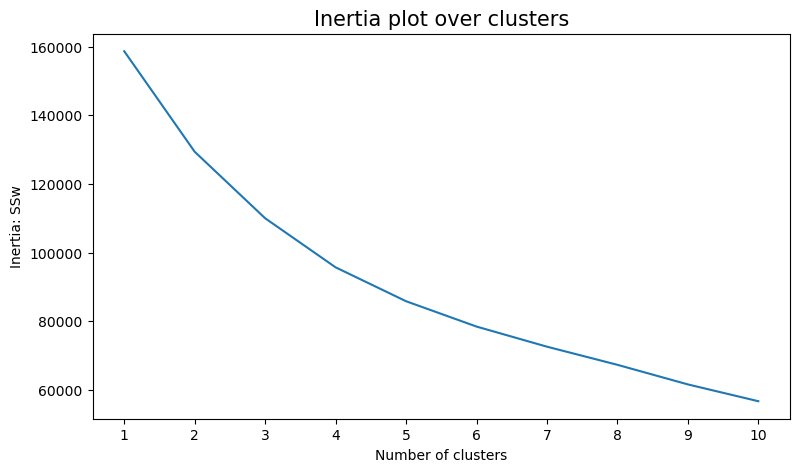

In [35]:
# Display the inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

The Inertia plot shows that the optimal number of clusters (elbow point) is somewhere between K=2 and K=4.

For n_clusters = 2, the average silhouette_score is : 0.6139707012687379
For n_clusters = 3, the average silhouette_score is : 0.4798580920972597
For n_clusters = 4, the average silhouette_score is : 0.5453450220504071
For n_clusters = 5, the average silhouette_score is : 0.491732361496769
For n_clusters = 6, the average silhouette_score is : 0.39977848020810364
For n_clusters = 7, the average silhouette_score is : 0.43261935137136825
For n_clusters = 8, the average silhouette_score is : 0.3913309269073887
For n_clusters = 9, the average silhouette_score is : 0.4077071448000825
For n_clusters = 10, the average silhouette_score is : 0.3472771278568211


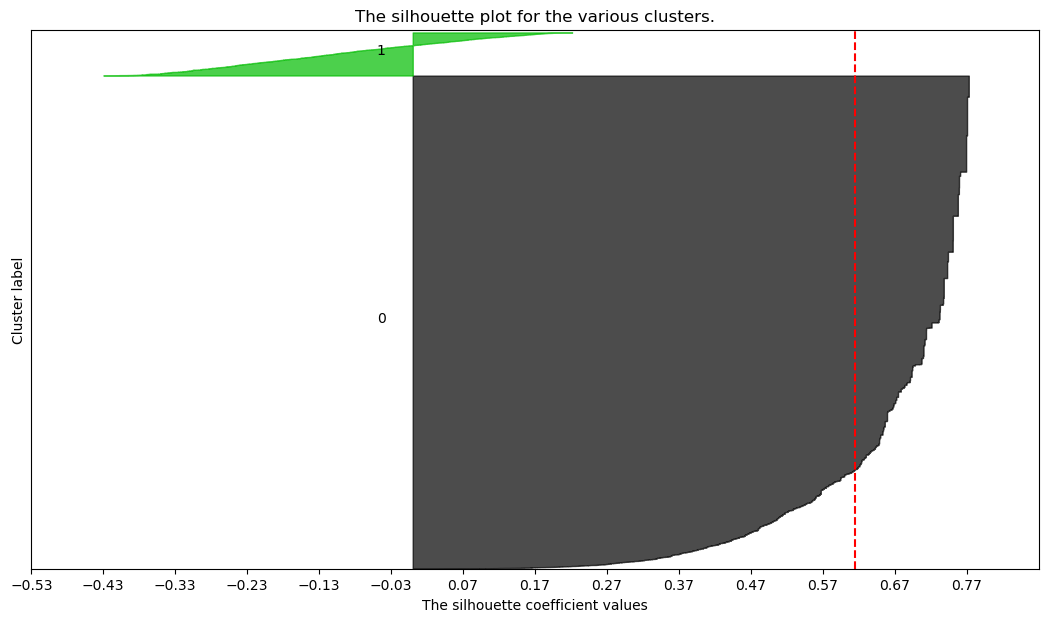

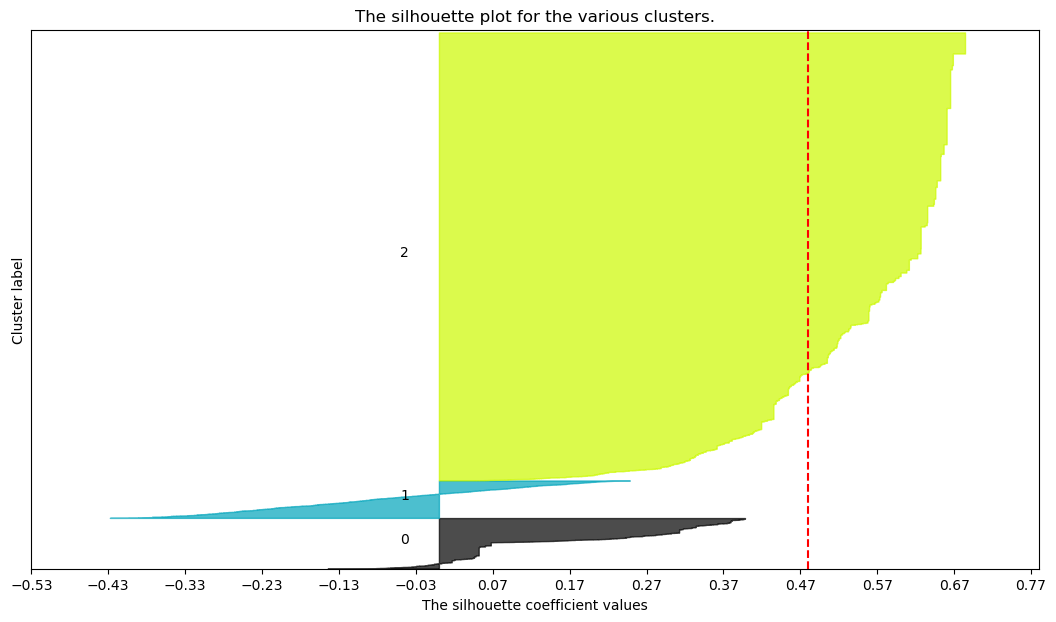

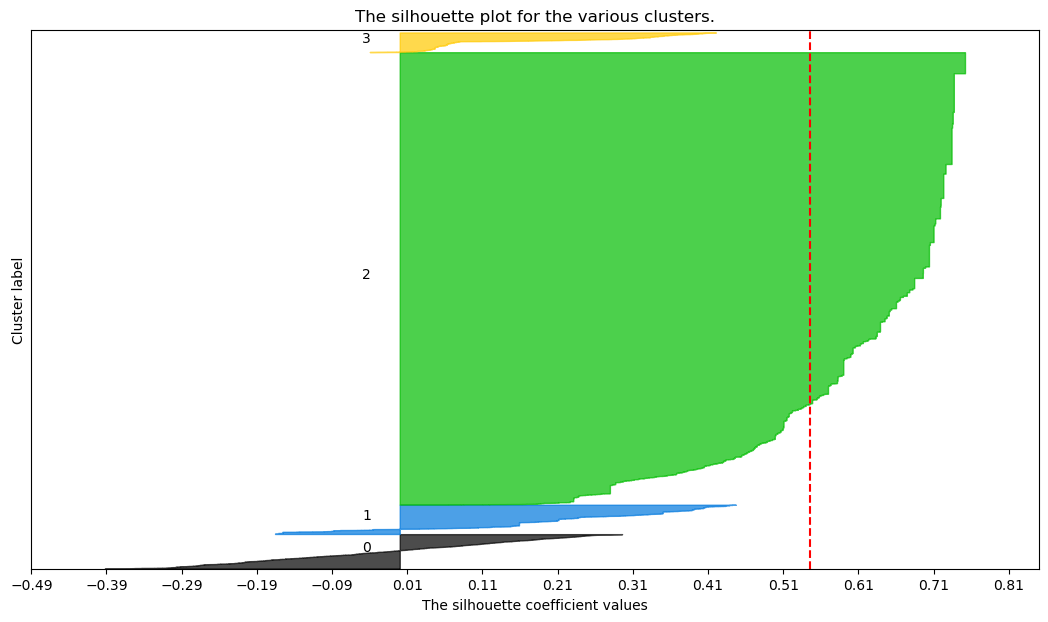

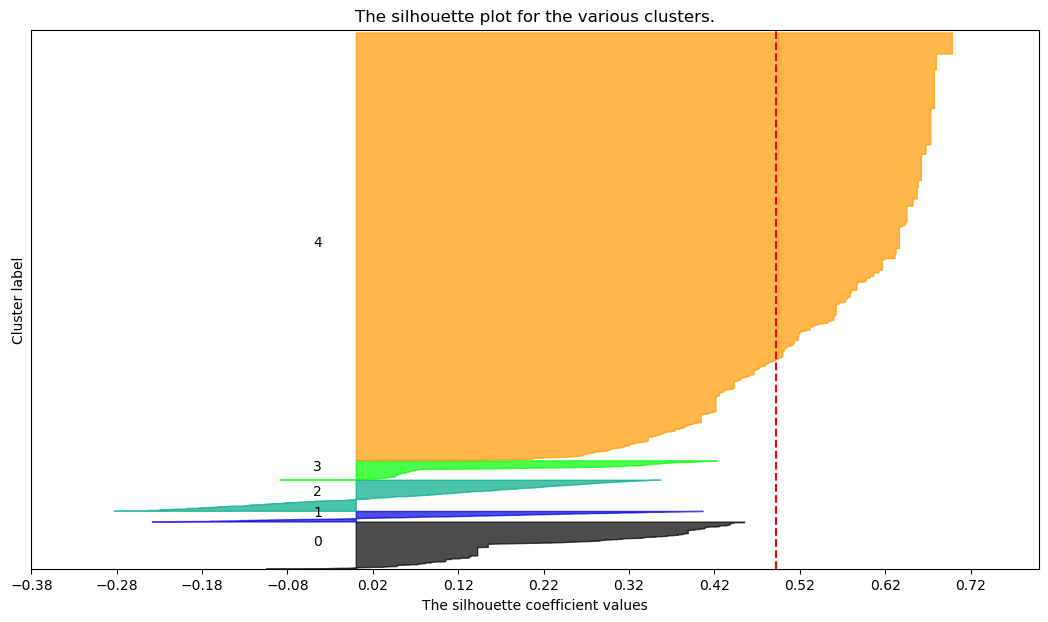

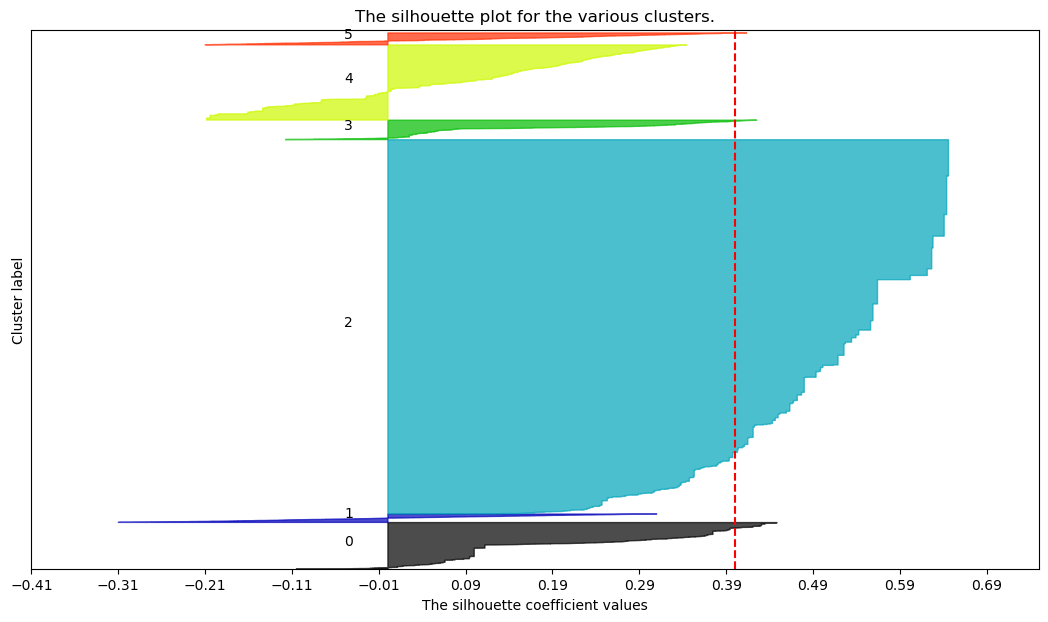

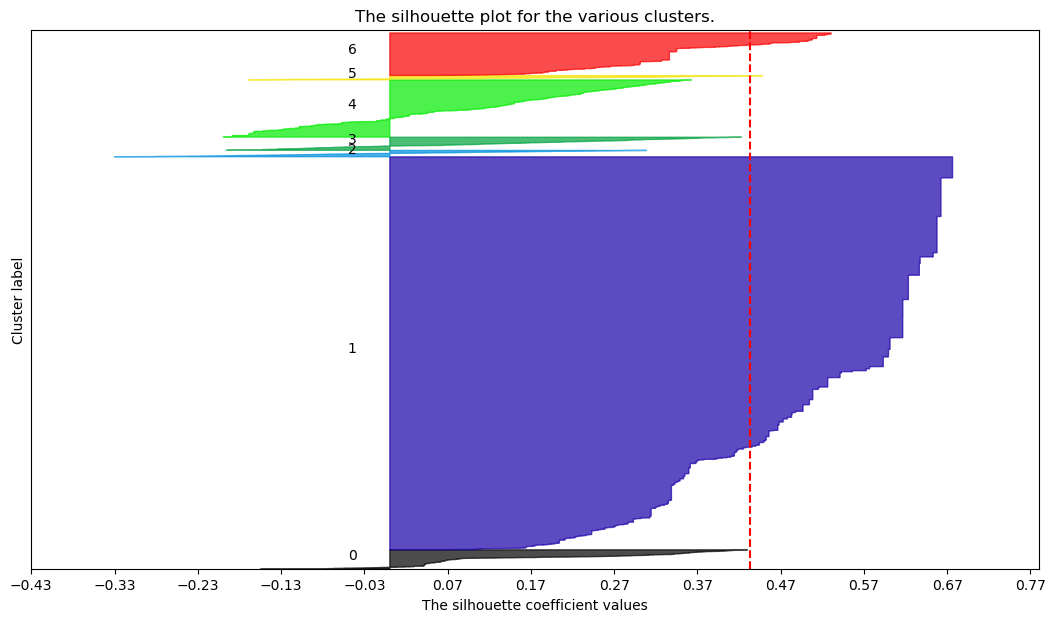

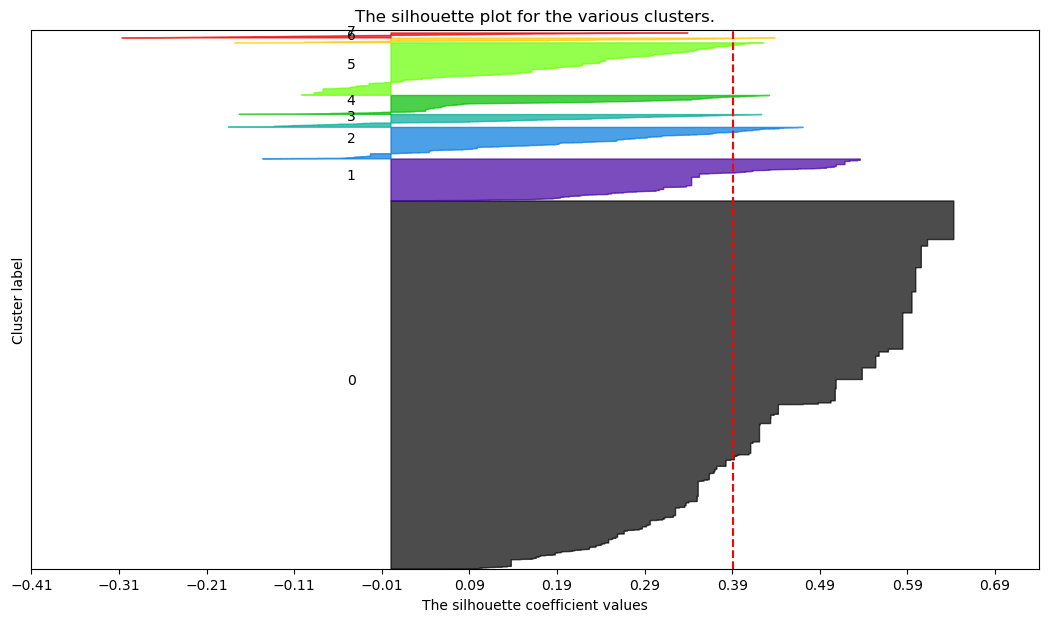

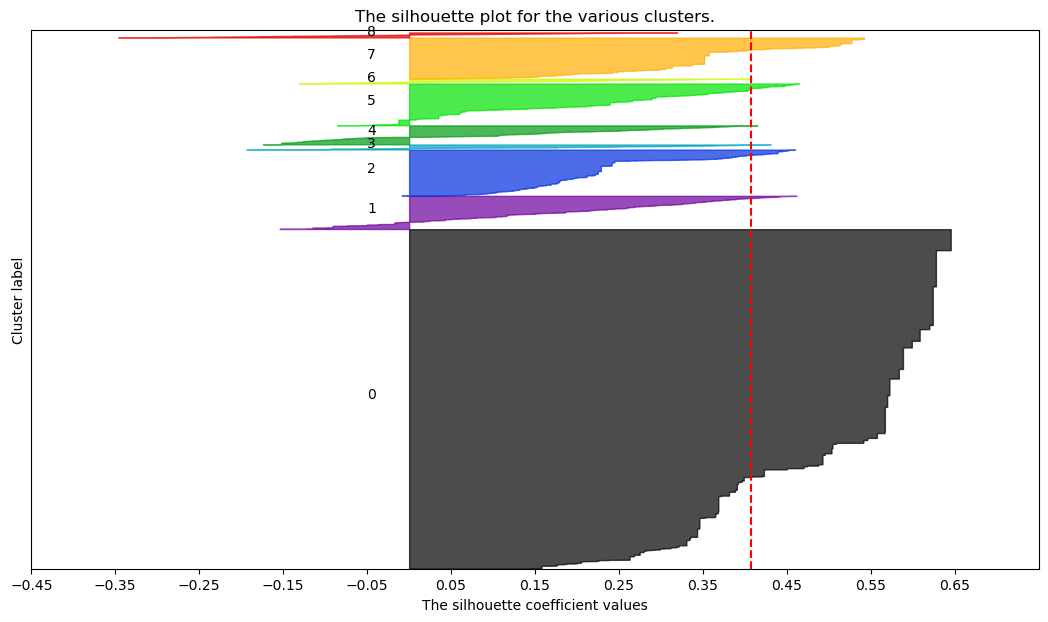

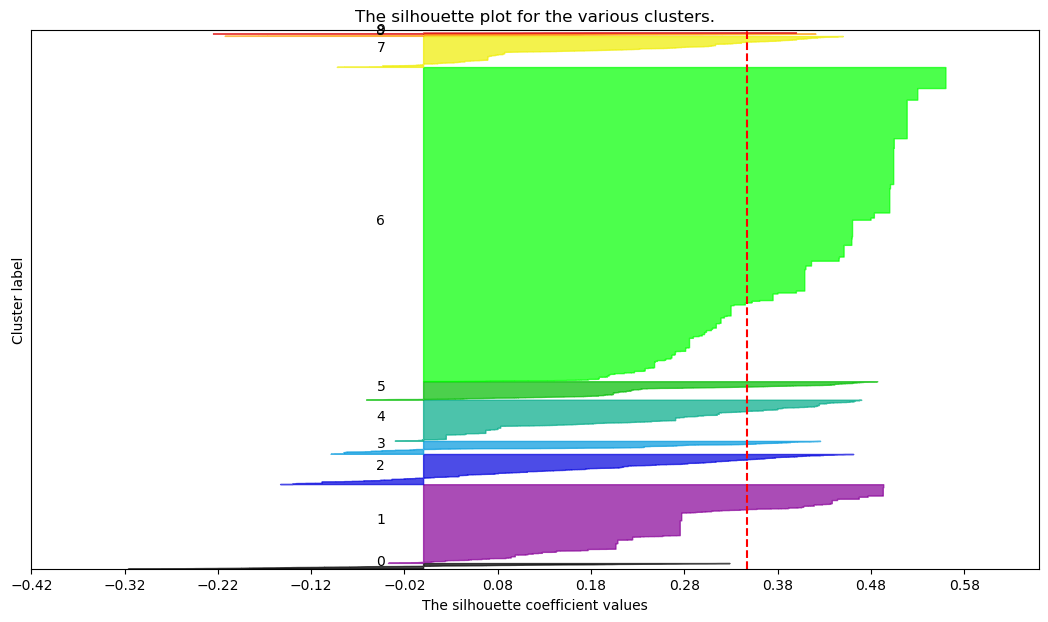

In [36]:
#Display the Silhouette plots for time of order features

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(time_of_order_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(time_of_order_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(time_of_order_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

The Silhouette plots show significantly more negative values starting at K=8. Based on Silhouette score, K=2 and K=4 are the best solutions (highest Silhouette scores).

Selecting K=4 Clusters
While k=2 shows the highest silhouette score (0.614), we chose k=4 clusters because:

- Elbow plot showed somewhere between K=2 and K=4
- It provides better business insights than 2 clusters (more granular customer segmentation)
- Has a strong silhouette score of 0.545, indicating good cluster separation
- Balances complexity (number of clusters) with cluster quality

In [37]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat.groupby('labels').mean()

morning_orders   midday_orders   evening_orders   night_orders   \
labels                                                                    
0              1.301696        2.316109         2.219957       0.090616   
1              0.693304       -0.154906        -0.513519       0.003491   
2             -0.141505       -0.171163        -0.148221      -0.169152   
3             -0.054049        0.115199         0.289718       3.740848   

        drinking_orders   
labels                    
0              -0.272623  
1               3.110265  
2              -0.186247  
3               0.136044

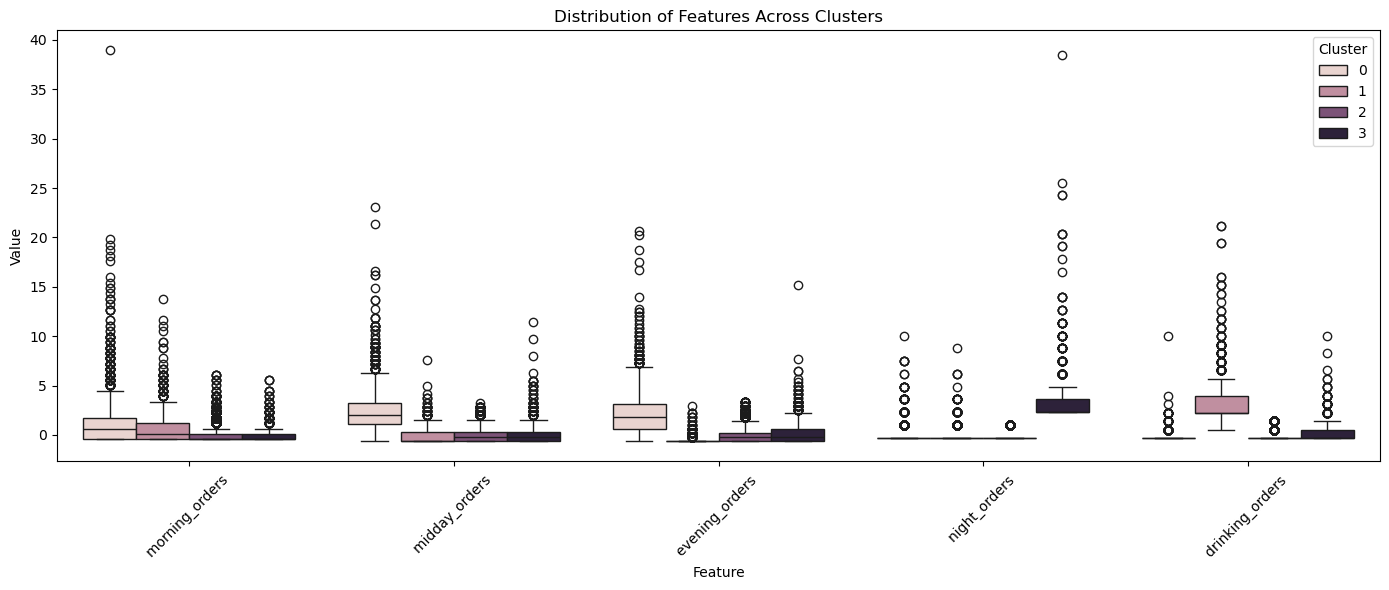

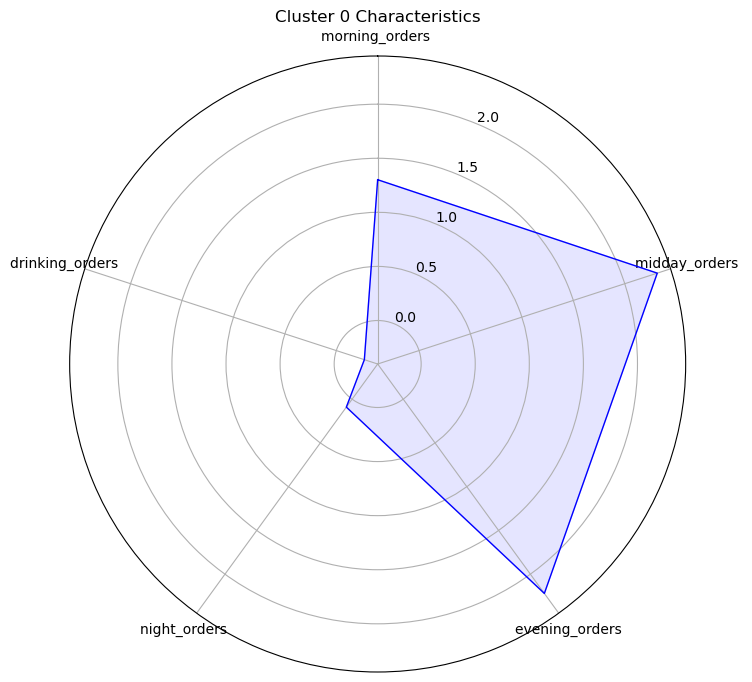

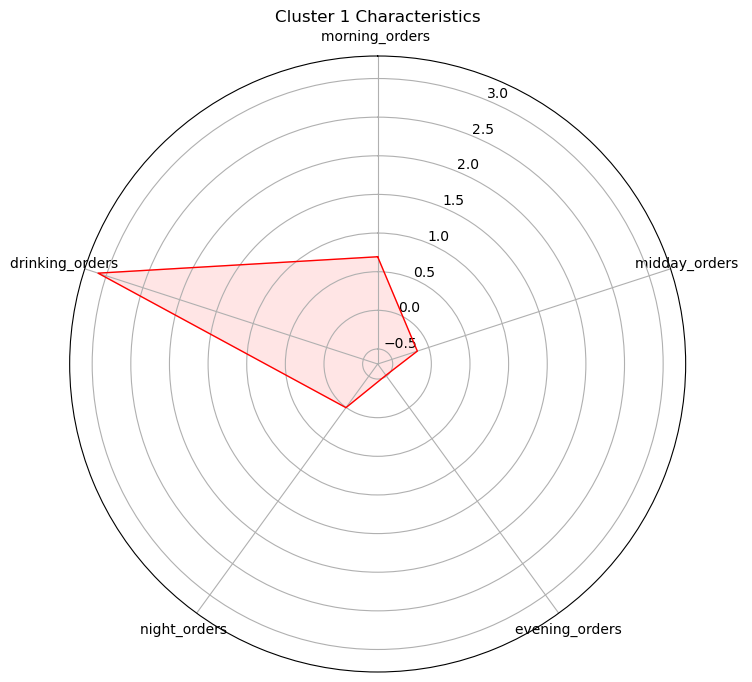

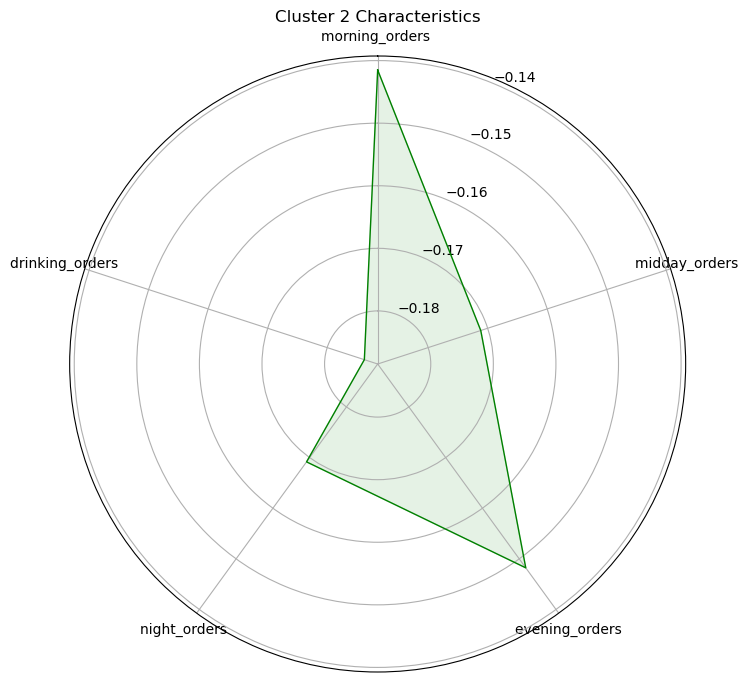

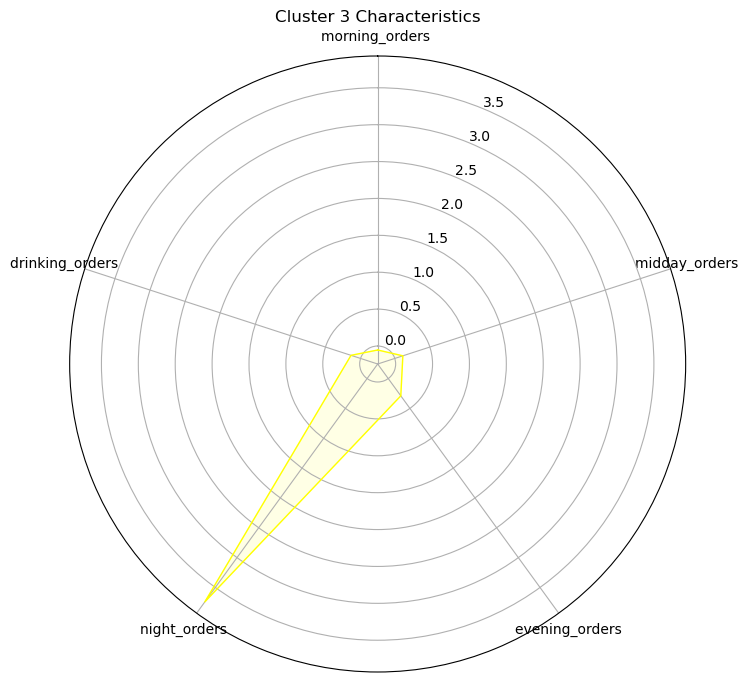

Cluster Centroids:
         morning_orders   midday_orders   evening_orders   night_orders   \
Cluster                                                                    
0               1.301696        2.316109         2.219957       0.090616   
1               0.693304       -0.154906        -0.513519       0.003491   
2              -0.141505       -0.171163        -0.148221      -0.169152   
3              -0.054049        0.115199         0.289718       3.740848   

         drinking_orders   
Cluster                    
0               -0.272623  
1                3.110265  
2               -0.186247  
3                0.136044  


In [39]:


# Assuming df_scaled_new is your scaled dataframe
def perform_clustering_analysis(df_scaled_new):
    # Select time of order features
    time_of_order_features = df_scaled_new[['morning_orders ', 'midday_orders ', 'evening_orders ', 'night_orders ', 'twilight_orders ']]

    # Perform K-means clustering
    kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
    km_labels = kmclust.fit_predict(time_of_order_features)

    # Concatenate labels with features
    df_concat = pd.concat([time_of_order_features, pd.Series(km_labels, name='Cluster', index=time_of_order_features.index)], axis=1)



    plt.figure(figsize=(14, 6))
    df_melted = df_concat.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melted)
    plt.title('Distribution of Features Across Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



    def make_spider(df, row, title, color):
        categories = list(df.columns)
        N = len(categories)
        
        # Prepare values
        values = df.iloc[row].tolist()
        values += values[:1]
        
        # Calculate angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
        ax.plot(angles, values, color=color, linewidth=1)
        ax.fill(angles, values, color=color, alpha=0.1)
        
        # Fix axis to go in the right order and start at 12 o'clock
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        
        # Draw axis lines for each angle and label
        plt.xticks(angles[:-1], categories)
        
        plt.title(title)
        plt.show()

    # Prepare cluster means
    cluster_means = df_concat.groupby('Cluster').mean()

    # Create radar charts
    make_spider(cluster_means, 0, 'Cluster 0 Characteristics', 'blue')
    make_spider(cluster_means, 1, 'Cluster 1 Characteristics', 'red')
    make_spider(cluster_means, 2, 'Cluster 2 Characteristics', 'green')
    make_spider(cluster_means, 3, 'Cluster 3 Characteristics', 'yellow')

    # 5. Cluster Centroids Comparison
    print("Cluster Centroids:")
    print(cluster_means)

    return km_labels, cluster_means

# Call the function with your scaled dataframe
km_labels, cluster_means = perform_clustering_analysis(df_scaled_new)

<a href="#Index">Back to Index</a>

# t-SNE

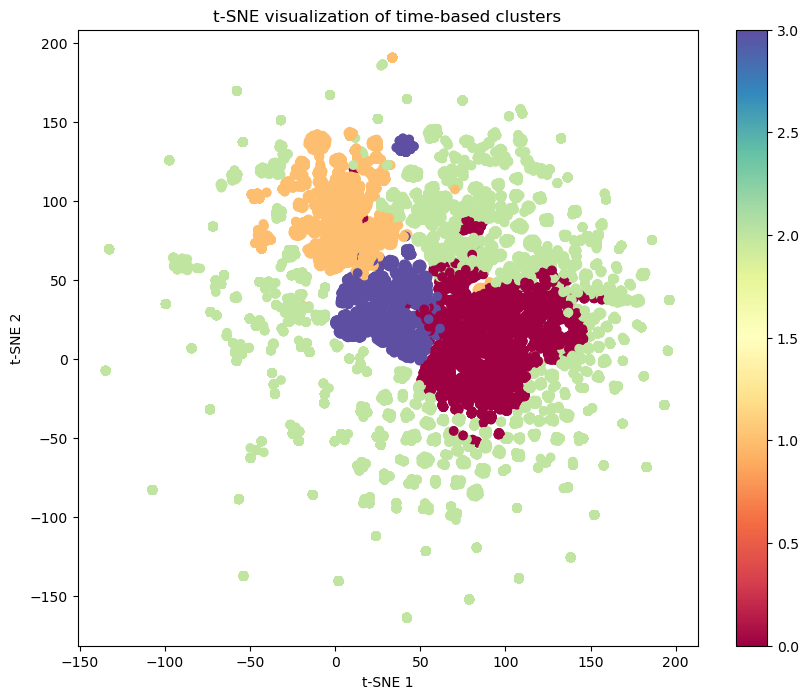

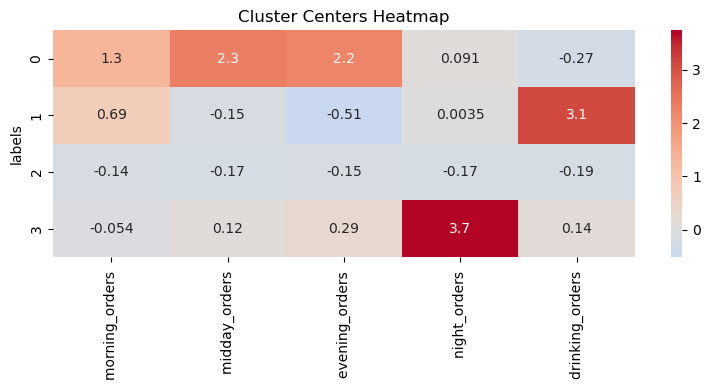

In [40]:


# Create t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_of_order_features)

# Create visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=km_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('t-SNE visualization of time-based clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Add cluster center heatmap
centers_df = df_concat.groupby('labels').mean()
plt.figure(figsize=(8, 4))
sns.heatmap(centers_df, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Centers Heatmap')
plt.tight_layout()
plt.show()

# DBSCAN

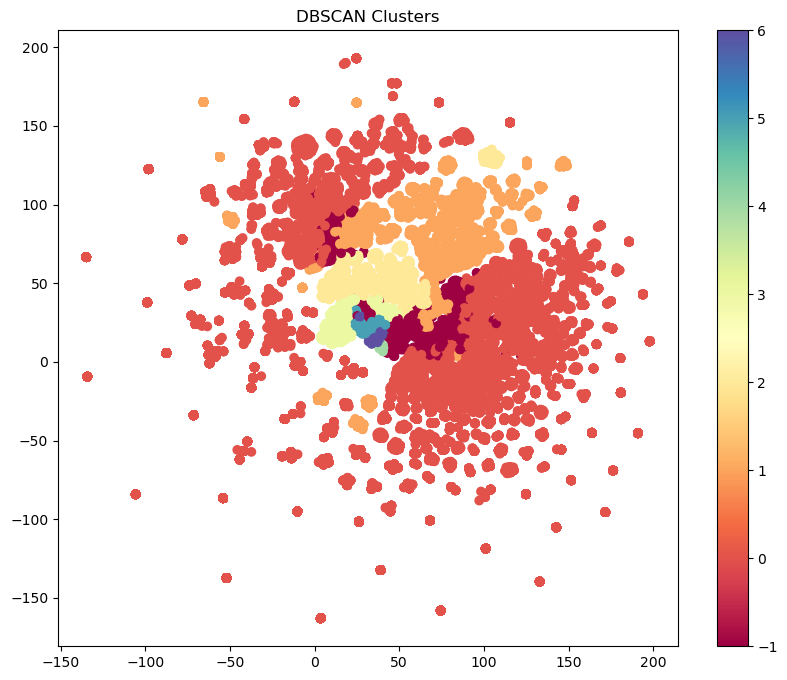

DBSCAN - Clusters: 7, Noise: 531


In [91]:


# Perform DBSCAN 
dbscan = DBSCAN(eps=1.2, min_samples=6)
dbscan_labels = dbscan.fit_predict(time_features_scaled)

# Visualize
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_features_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('DBSCAN Clusters')
plt.show()

print(f'DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, Noise: {list(dbscan_labels).count(-1)}')

<a href="#Index">Back to Index</a>

# Hierarchical Clustering

<a href="#Index">Back to Index</a>

# SOM

**Some generally used functions:**

In [18]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Grays,    # colormap to use
                  annot=False       
                  ):

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)




    return sf 

In [20]:
order_time_features = [
    'morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'twilight_orders'
]
order_time_features

['morning_orders',
 'midday_orders',
 'evening_orders',
 'night_orders',
 'drinking_orders']

In [21]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 15
N = 15
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(order_time_features)
learning_rate = .7


som_data = df_treated[order_time_features].values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))


Before training:
QE 0.6927
TE 0.9718
After training:
QE 0.4518
TE 0.212


In [24]:
# Get the weights from the trained SOM
weights = sm.get_weights()

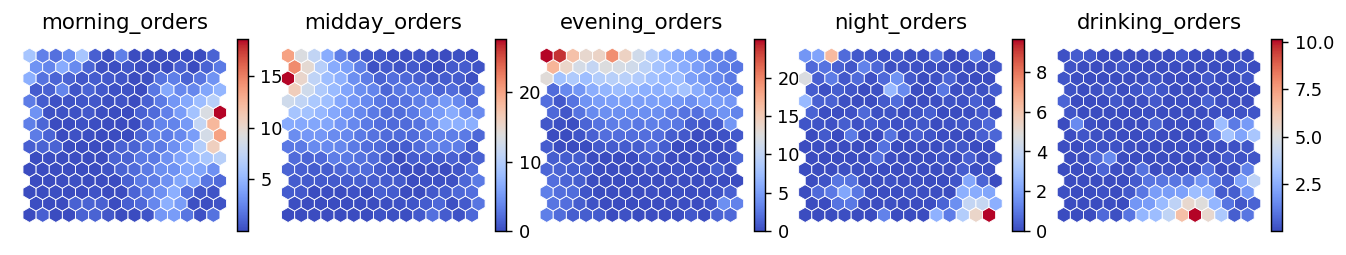

In [25]:
##############################
# Plot Component Planes
##############################
figsize=(10, 10)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(1,5,wspace=.05, hspace=.05)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(order_time_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=order_time_features[cpi],
                    cmap=cm.coolwarm,
                    )

These Self-Organizing Maps (SOMs) show ordering patterns across different times of day in what appears to be a restaurant or food service setting.
Key patterns:
- Morning: Scattered hotspots, suggesting variable breakfast order patterns
- Midday: More concentrated hotspots, indicating consistent lunch rush patterns
- Evening: Distinct clusters, showing regular dinner service patterns
- Night: Mostly uniform with one strong outlier, suggesting late-night ordering follows predictable patterns
- Drinking: Very uniform with minimal variation, indicating consistent beverage ordering behavior

The color scales vary (0-15, 0-20, 0-8, etc.), showing different intensity ranges for each time period. The hexagonal grid pattern helps visualize clustering of similar orders.
The darker red spots represent order peaks or anomalies in the typical patterns, while the blue regions show baseline ordering behavior.

<a href="#Index">Back to Index</a>

# Cluster Characteristics

Cluster 0 (Day-Evening Active Customers):
- High positive values for morning (1.30), midday (2.32), and evening (2.22) orders
- These are customers who order consistently throughout the day and evening but avoid late-night ordering
- Represents balanced, regular customers who might be ordering for both personal and business purposes

Cluster 1 (Twilight (1am - 5am) Active Customers):
- Extremely high value for twilight hours (3.11)
- These customers show a distinctive pattern of ordering during very late hours
- Likely represents young professionals or students with non-traditional schedules who stay up late

Cluster 2 (Lower-Frequency Customers):
- All slightly negative values across different time periods
- Consistently lower engagement (-0.14 to -0.19 across all times)
- These customers order slightly less frequently than average across all time periods
- Could represent occasional users or price-sensitive customers
- Since they are not significantly lower for any time, it is likely that these are customers who simply do not frequently order at any particular time

Cluster 3 (Night-Time Active Customers):
- Extremely high value for night orders (3.74)
- These customers strongly prefer ordering during night hours
- Might represent late-night workers or entertainment venue orders

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11!
3. Hierarchical Clustering Results:
Your hierarchical clustering reveals an interesting size distribution:
- Cluster 0: 3,721 customers
- Cluster 1: 3,435 customers
- Cluster 2: 1,375 customers
- Cluster 3: 23,206 customers

This distribution shows that the majority of customers (23,206) fall into Cluster 3, suggesting that night-time ordering is the dominant pattern in your customer base. 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# Visualization Insights:
The t-SNE visualizations show clear separation between clusters based on order time, which validates the statistical findings from the silhouette analysis. The DBSCAN results suggest there might be some noise in the data, but the core clusters are still distinguishable.

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.3.'></a>
># 2.2. Cuisine Preference Clustering 

This perspective includes all CUI (cuisine features) to identify trends in customer cuisine preference. Because there are 15 types of cuisines, principal component analysis (PCA) was performed prior to clustering to reduce the dimensionality while preserving as much information as possible.

In [ ]:
df_scaled_new.head()

In [24]:
#Select only CUI features
cui_features = df_scaled_new[[col for col in df_scaled_new.columns if 'CUI_' in col]]

# Clean column names
cui_features.columns = cui_features.columns.str.strip()

In [25]:
cui_features.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
0     -0.410078  -0.418056      -0.265138  -0.12277           -0.201661   
1      0.630296  -0.162487      -0.265138  -0.12277           -0.201661   
2      0.370202  -0.418056      -0.265138  -0.12277           -0.201661   
3     -0.410078   0.135676      -0.265138  -0.12277           -0.201661   
4      0.803692   1.285734      -0.265138  -0.12277           -0.201661   

   CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
0    -0.170076        -0.165    -0.159448    3.585545    -0.282046   
1    -0.170076        -0.165    -0.159448   -0.215182    -0.282046   
2    -0.170076        -0.165    -0.159448   -0.215182    -0.282046   
3    -0.170076        -0.165    -0.159448    2.092402    -0.282046   
4    -0.170076        -0.165    -0.159448   -0.215182    -0.282046   

   CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
0     -0.288428          -0.151853  -0.300205                 -0.249486   
1     -0.288428          -0.151853  -0.300205                 -0.249486   
2     -0.288428          -0.151853  -0.300205                 -0.249486   
3     -0.288428          -0.151853  -0.300205                 -0.249486   
4     -0.288428          -0.151853  -0.300205                 -0.249486   

   CUI_Thai  
0 -0.185513  
1 -0.185513  
2 -0.185513  
3 -0.185513  
4 -0.185513

# Check correlation between dishes

<Figure size 1200x800 with 0 Axes>

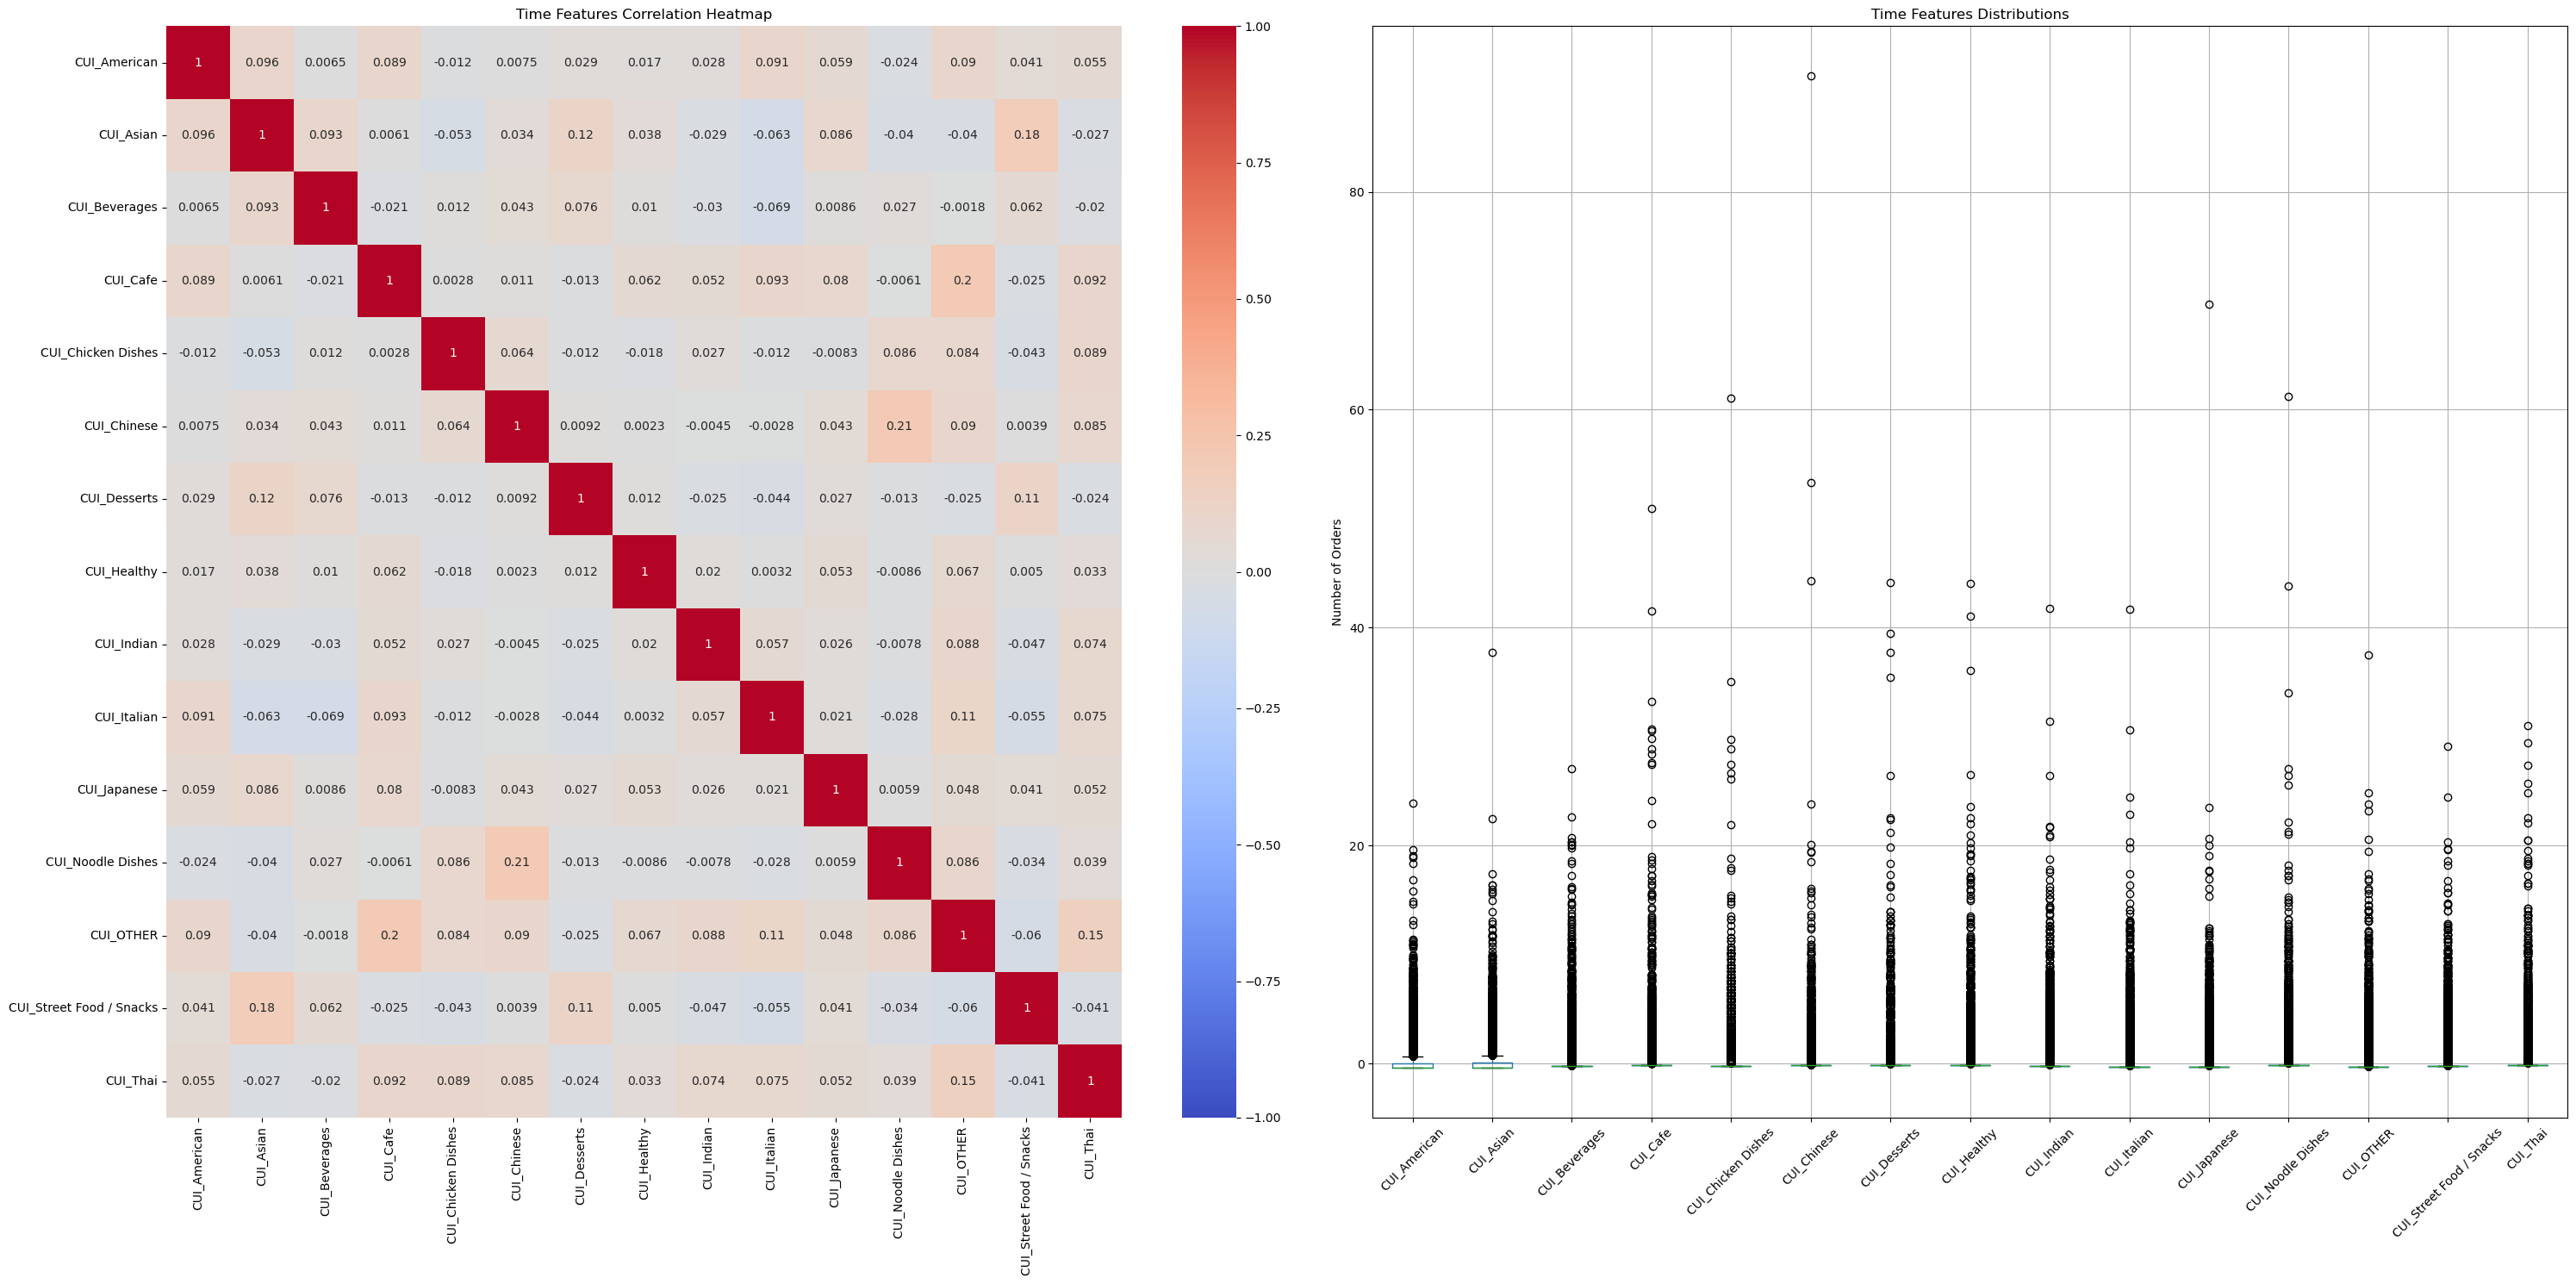

In [27]:
# Calculate correlation matrix for time features
correlation_matrix = cui_features.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create subplots for different visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            ax=ax1)
ax1.set_title('Time Features Correlation Heatmap')

# 2. Distribution Plots
cui_features.boxplot(ax=ax2)
ax2.set_title('Time Features Distributions')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

According to the Spearman Correlation matrix (above), none of the cuisines are highly correlated with each other.

# Apply Principal Component Analysis (PCA) to reduce dimensionality of the data

In [51]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(cui_features)
pca_feat  

array([[ 0.46665169, -0.89546983, -0.57945073, ..., -0.00237312,
         0.22992168, -0.392359  ],
       [-0.31839799, -0.3168384 , -0.28110725, ..., -0.10776101,
         0.14908952, -0.10633307],
       [-0.32038875, -0.5347762 , -0.21150035, ..., -0.19916236,
         0.22721094, -0.11368767],
       ...,
       [-0.96323834,  0.39971439,  0.16606495, ..., -0.03807676,
         0.18042291, -0.08832274],
       [-0.54700073, -0.50903533, -0.03700112, ...,  0.29558785,
        -0.13075023,  0.03439813],
       [-0.2715497 , -0.8147268 , -0.21608266, ...,  0.08281477,
         0.00921489, -0.0747475 ]])

In [52]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

Eigenvalue  Difference  Proportion  Cumulative
1     1.601085    0.000000    0.106736    0.106736
2     1.412022   -0.189064    0.094132    0.200867
3     1.287817   -0.124204    0.085852    0.286719
4     1.014040   -0.273777    0.067601    0.354320
5     0.999167   -0.014873    0.066609    0.420929
6     0.965874   -0.033293    0.064390    0.485318
7     0.936767   -0.029107    0.062449    0.547768
8     0.920524   -0.016242    0.061366    0.609134
9     0.909290   -0.011235    0.060617    0.669751
10    0.893602   -0.015688    0.059572    0.729323
11    0.881275   -0.012327    0.058750    0.788073
12    0.858517   -0.022758    0.057233    0.845305
13    0.801868   -0.056649    0.053456    0.898762
14    0.762643   -0.039226    0.050841    0.949603
15    0.755981   -0.006662    0.050397    1.000000

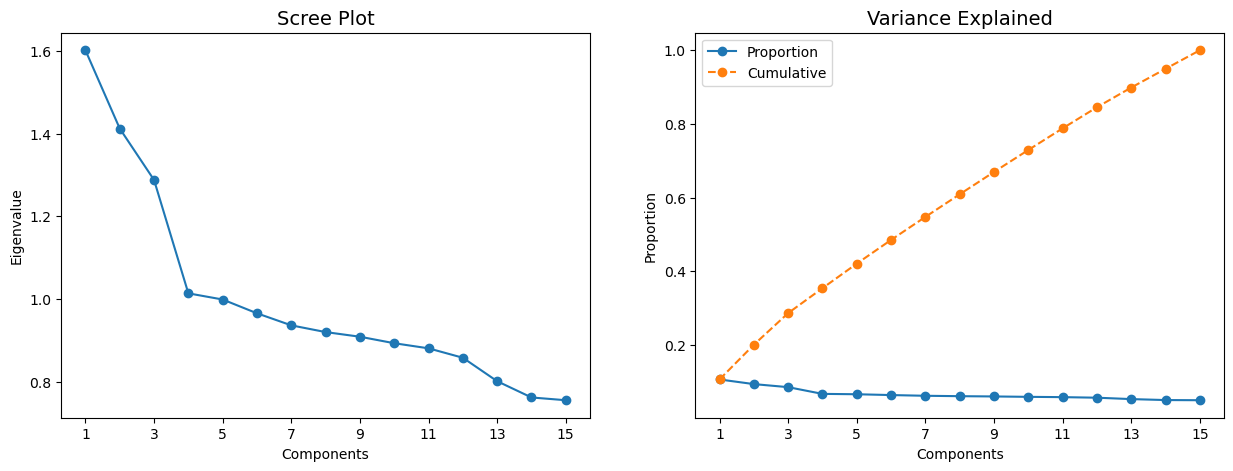

In [53]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots

ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
         marker=".", markersize=12)

ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, label="Proportion")

ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

The Scree Plot tells us we should likely have 4 components based on the elbow point. The Variance Explained indicates that 4 components would only explain 40% of the variance in the data. 11 components would be required to explain 80% of the variance.

# We should do all of this again with n_components=11

In [29]:
# Perform PCA again with 4 principal components (based on Scree Plot)
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(cui_features)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=cui_features.index, columns=pca_feat_names)  
pca_df

PC0       PC1       PC2       PC3
0      0.466678 -0.897522 -0.601508  0.480981
1     -0.318572 -0.306812 -0.269613 -0.332868
2     -0.320510 -0.528901 -0.208661 -0.198098
3      0.007508 -0.557096 -0.389526  0.319783
4     -0.537941  0.524842 -0.331455 -0.502310
...         ...       ...       ...       ...
31732 -0.693119 -0.193388  0.472306  0.363317
31733 -0.182298 -0.272793 -0.378795 -0.554651
31734 -0.962626  0.366036  0.108168 -0.023479
31735 -0.546987 -0.511570 -0.047008  0.126616
31736 -0.271521 -0.818370 -0.233949 -0.066430

[31737 rows x 4 columns]

<a href="#Index">Back to Index</a>

# Apply K-Means on the principal components

In [30]:
#Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(pca_df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

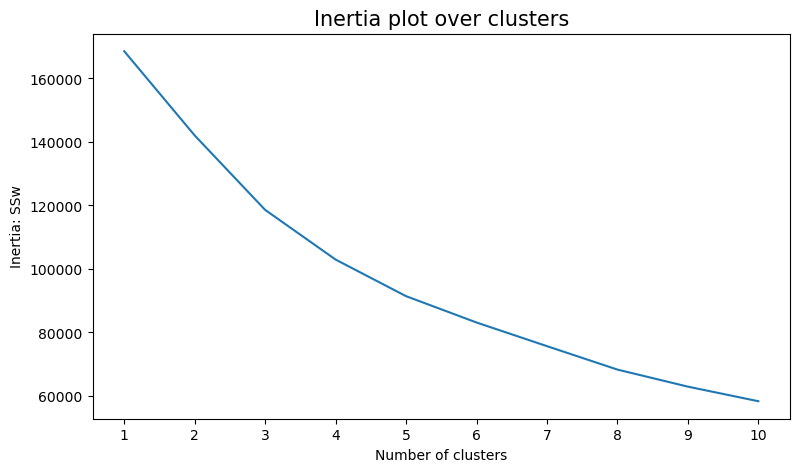

In [31]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

The Inertia Plot does not show a distinct elbow point. The curve is very smooth. However, the optimal K seems to be between K=3 and K=5.

For n_clusters = 2, the average silhouette_score is : 0.6774826757435675
For n_clusters = 3, the average silhouette_score is : 0.5670220516323189
For n_clusters = 4, the average silhouette_score is : 0.5749722857438985
For n_clusters = 5, the average silhouette_score is : 0.5391222129110705
For n_clusters = 6, the average silhouette_score is : 0.47393688149427426
For n_clusters = 7, the average silhouette_score is : 0.41024812500793356
For n_clusters = 8, the average silhouette_score is : 0.4138021214649529
For n_clusters = 9, the average silhouette_score is : 0.4186536450051204
For n_clusters = 10, the average silhouette_score is : 0.36016645337280434


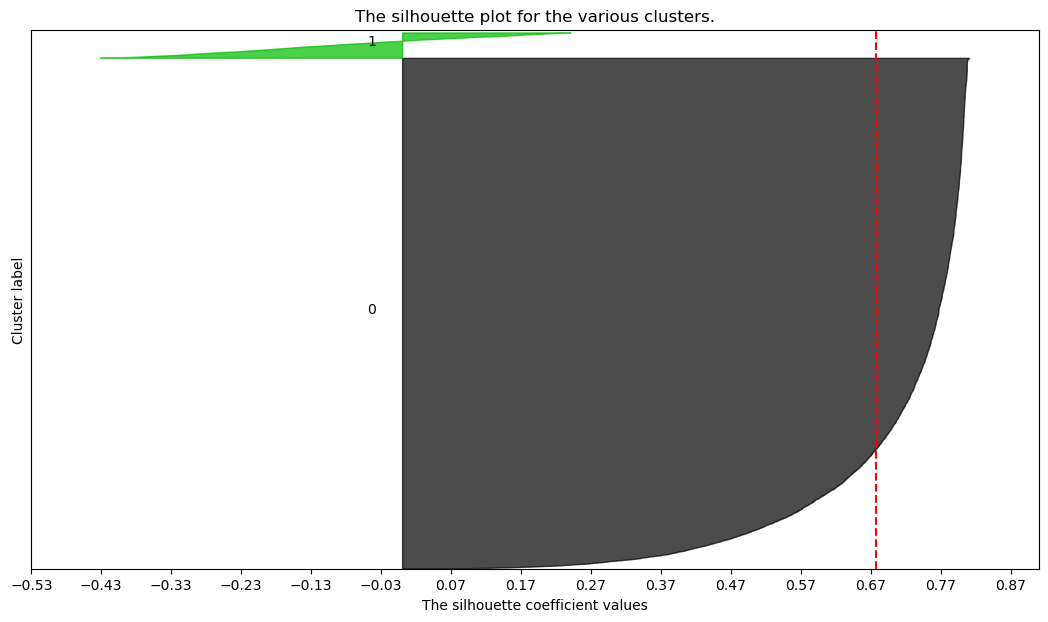

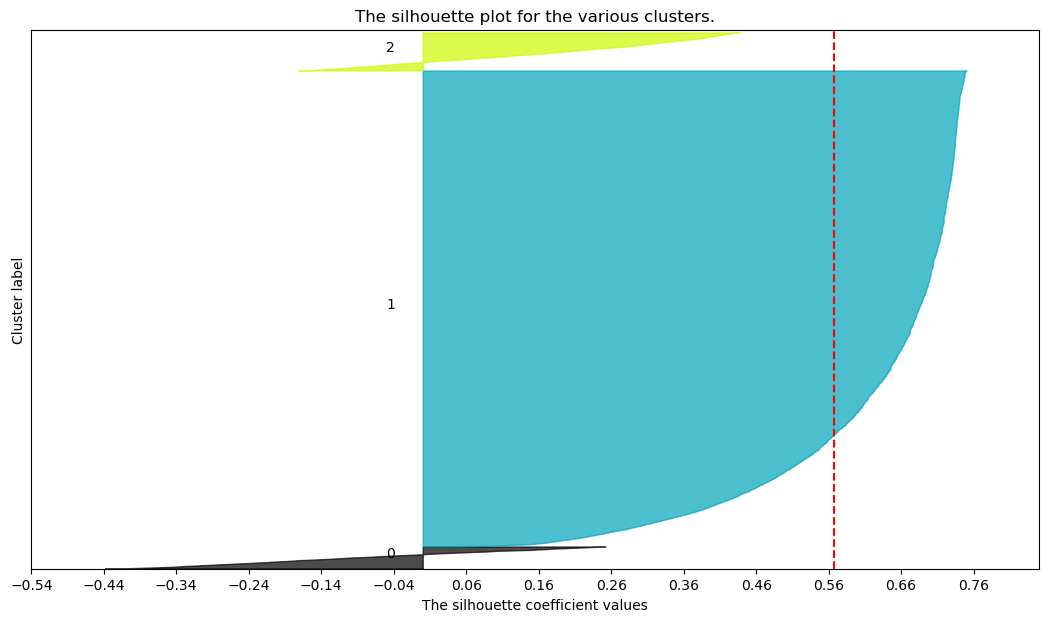

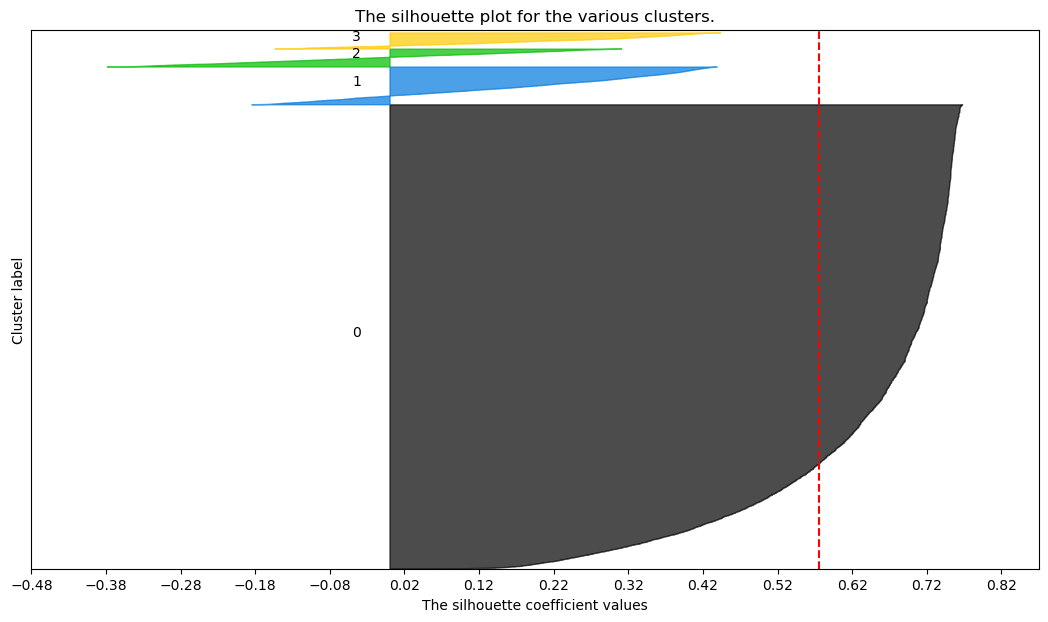

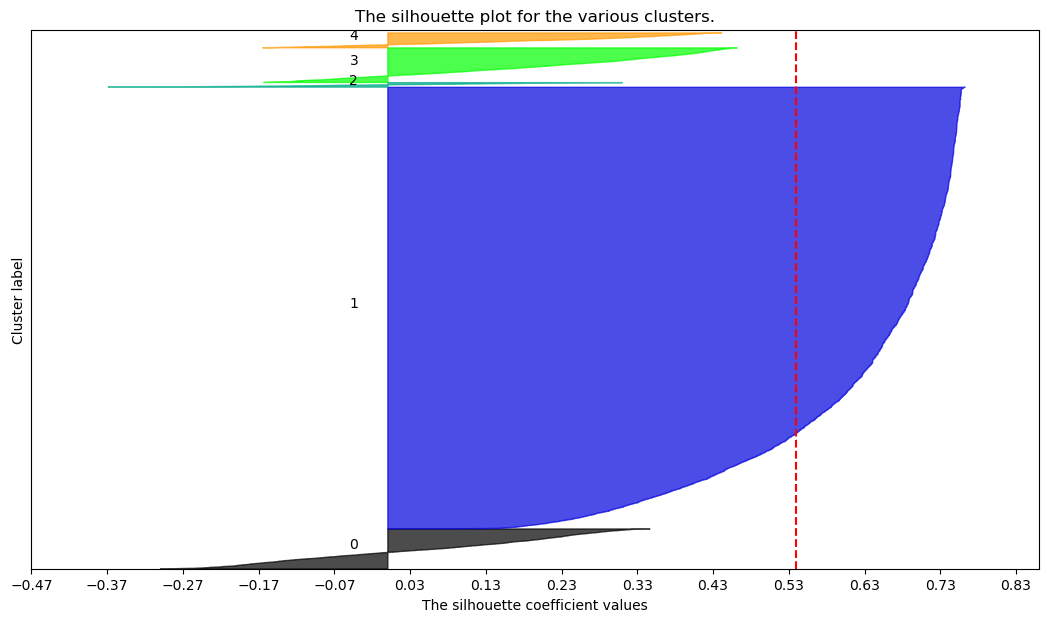

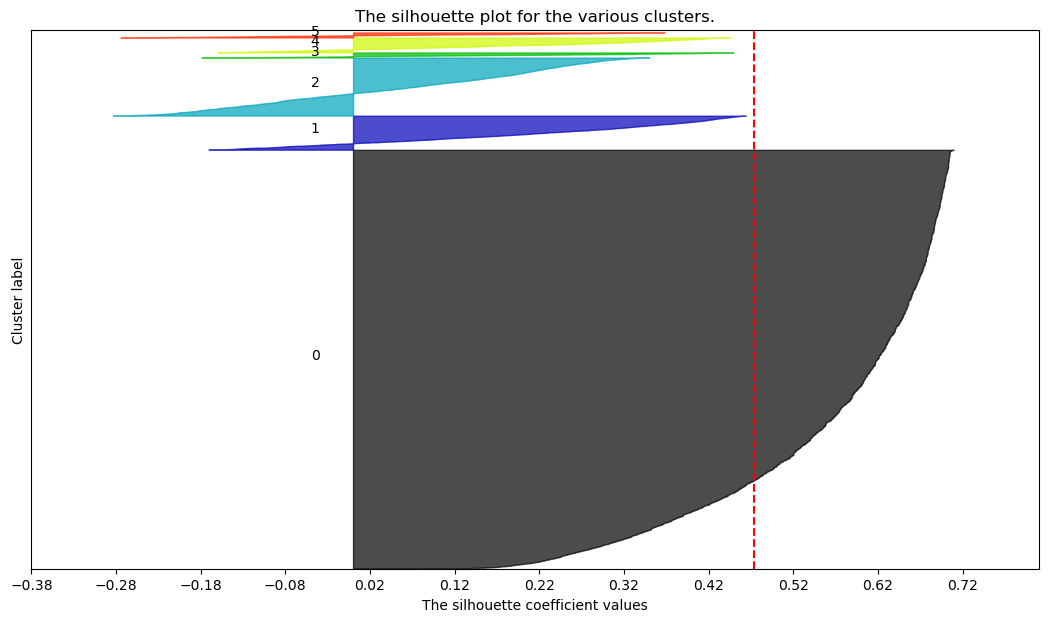

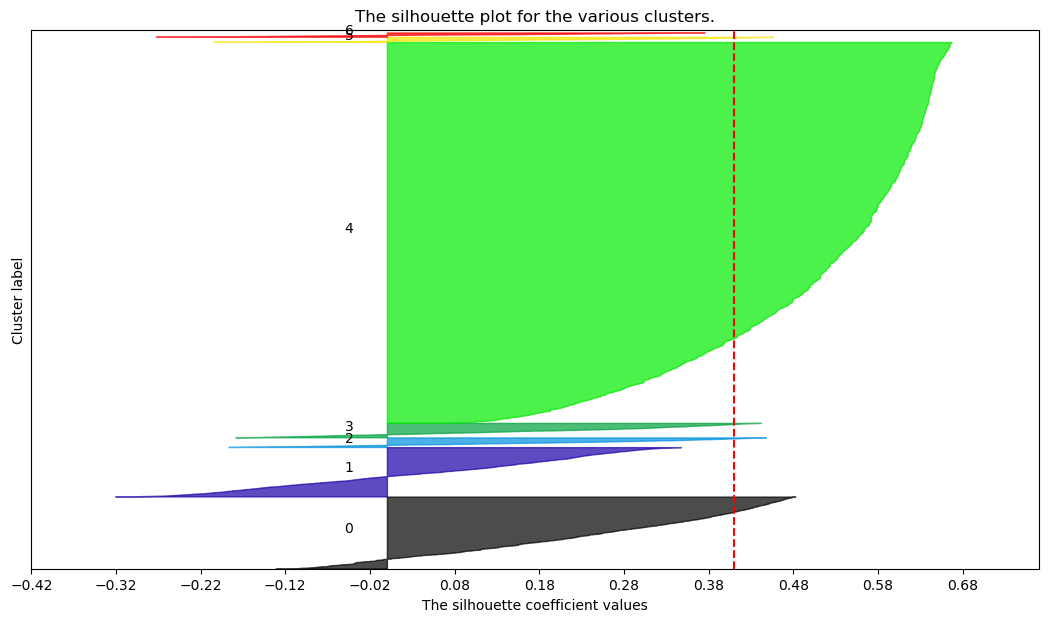

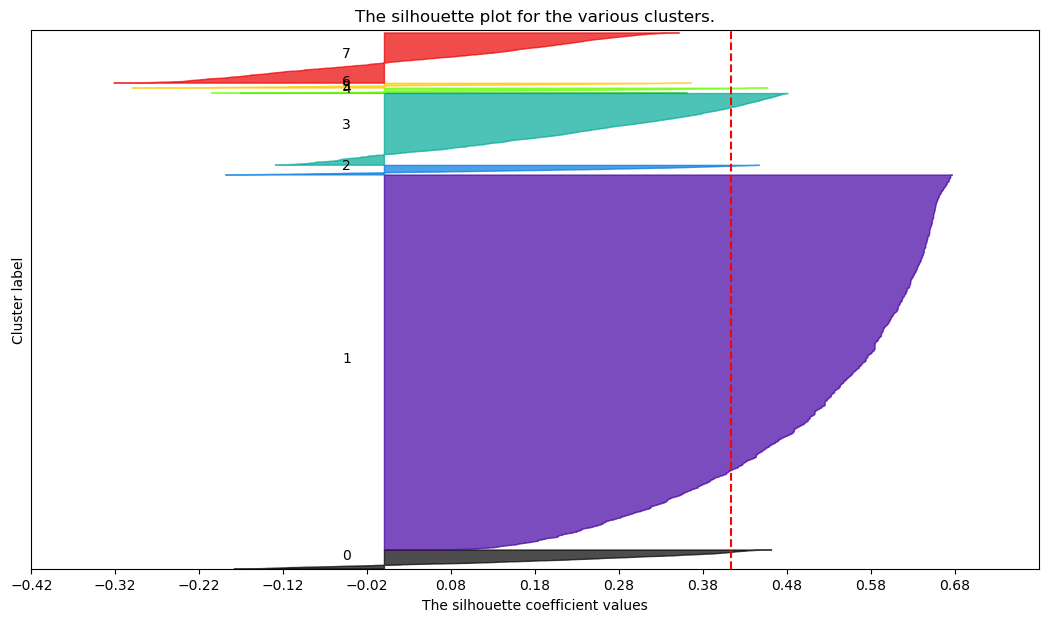

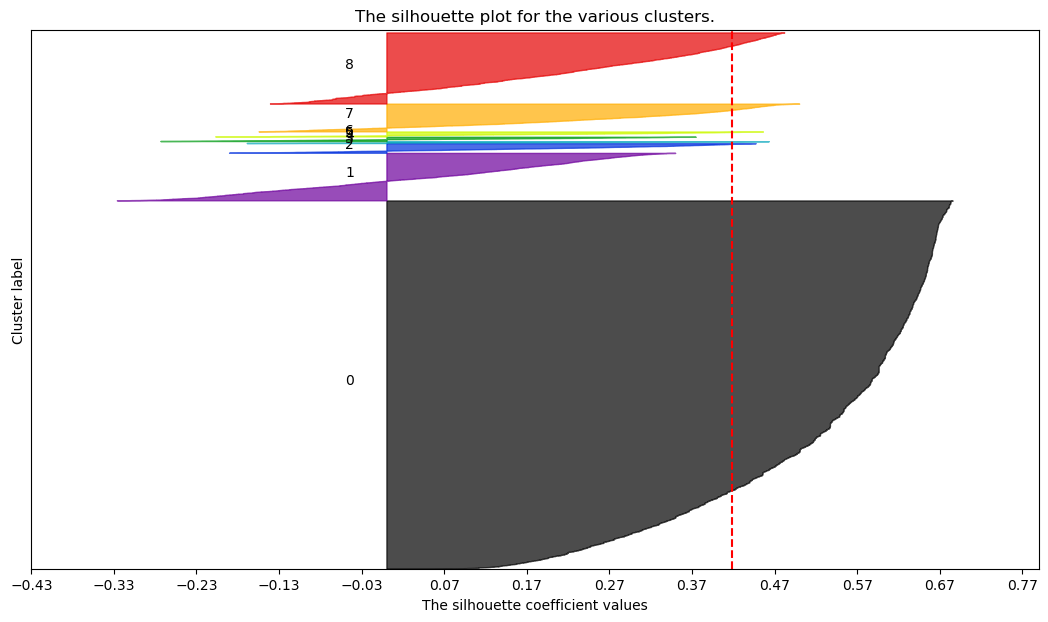

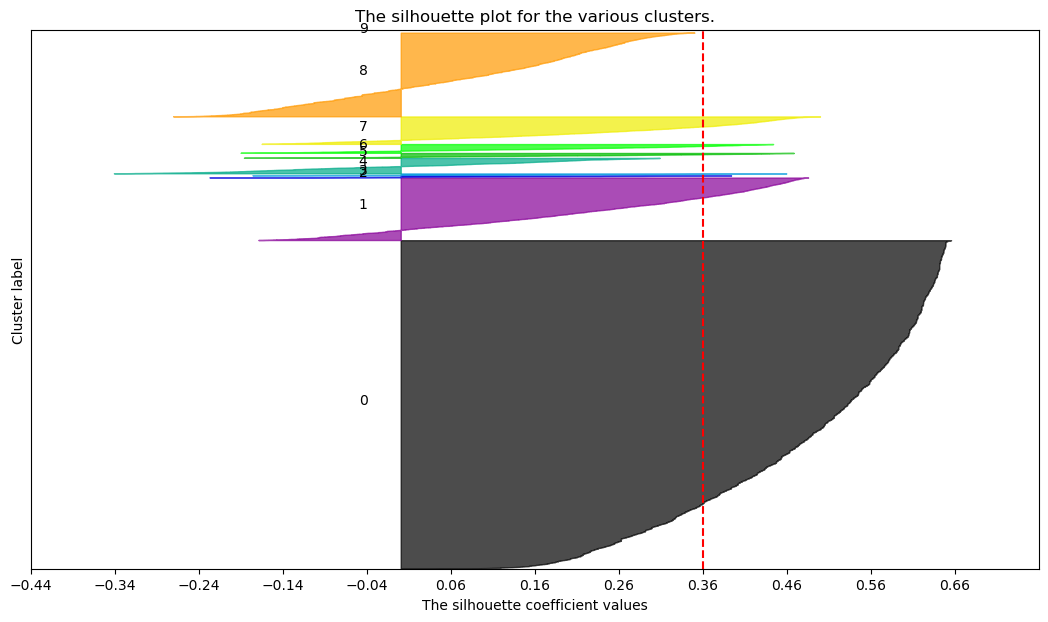

In [32]:
#Display the Silhouette plots PCA (4 components) for cusine features

# Storing average silhouette metric for cuisine features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(pca_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

The Silhouette plots begin to show significantly more negative values at K=6. The scores mirror this. 
- K=2 is the highest (0.67) 
- K=3 (0.57), K=4 (0.57), and K=5 (0.54) are similar
- Drop off beyond K=5

K=4 was chosen because it was in the middle of the acceptable inertia plot range (from K=3 to K=5) and had a strong silhouette score.

In [55]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(pca_df)
km_labels = kmclust.fit_predict(pca_df)

# Characterizing the final clusters
df_concat = pd.concat((pca_df, pd.Series(km_labels, name='labels', index=pca_df.index)), axis=1)
df_concat.groupby('labels').mean()

PC0       PC1       PC2       PC3
labels                                        
0      -0.124197 -0.289575 -0.055447  0.041269
1      -1.336353  2.878683  0.099116 -0.391120
2       3.950826  1.341739 -1.819727  0.016109
3       2.020052  0.185690  3.811099 -0.339889

Check correlations of principal components with the original features to understand what the principal components represent.

In [33]:
# Project the data onto the PCs
X_pca = pca.transform(cui_features)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(pca.n_components_)])

# Correlate original features with principal components
correlations = pd.DataFrame(
    np.dot(cui_features.T, X_pca_df) / (cui_features.shape[0] - 1),
    index=cui_features.columns,
    columns=[f'PC{i}' for i in range(pca.n_components_)]
)

print("Feature-PC Correlations:")
print(correlations)


Feature-PC Correlations:
                               PC0       PC1       PC2       PC3
CUI_American              0.283808  0.454371 -0.293615 -0.457955
CUI_Asian                -0.276425  0.752671 -0.024820 -0.061802
CUI_Beverages            -0.174921  0.392398  0.311085  0.094784
CUI_Cafe                  0.594154  0.248194 -0.318606  0.130066
CUI_Chicken Dishes        0.335171 -0.097047  0.429142 -0.083919
CUI_Chinese               0.344485  0.231170  0.662541 -0.108185
CUI_Desserts             -0.246678  0.503631  0.068482 -0.060490
CUI_Healthy               0.184684  0.264388 -0.129218  0.749243
CUI_Indian                0.389818 -0.041228 -0.189669  0.085691
CUI_Italian               0.477795 -0.073565 -0.398420 -0.364106
CUI_Japanese              0.220151  0.458447 -0.098687  0.201678
CUI_Noodle Dishes         0.314240  0.002261  0.720879 -0.036858
CUI_OTHER                 0.795580  0.179512  0.029050  0.031902
CUI_Street Food / Snacks -0.374012  0.599598 -0.005660 -0.144299


<a href="#Index">Back to Index</a>

Cluster 0 size: 2056
Cluster 1 size: 27836
Cluster 2 size: 471
Cluster 3 size: 1374


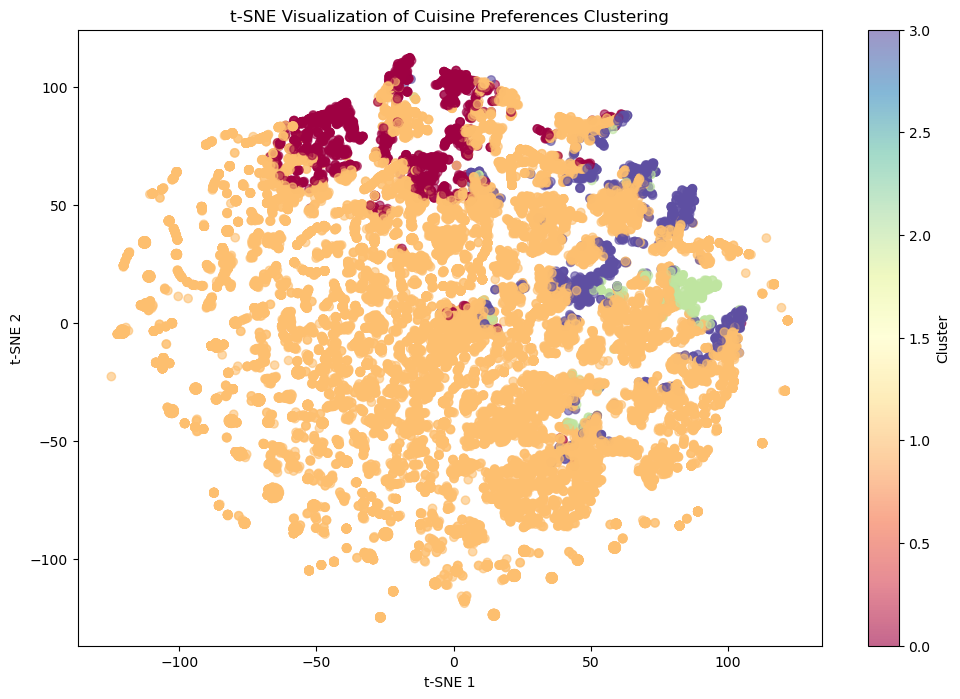

In [56]:

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cui_features_scaled)

# 3. Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(cui_features_scaled)

# 4. Create visualization
plt.figure(figsize=(12, 8))

# Scatter plot with cluster colors
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=cluster_labels, 
                     cmap='Spectral',
                     alpha=0.6)

# Add labels and title
plt.title('t-SNE Visualization of Cuisine Preferences Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Add colorbar
plt.colorbar(scatter, label='Cluster')

# Show cluster sizes
for i in range(n_clusters):
    print(f'Cluster {i} size: {sum(cluster_labels == i)}')

plt.show()

# FIND out which cluster likes which cusines because the thing up there gives me no infomrtation

Ben, look at the correlations above for this

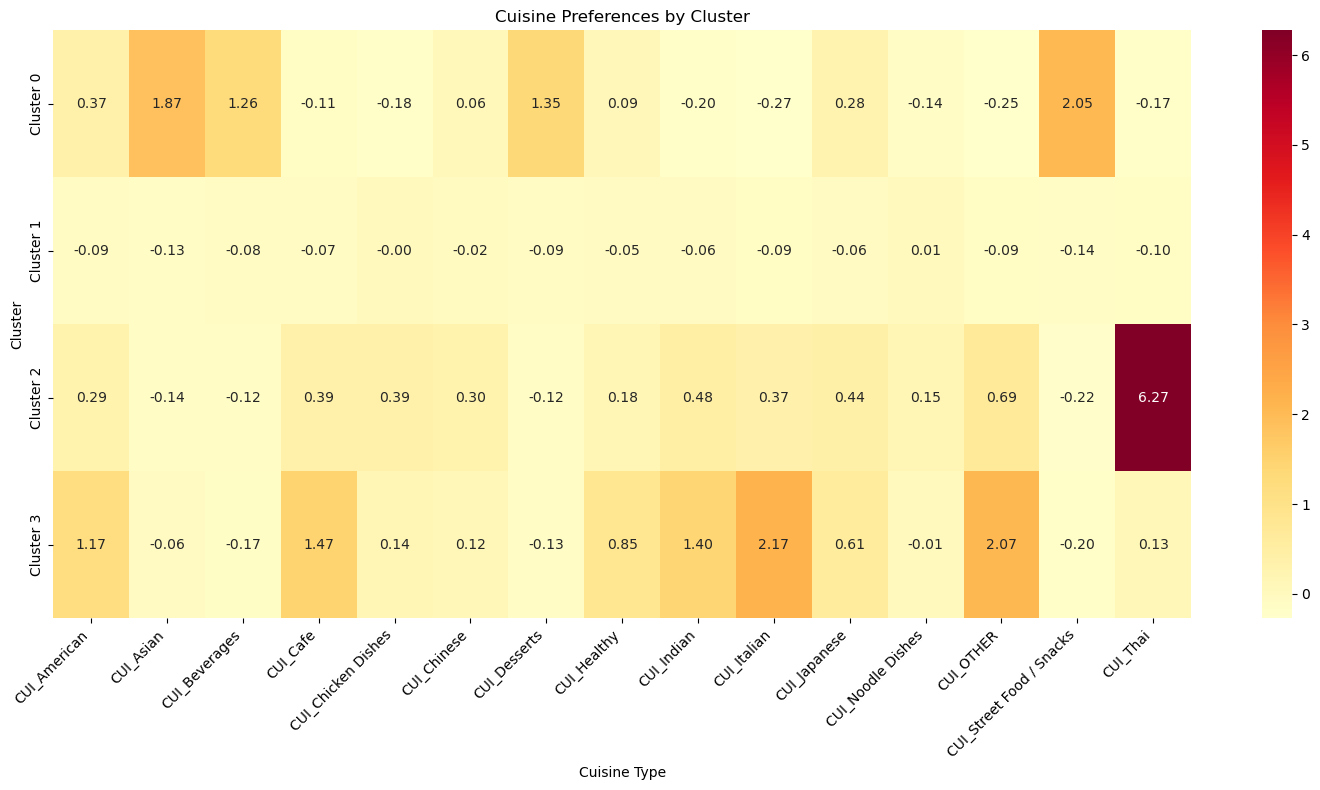


Top 3 cuisines per cluster:

Cluster 0 (2056 customers):
CUI_Street Food / Snacks    2.050467
CUI_Asian                   1.867019
CUI_Desserts                1.346336

Cluster 1 (27836 customers):
CUI_Noodle Dishes     0.007965
CUI_Chicken Dishes   -0.000590
CUI_Chinese          -0.015815

Cluster 2 (471 customers):
CUI_Thai      6.274745
CUI_OTHER     0.685554
CUI_Indian    0.482540

Cluster 3 (1374 customers):
CUI_Italian    2.166415
CUI_OTHER      2.066466
CUI_Cafe       1.471277


In [57]:
# Create a cluster profile showing mean values for each cuisine type
cluster_profiles = pd.DataFrame()

# Calculate mean values for each cluster
for i in range(4):
    cluster_mask = cluster_labels == i
    cluster_mean = cui_features[cluster_mask].mean()
    cluster_profiles[f'Cluster {i}'] = cluster_mean

# Transpose for better visualization
cluster_profiles = cluster_profiles.T

# Create heatmap of cluster profiles
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_profiles, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Cuisine Preferences by Cluster')
plt.ylabel('Cluster')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# For each cluster, show top 3 cuisines
print("\nTop 3 cuisines per cluster:")
for i in range(4):
    print(f"\nCluster {i} ({sum(cluster_labels == i)} customers):")
    top_cuisines = cluster_profiles.iloc[i].sort_values(ascending=False).head(3)
    print(top_cuisines.to_string())

analysis from claude


# Cluster Analysis of Cuisine Preferences

## Cluster 0 (2,056 customers) - "Asian Fusion & Snack Lovers"
* Highest preferences:
  - Street Food/Snacks (2.05)
  - Asian (1.87)
  - Desserts (1.35)
* Clear focus on casual dining and Asian cuisine

## Cluster 1 (27,836 customers) - "Balanced/Average Consumers"
* Slightly negative values across all cuisines (-0.14 to 0.01)
* No strong preferences
* Represents the typical/average customer
* Largest segment by far

## Cluster 2 (471 customers) - "Thai Food Enthusiasts"
* Dramatically high preference for Thai food (6.27)
* Secondary preferences:
  - OTHER (0.69)
  - Indian (0.48)
  - Japanese (0.44)
* Very specific niche segment

## Cluster 3 (1,374 customers) - "Italian & Fine Dining" 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! How are these fine dining?
* Strong preferences for:
  - Italian (2.17)
  - OTHER (2.07)
  - Cafe (1.47)
  - Indian (1.40)
* Suggests a group that enjoys diverse, possibly upscale dining
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!




# SOM

In [32]:
cui_features = ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']

In [33]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 20
N = 20
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(cui_features)
learning_rate = .7




# Increase map size
M = 20
N = 20

# Adjust learning parameters
learning_rate = 0.5
neighborhood_function = 'gaussian'
n_iterations = 30000

# Train with more epochs for better feature representation
sm = MiniSom(M, N, 
             n_feats,
             learning_rate=learning_rate, 
             topology='hexagonal',
             neighborhood_function=neighborhood_function)

som_data = df_treated[cui_features].values

print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))


Before training:
QE 19.0948
TE 0.9901
After training:
QE 3.3739
TE 0.2271


In [34]:
# Get the weights from the trained SOM
weights = sm.get_weights()

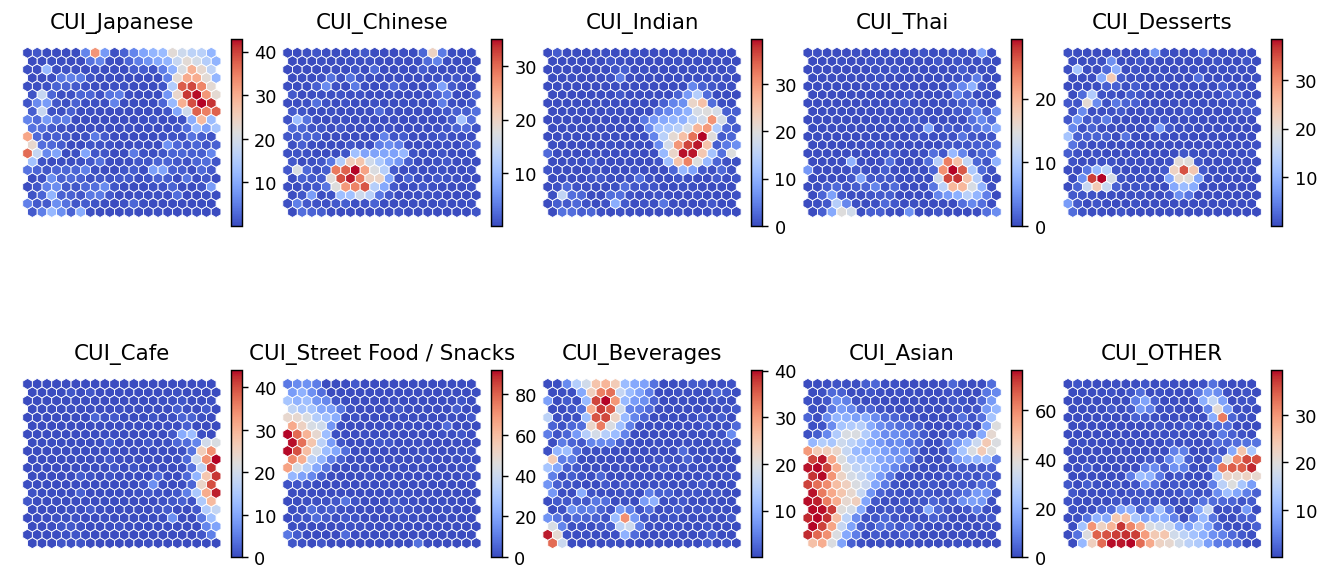

In [35]:
##############################
# Plot Component Planes
##############################

figsize=(10, 5)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

#subfigs = fig.subfigures(2, 5, wspace=.08, hspace=.07)  # 2x5 for 10 features
subfigs = fig.subfigures(2, 5, wspace=.08, hspace=.07).flatten()  # 2x5 for 10 features
colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi in range(len(cui_features)):
    if cpi >= len(subfigs) or cpi >= weights.shape[2]:
        break
    sf = subfigs[cpi]
    # Rest of plotting code
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=cui_features[cpi],
                    cmap=cm.coolwarm,
                    )

Analysis of cuisine distribution SOMs across 20x20 hexagonal grid:

Japanese: Strong cluster center-right (40+ intensity)
Chinese: Concentrated bottom-right hotspot (30+)
Indian: Right-side cluster (30+)
Thai: Left-edge linear pattern (20+)
Desserts: Two distinct clusters (30+ intensity)
Cafe: Top-right concentration (40+)
Street Food: Top-center band (80+ intensity)
Beverages: Edge clusters top and right (40+)
Asian: Central dominant cluster (40+)
OTHER: Multiple scattered hotspots (60+ max)

Key insights:
- Street Food shows highest intensity (80+)
- Clear spatial separation between cuisines
- Asian cuisine has largest continuous cluster
- Beverages and OTHER show most dispersed patterns

<a href="#Index">Back to Index</a>

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.5.'></a>
># 2.5. Order Volume Features

# K-Means

In [67]:
order_volume_features = df_scaled_new[['vendor_count ', 'total_spending ', 'total_orders ']]

Check the correlation between features.

<Figure size 1200x800 with 0 Axes>

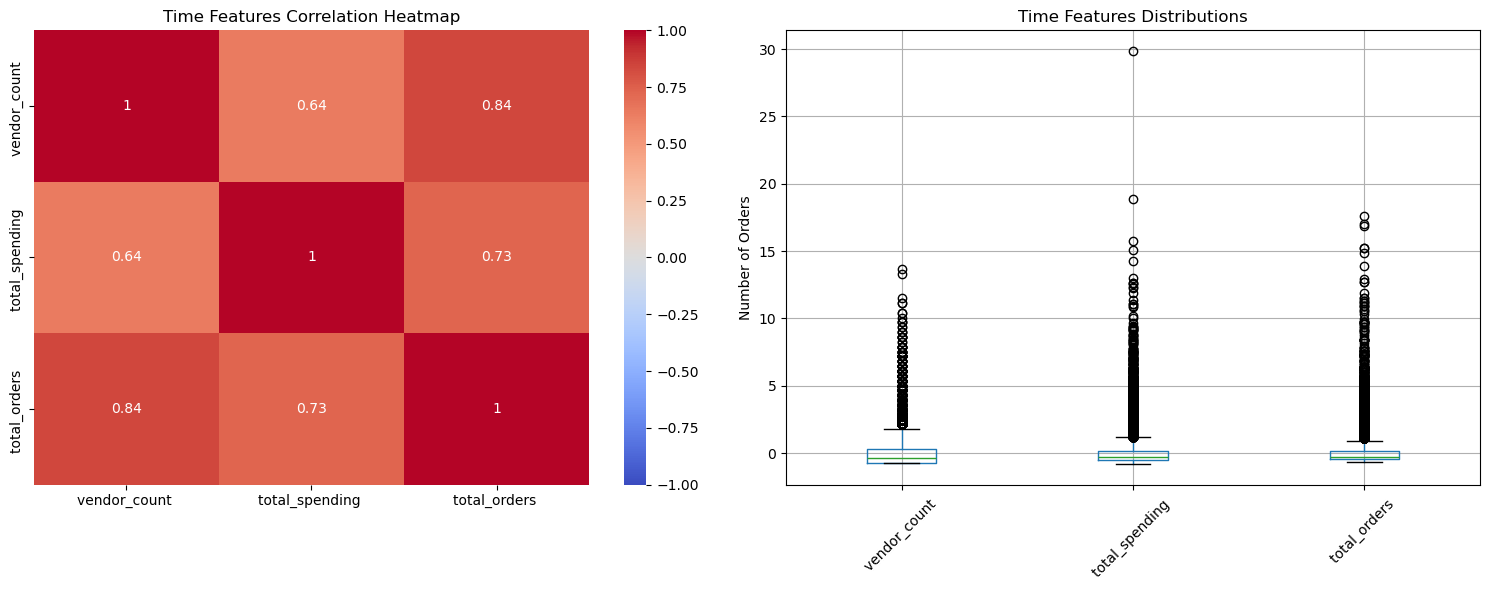

In [35]:
# Calculate correlation matrix for time features
correlation_matrix = order_volume_features.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create subplots for different visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Blue-red color scheme
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            ax=ax1)
ax1.set_title('Time Features Correlation Heatmap')

# 2. Distribution Plots
order_volume_features.boxplot(ax=ax2)
ax2.set_title('Time Features Distributions')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [27]:
# Check K between 1 and 10
range_clusters = range(1, 11)

# Initialize list to store inertia values
inertia = []

# Loop through each value of K, perform K-means, and save the inertia for each
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(order_volume_features)
    inertia.append(kmclust.inertia_)  

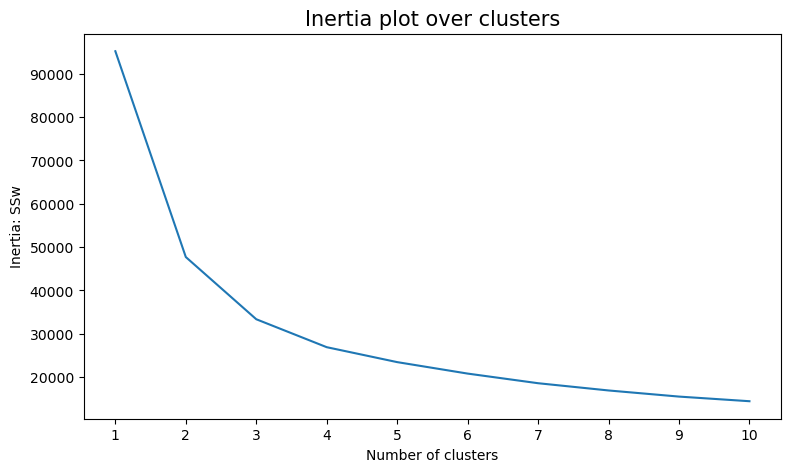

In [28]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.694340535039124
For n_clusters = 3, the average silhouette_score is : 0.5819351828577088
For n_clusters = 4, the average silhouette_score is : 0.5058109265880437
For n_clusters = 5, the average silhouette_score is : 0.43563777155379313
For n_clusters = 6, the average silhouette_score is : 0.4428310016273136
For n_clusters = 7, the average silhouette_score is : 0.4122570609982513
For n_clusters = 8, the average silhouette_score is : 0.3897245428121421
For n_clusters = 9, the average silhouette_score is : 0.40637228021140587
For n_clusters = 10, the average silhouette_score is : 0.4021954210993876


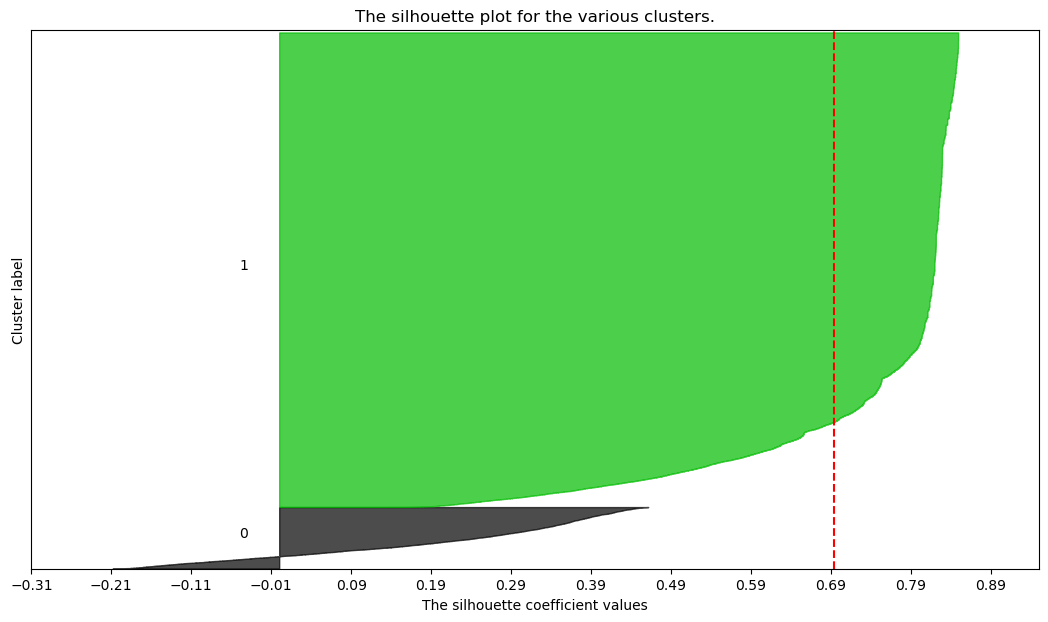

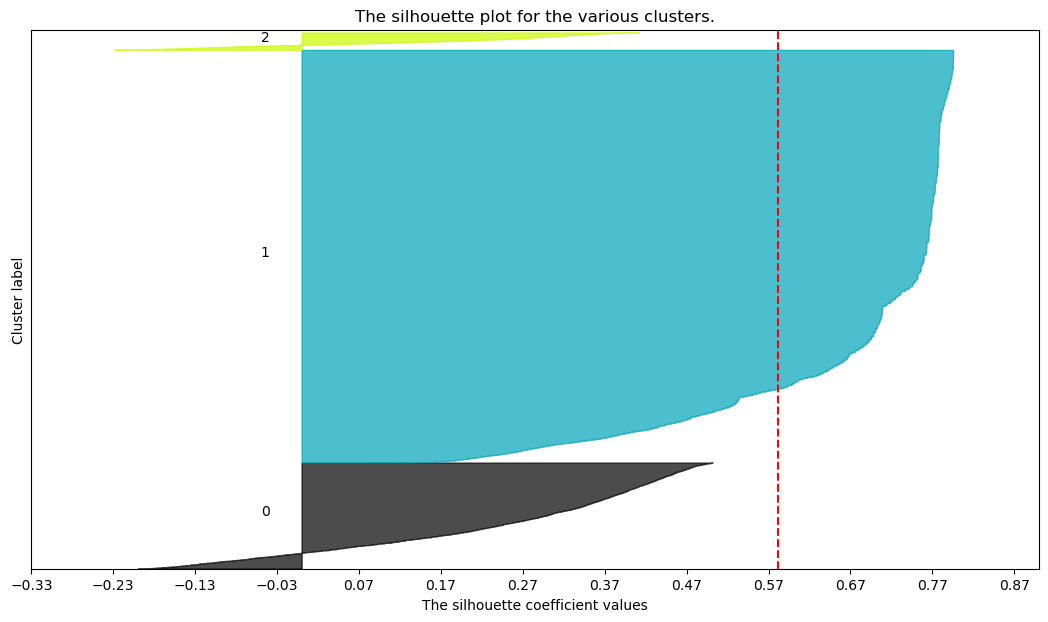

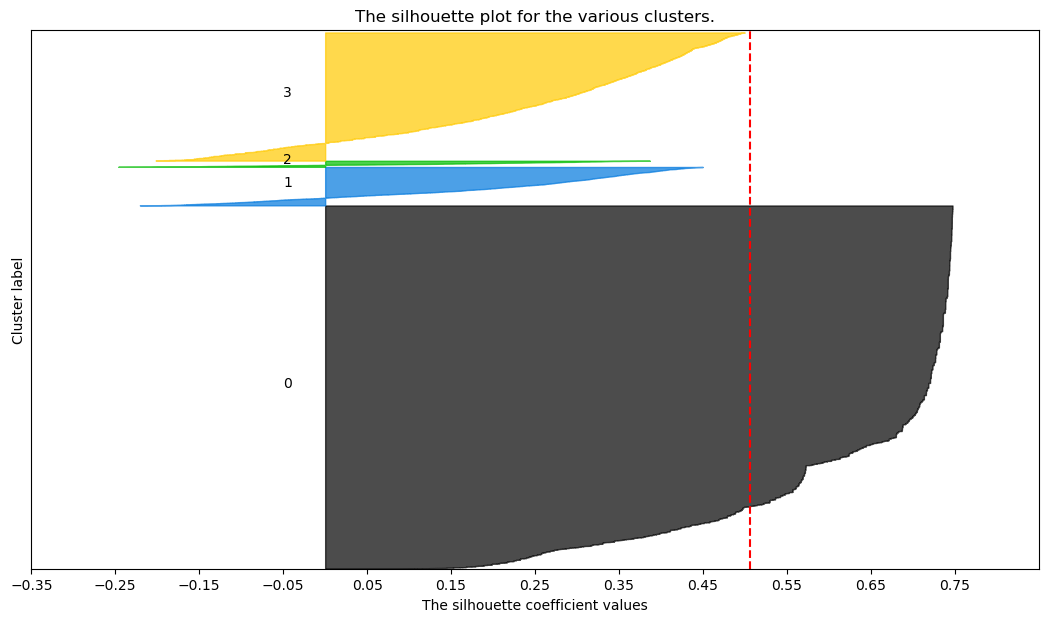

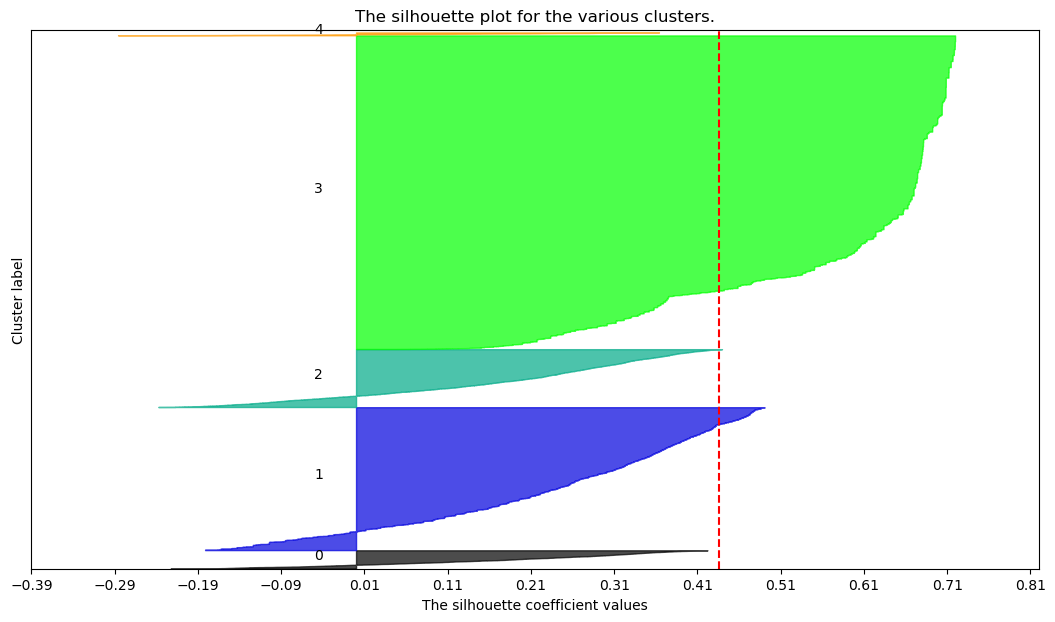

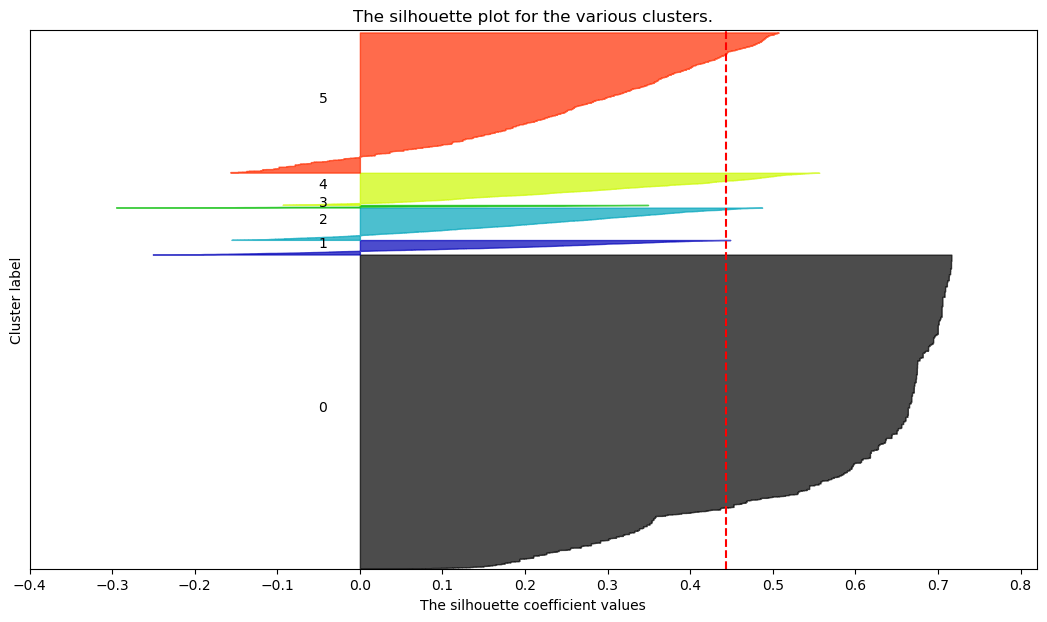

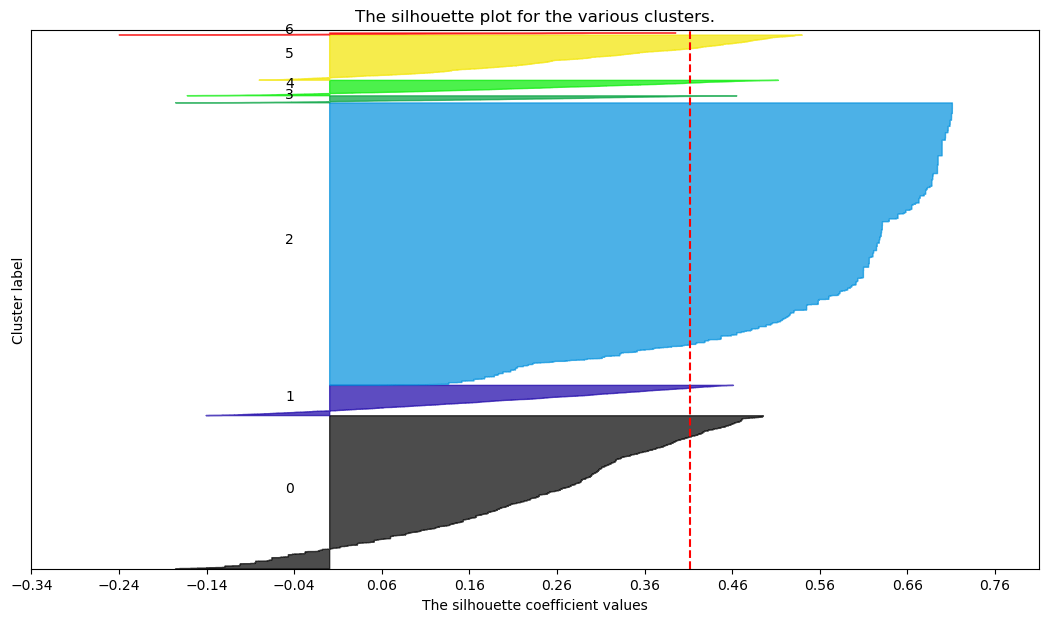

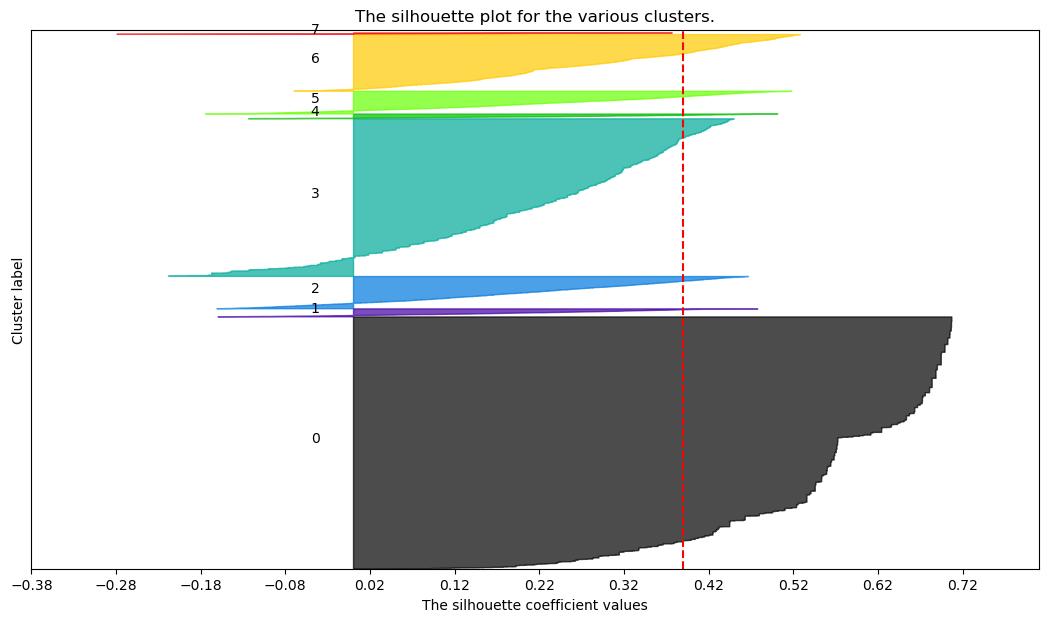

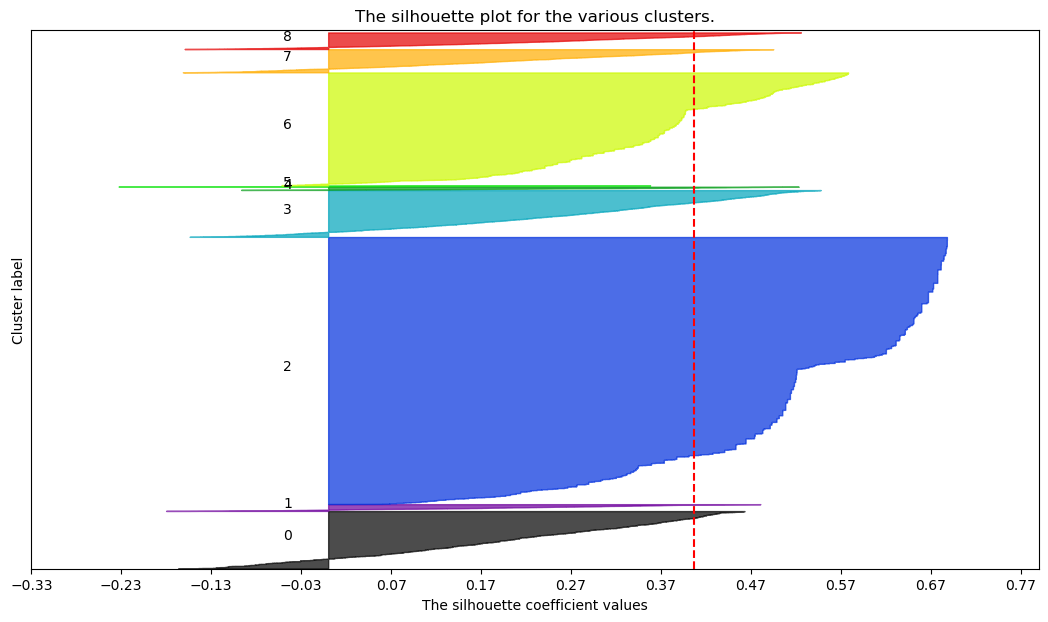

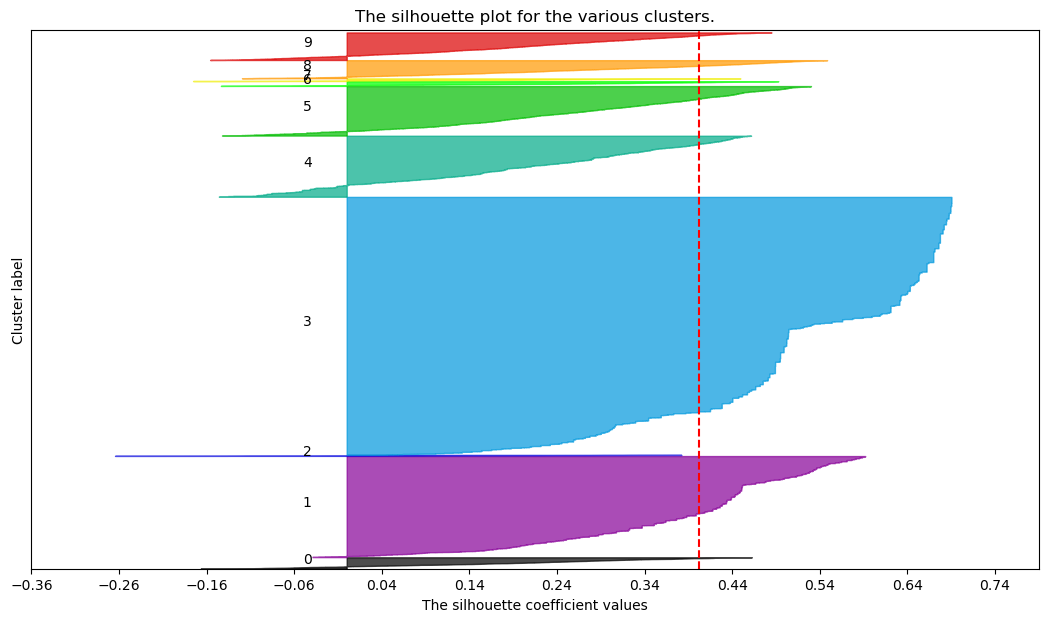

In [29]:
# Storing average silhouette metric for order volume features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(order_volume_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(order_volume_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(order_volume_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

<a href="#Index">Back to Index</a>

# K-Means

In [30]:
#K-means with K=2 for order volume columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0           2.021976        1.841829      2.017738
1          -0.262031       -0.238685     -0.261482

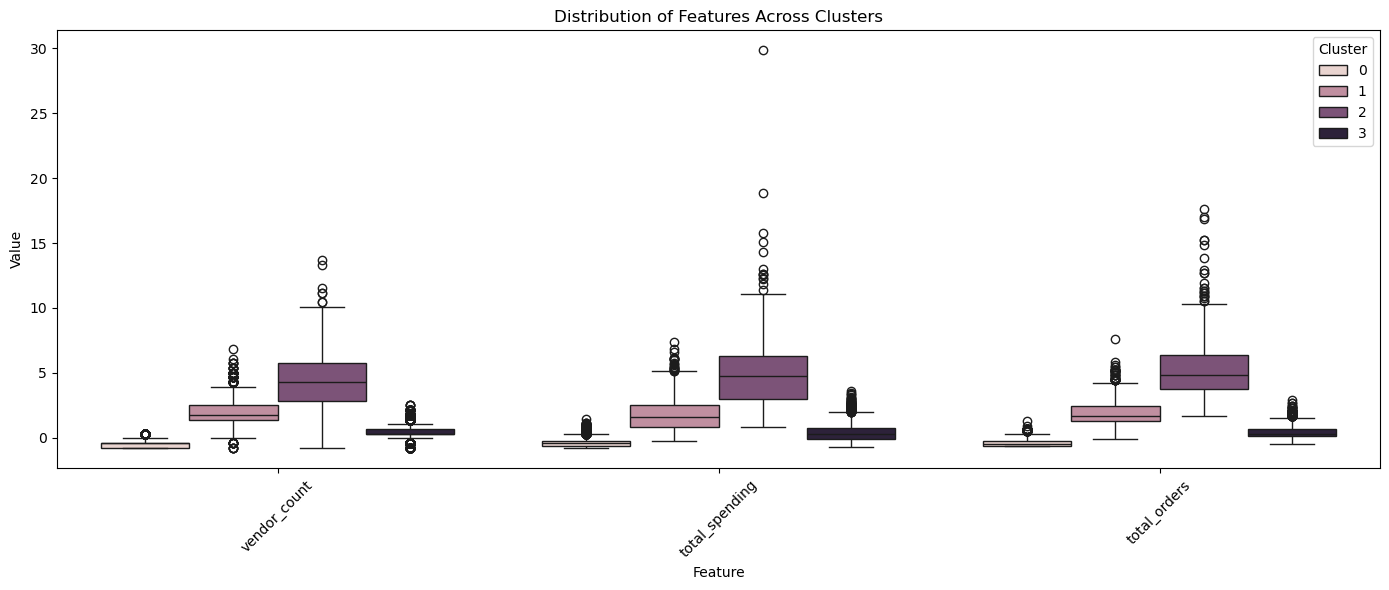

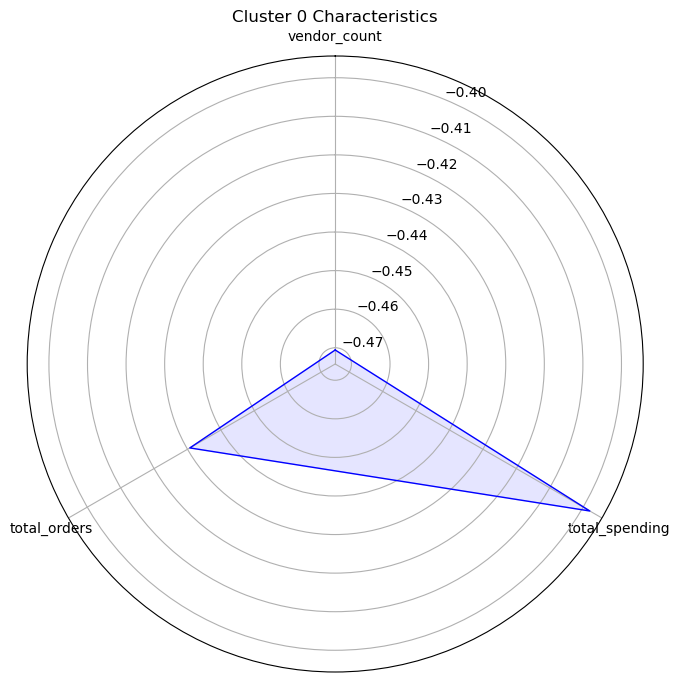

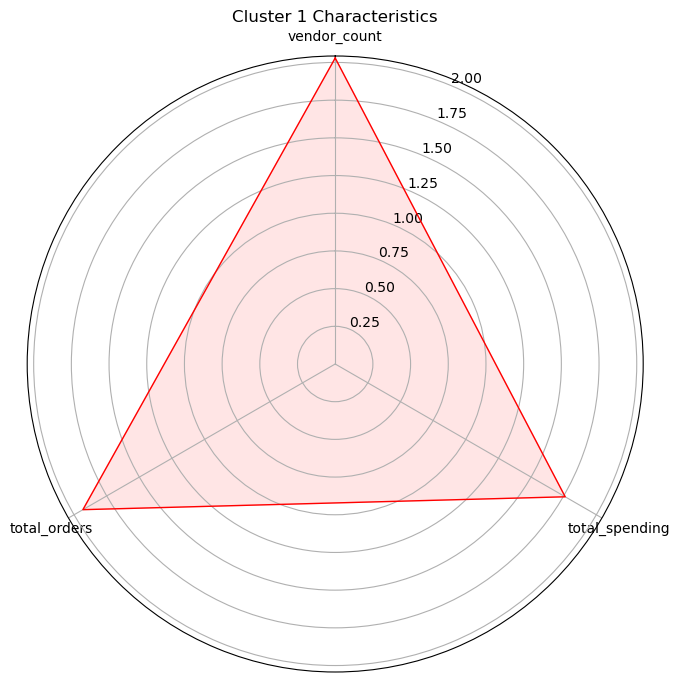

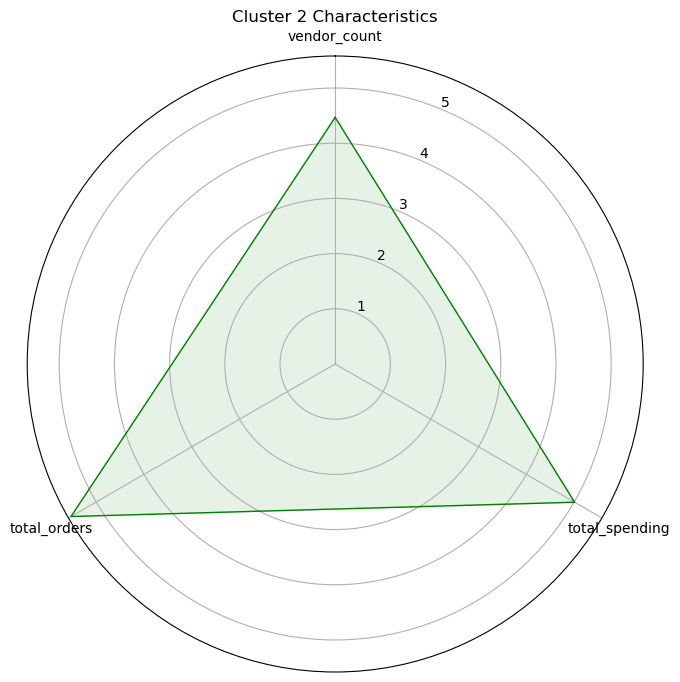

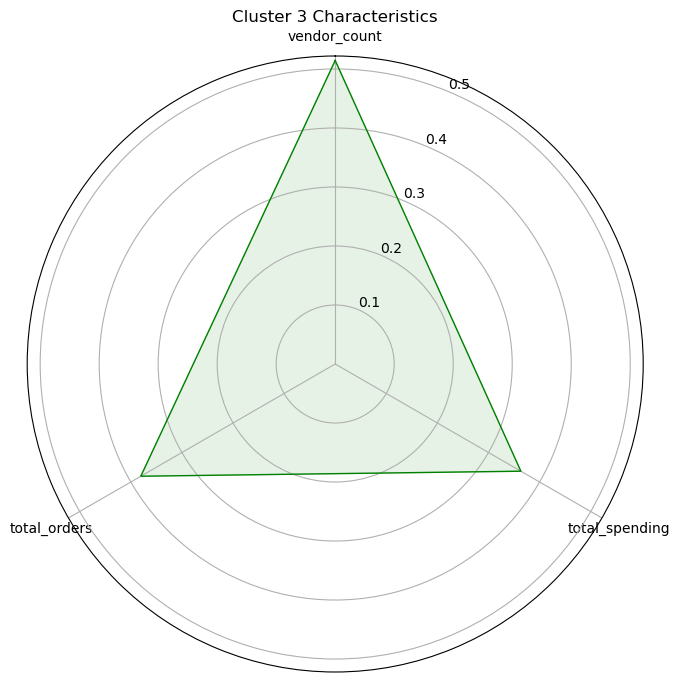

Cluster Centroids:
         vendor_count  total_spending  total_orders
Cluster                                            
0           -0.470584       -0.397997     -0.430700
1            2.029502        1.761609      1.932373
2            4.467926        5.009643      5.527548
3            0.514442        0.363375      0.380423


In [93]:

# Assuming df_scaled_new is your scaled dataframe
def perform_clustering_analysis(df_scaled_new):
    # Select time of order features
    order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]   

    # Perform K-means clustering
    kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
    km_labels = kmclust.fit_predict(order_volume_features)

    # Concatenate labels with features
    df_concat = pd.concat([order_volume_features, pd.Series(km_labels, name='Cluster', index=order_volume_features.index)], axis=1)



    plt.figure(figsize=(14, 6))
    df_melted = df_concat.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melted)
    plt.title('Distribution of Features Across Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    



    def make_spider(df, row, title, color):
        categories = list(df.columns)
        N = len(categories)
        
        # Prepare values
        values = df.iloc[row].tolist()
        values += values[:1]
        
        # Calculate angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
        ax.plot(angles, values, color=color, linewidth=1)
        ax.fill(angles, values, color=color, alpha=0.1)
        
        # Fix axis to go in the right order and start at 12 o'clock
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        
        # Draw axis lines for each angle and label
        plt.xticks(angles[:-1], categories)
        
        plt.title(title)
        plt.show()

    # Prepare cluster means
    cluster_means = df_concat.groupby('Cluster').mean()

    # Create radar charts
    make_spider(cluster_means, 0, 'Cluster 0 Characteristics', 'blue')
    make_spider(cluster_means, 1, 'Cluster 1 Characteristics', 'red')
    make_spider(cluster_means, 2, 'Cluster 2 Characteristics', 'green')
    make_spider(cluster_means, 3, 'Cluster 3 Characteristics', 'green')

    # 5. Cluster Centroids Comparison
    print("Cluster Centroids:")
    print(cluster_means)

    return km_labels, cluster_means

# Call the function with your scaled dataframe
km_labels, cluster_means = perform_clustering_analysis(df_scaled_new)

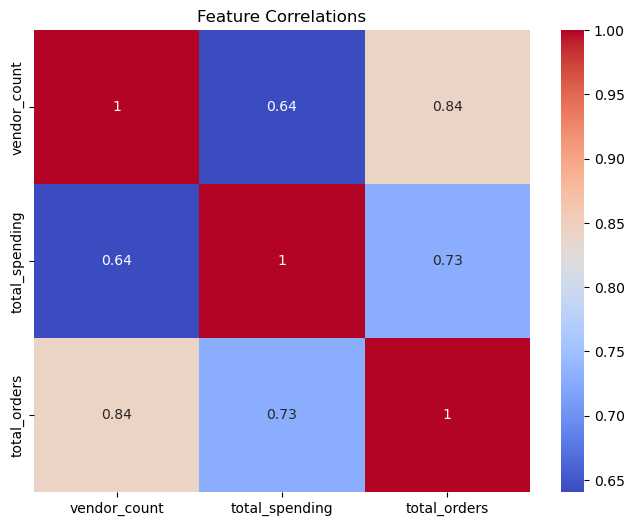

In [97]:
# Create correlation matrix between features
correlation_matrix = order_volume_features.corr()

# Visualize using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [98]:
# Add cluster assignments back to original data
order_volume_features['cluster'] = km_labels

# Calculate cluster statistics
for cluster in [0, 1]:
    cluster_data = order_volume_features[order_volume_features['cluster'] == cluster]
    print(f"\nCluster {cluster} Statistics:")
    print(cluster_data.describe())


Cluster 0 Statistics:
       vendor_count  total_spending  total_orders  cluster
count  21512.000000    21512.000000  21512.000000  21512.0
mean      -0.470584       -0.397997     -0.430700      0.0
std        0.293770        0.283927      0.222237      0.0
min       -0.763931       -0.809646     -0.665945      0.0
25%       -0.763931       -0.614445     -0.665945      0.0
50%       -0.402940       -0.440933     -0.469387      0.0
75%       -0.402940       -0.267421     -0.272829      0.0
max        0.319042        1.446007      1.299635      0.0

Cluster 1 Statistics:
       vendor_count  total_spending  total_orders  cluster
count   2273.000000     2273.000000   2273.000000   2273.0
mean       2.029502        1.761609      1.932373      1.0
std        1.051022        1.204564      0.952805      0.0
min       -0.763931       -0.289110     -0.076271      1.0
25%        1.402015        0.795338      1.299635      1.0
50%        1.763007        1.576141      1.692751      1.0
75%       

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_99329/3545105494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_volume_features['cluster'] = km_labels


<a href="#Index">Back to Index</a>

# SOM

In [36]:
order_volume_features = ['vendor_count', 'product_count', 'total_spending', 'total_orders']

In [37]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 15
N = 15
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(order_volume_features)
learning_rate = .7


som_data = df_treated[order_volume_features].values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



Before training:
QE 2.279
TE 0.9657
After training:
QE 1.6028
TE 0.4505


In [38]:
# Get the weights from the trained SOM
weights = sm.get_weights()

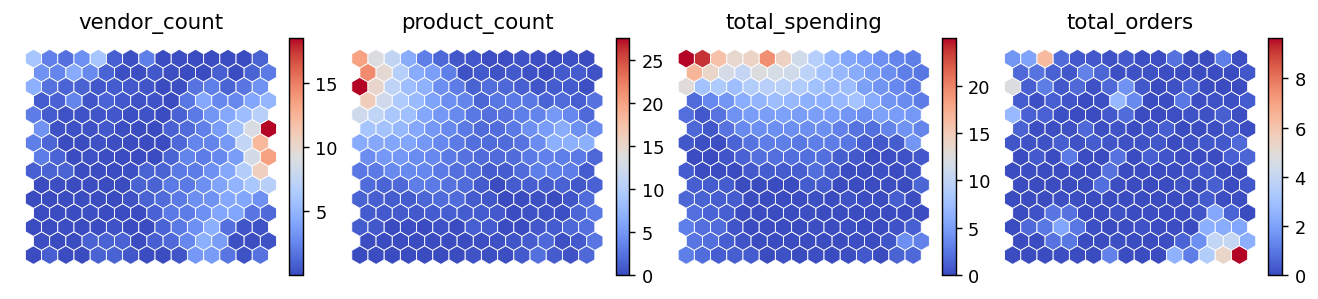

In [ ]:
##############################
# Plot Component Planes
##############################

figsize=(10, 10)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(1,4,wspace=.08, hspace=.07)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(order_volume_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=order_volume_features[cpi],
                    cmap=cm.coolwarm,
                    )

Analysis of order volume SOM maps:

Vendor count: Scattered hotspots (max 15), primarily in right region, showing clusters of multi-vendor orders

Product count: High concentration (25) in top-left, indicating zones of large basket sizes

Total spending: Strong peaks (20+) in top, correlating with product count patterns

Total orders: More uniform distribution with isolated peak (8+), suggesting consistent order volumes with occasional high-traffic nodes

The maps reveal clear clustering of high-value, multi-item orders in specific regions, while general order volume remains relatively evenly distributed.

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.6.'></a>

># 2.6. Cluster Analysis

# Low spenders/ high spenders

In [31]:
#K-means with K=3 for order volume columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0           0.986775        0.769539      0.827363
1          -0.393604       -0.339775     -0.370304
2           3.346573        3.393121      3.767359

# low spenders, high spenders, medium spenders

In [32]:
#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat_order_volume = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat_order_volume.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0          -0.470584       -0.397997     -0.430700
1           2.029502        1.761609      1.932373
2           4.467926        5.009643      5.527548
3           0.514442        0.363375      0.380423

# Analysis: low spenders, high spenders, medium spenders, very very high spenders

# Cluster Analysis:

Feature Correlations Analysis:
The correlation matrix shows interesting relationships between your volume metrics:

1. Vendor Count and Total Orders (0.84):
- This strong positive correlation indicates that customers who order from more vendors tend to place more orders overall
- This suggests customers aren't just loyal to a few vendors but are actively exploring different options
- The high correlation might indicate an opportunity to encourage vendor exploration among less active customers

2. Total Spending and Total Orders (0.73):
- The moderately strong correlation here is expected but interestingly not as high as vendor count/total orders
- This suggests some variation in order values - not all frequent orderers are necessarily big spenders
- There might be different price sensitivity segments within your active customers

3. Vendor Count and Total Spending (0.64):
- The relatively lower correlation here is particularly interesting
- It suggests that exploring more vendors doesn't automatically lead to higher spending
- This could indicate price comparison behavior or varying price points across vendors

Cluster Statistics Analysis:

Cluster 0 (Low-Volume Segment, 21,512 customers):
- Mean values are all negative, showing consistently below-average behavior
- Very tight standard deviations (0.22-0.29) indicate a homogeneous group
- The max values show some potential for growth - some customers are starting to show higher activity
- Key characteristics:
  * Vendor count: -0.47σ below mean
  * Total spending: -0.40σ below mean
  * Total orders: -0.43σ below mean

Cluster 1 (High-Volume Segment, 2,273 customers):
- Much smaller but more valuable segment
- Higher standard deviations (0.95-1.20) show more variety in behavior
- Substantially higher means across all metrics
- Key characteristics:
  * Vendor count: +2.03σ above mean
  * Total spending: +1.76σ above mean
  * Total orders: +1.93σ above mean

Business Implications:

1. Customer Base Structure:
- You have a "90-10" type distribution with about 9.5% of customers driving significantly higher volumes
- This suggests potential for targeted growth strategies for the larger low-volume segment

2. Growth Opportunities:
- The low-volume cluster shows some customers reaching into positive territory (max values > 0)
- This indicates potential for "graduation" strategies to move customers from one segment to another
- The tight clustering in the low-volume segment suggests consistent barriers or behaviors to address

3. Strategic Recommendations:
- Consider developing a "customer advancement" program to move Cluster 0 customers toward Cluster 1 behavior
- Look at the characteristics of customers at the top end of Cluster 0 to understand what drives higher engagement
- For Cluster 1, focus on retention and maintaining their high engagement levels
- The strong vendor count correlations suggest that encouraging vendor exploration could be a key growth strategy

Would you like to explore any of these aspects in more detail or shall we look at additional analyses to further understand these segments?

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.7.'></a>
># 2.7. Day of Week Orders

In [33]:
df_scaled_original.columns

Index(['vendor_count ', 'product_count ', 'is_chain ', 'last_order ',
       'CUI_American ', 'CUI_Asian ', 'CUI_Beverages ', 'CUI_Cafe ',
       'CUI_Chicken Dishes ', 'CUI_Chinese ', 'CUI_Desserts ', 'CUI_Healthy ',
       'CUI_Indian ', 'CUI_Italian ', 'CUI_Japanese ', 'CUI_Noodle Dishes ',
       'CUI_OTHER ', 'CUI_Street Food / Snacks ', 'CUI_Thai ', 'DOW_0 ',
       'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ', 'HR_1 ',
       'HR_2 ', 'HR_3 ', 'HR_4 ', 'HR_5 ', 'HR_6 ', 'HR_7 ', 'HR_8 ', 'HR_9 ',
       'HR_10 ', 'HR_11 ', 'HR_12 ', 'HR_13 ', 'HR_14 ', 'HR_15 ', 'HR_16 ',
       'HR_17 ', 'HR_18 ', 'HR_19 ', 'HR_20 ', 'HR_21 ', 'HR_22 ', 'HR_23'],
      dtype='object')

In [34]:

days_of_week_features = df_scaled_original[['DOW_0 ', 'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ']]

# K-Means

In [35]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(days_of_week_features)
    inertia.append(kmclust.inertia_)  

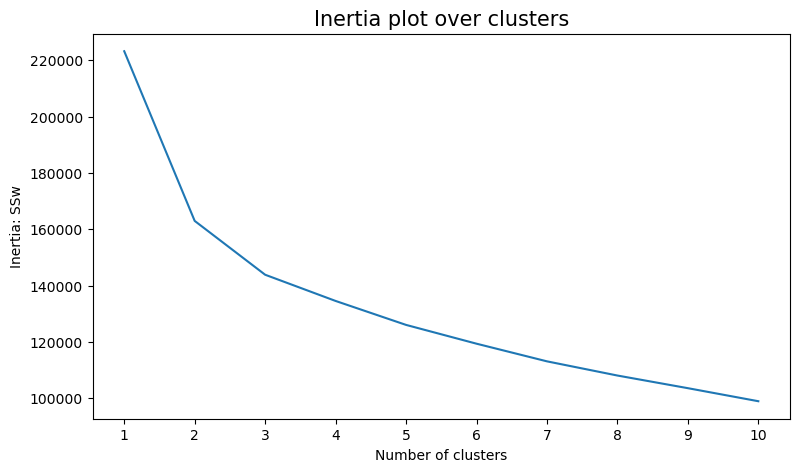

In [36]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5861695313859401
For n_clusters = 3, the average silhouette_score is : 0.4158750005709425
For n_clusters = 4, the average silhouette_score is : 0.2888677242144086
For n_clusters = 5, the average silhouette_score is : 0.2740484397491813
For n_clusters = 6, the average silhouette_score is : 0.1339630245480364
For n_clusters = 7, the average silhouette_score is : 0.14064766133560944
For n_clusters = 8, the average silhouette_score is : 0.1490087658193379
For n_clusters = 9, the average silhouette_score is : 0.15569774591354404
For n_clusters = 10, the average silhouette_score is : 0.16349611725867727


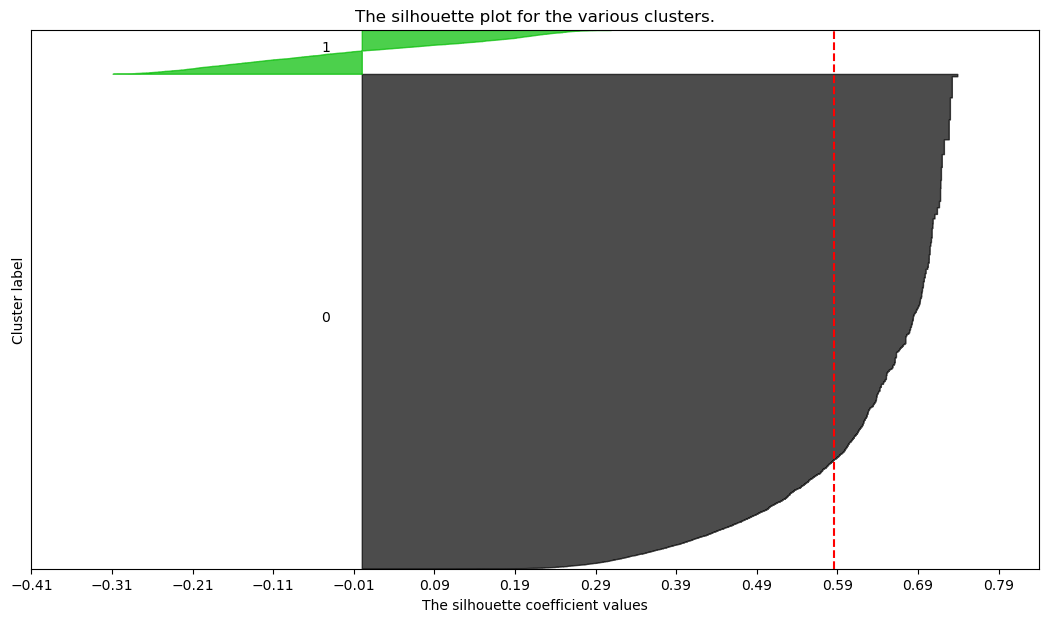

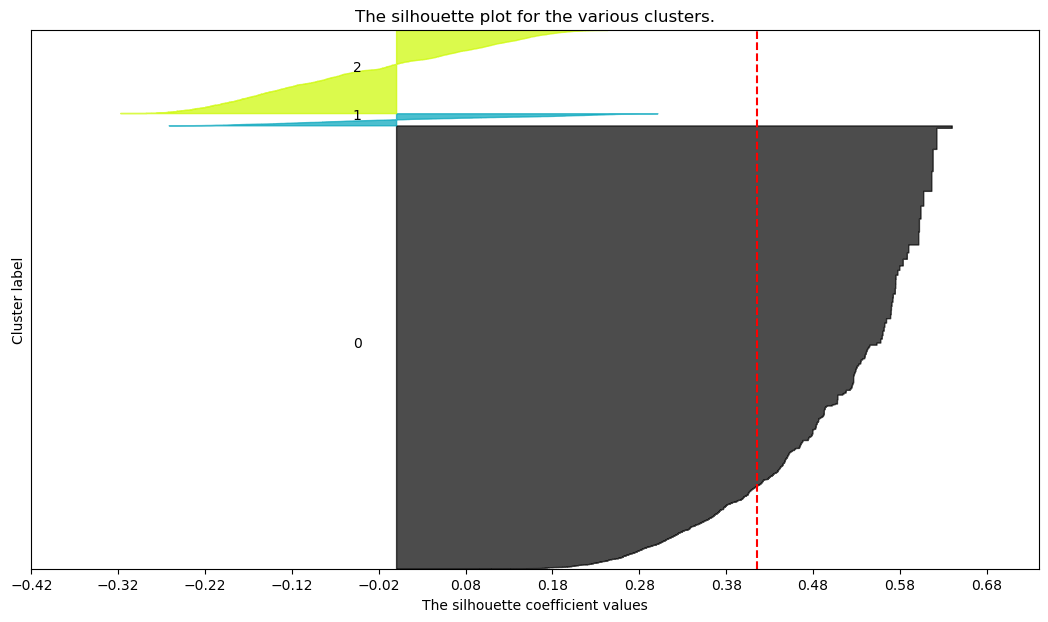

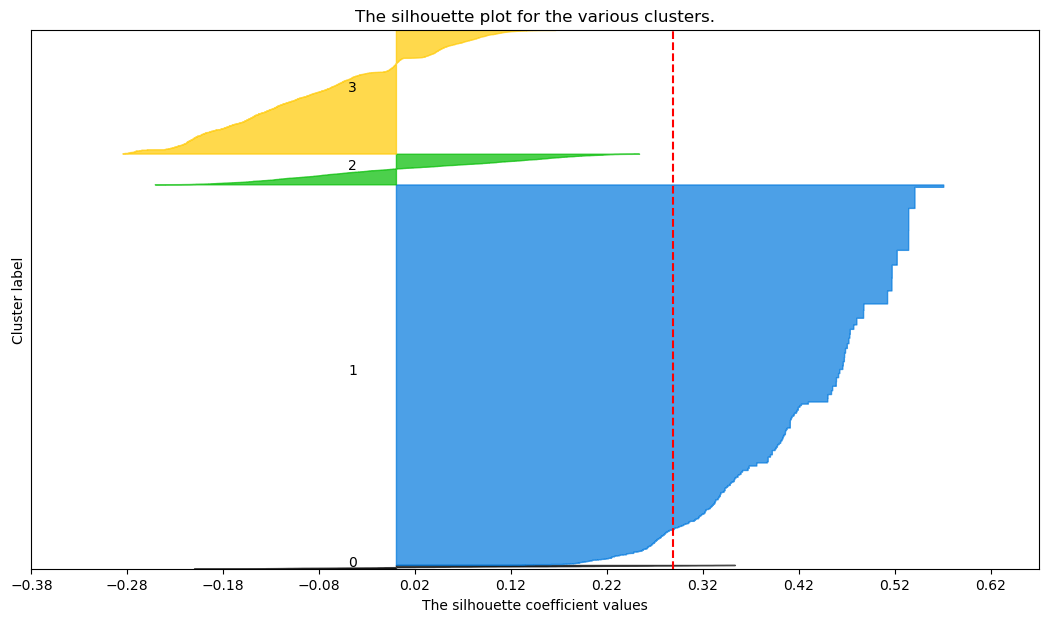

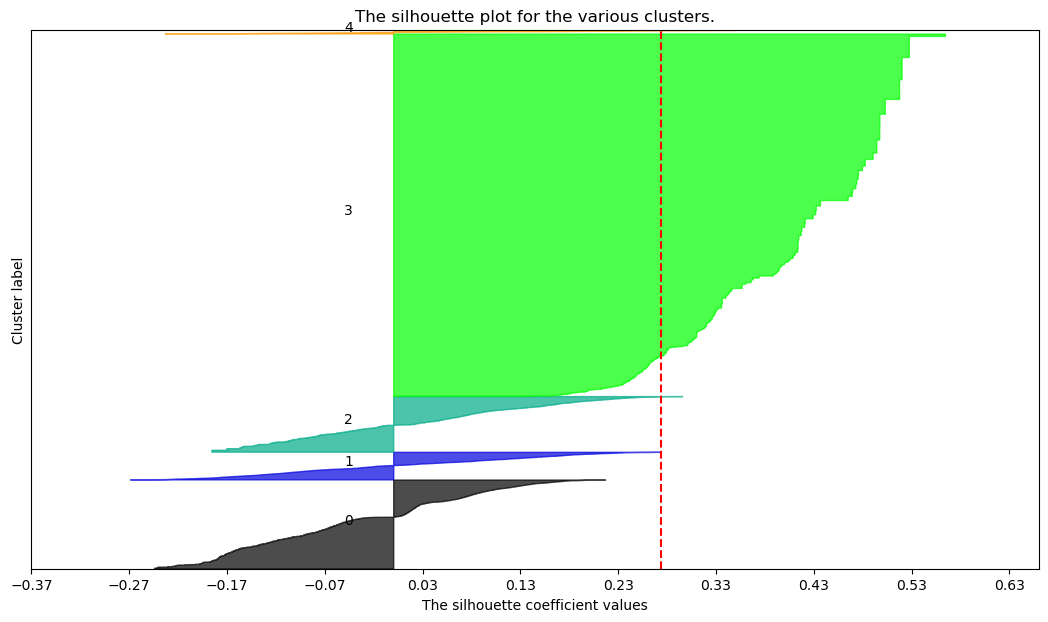

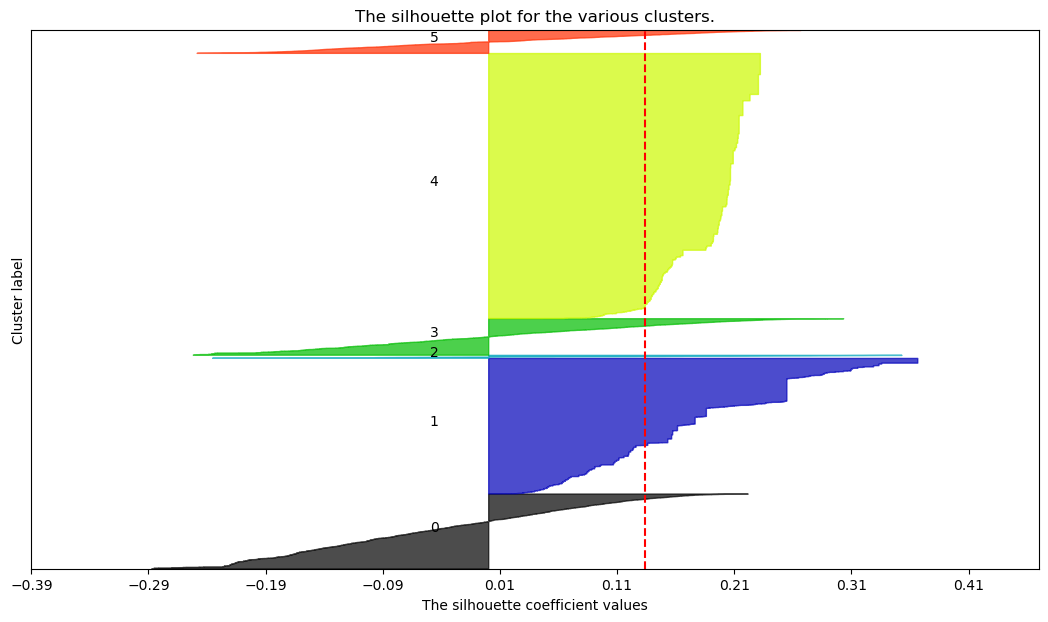

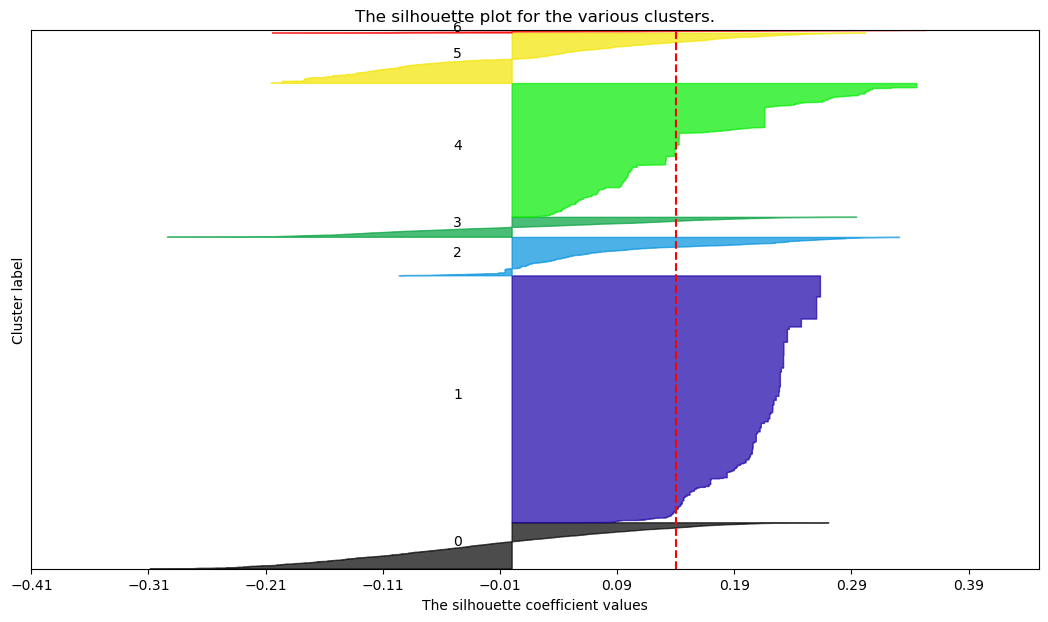

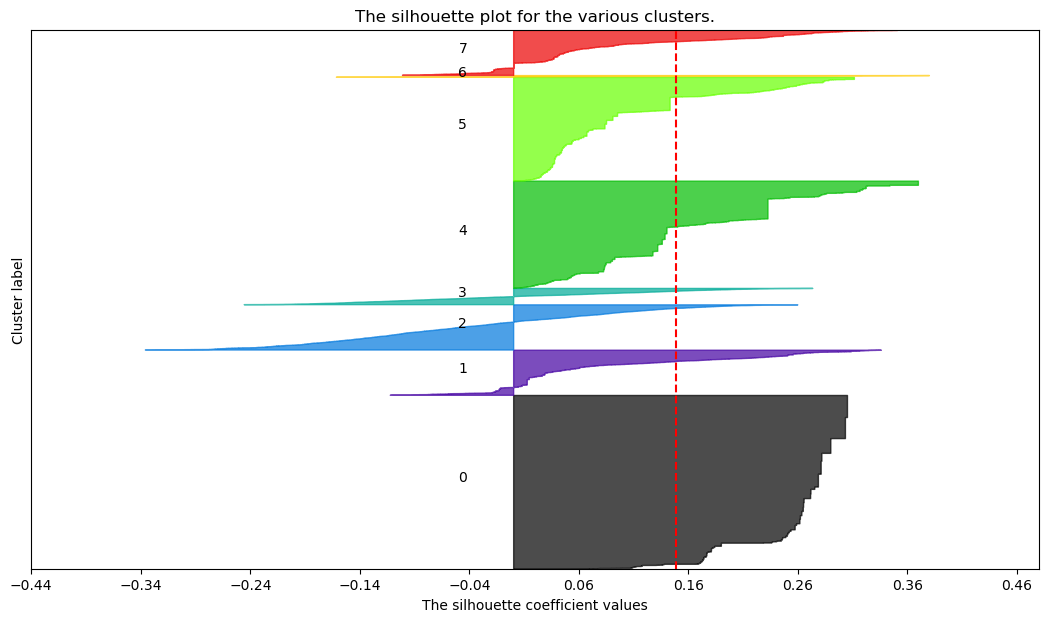

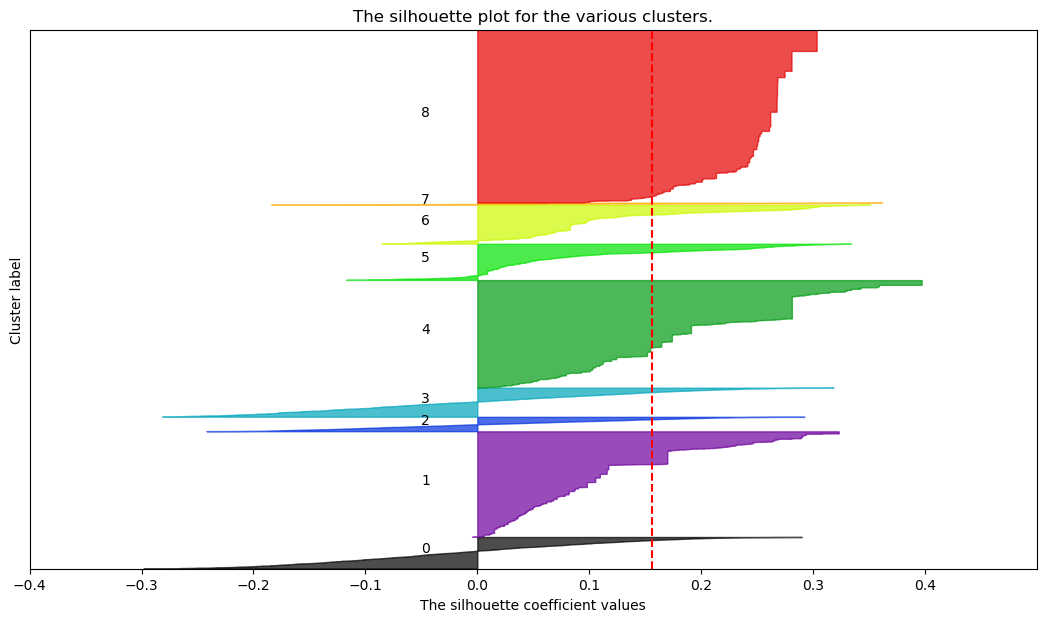

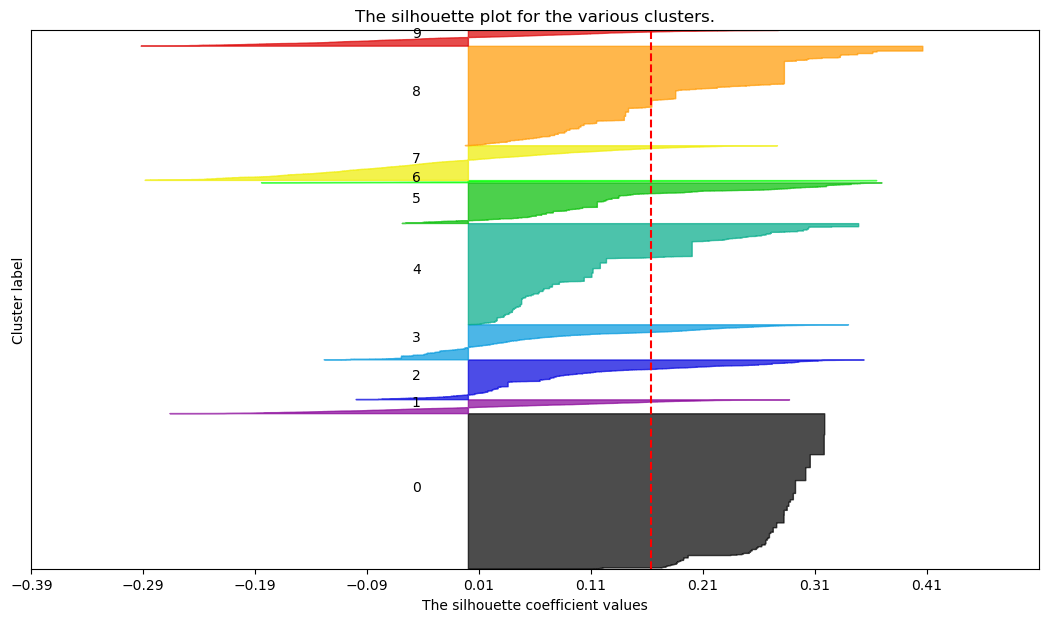

In [37]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(days_of_week_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(days_of_week_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(days_of_week_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [38]:
#K-means with K=2 for days of week columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6 
labels                                                                      
0      -0.160676 -0.163241 -0.164652 -0.163392 -0.154428 -0.134694 -0.138765
1       1.812227  1.841163  1.857078  1.842868  1.741763  1.519188  1.565096

# Analysis: High spenders/ low spenders (not good for DOW)

In [39]:
#K-means with K=3 for days of week columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6 
labels                                                                      
0      -0.229371 -0.236676 -0.238207 -0.242195 -0.232911 -0.213677 -0.218832
1       3.359179  3.303737  3.295623  3.243018  3.077736  2.754673  2.808674
2       0.735634  0.782561  0.791890  0.820744  0.795210  0.739510  0.759154

# Analysis: High spenders/ low spenders /medium spenders (not good for DOW)

In [40]:
#K-means with K=4 for days of week columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6 
labels                                                                      
0       5.241424  5.131245  4.965175  4.793163  4.740289  4.321799  4.278882
1      -0.293047 -0.290940 -0.300237 -0.302111 -0.292900 -0.276047 -0.281215
2       1.702261  1.757165  1.810202  1.810430  1.670901  1.359513  1.413719
3       0.327719  0.310856  0.331152  0.341862  0.349593  0.386978  0.390705

# Analysis: High spenders/ low spenders /medium spenders/ very high spenders (not good for DOW)

# Weekend vs Weekday Orders

In [41]:
weekday_weekend_features = df_scaled_new[['weekend_orders', 'weekdayend_orders']]

In [42]:
#K-means with weekday/weekend features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(weekday_weekend_features)
    inertia.append(kmclust.inertia_)  

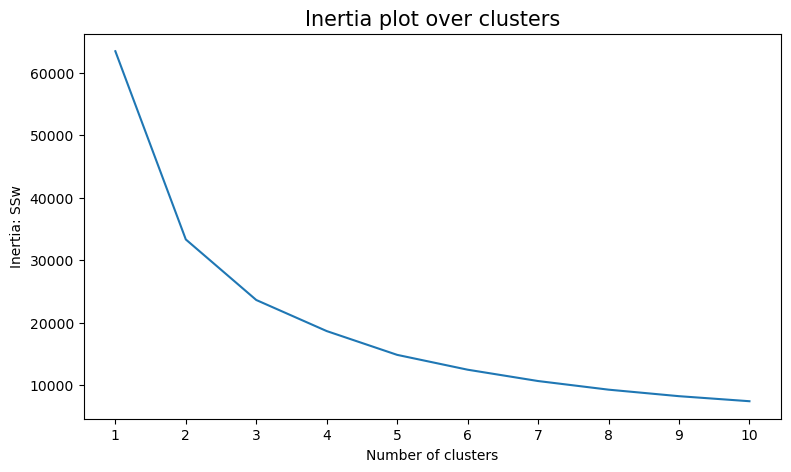

In [43]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.7106220078231991
For n_clusters = 3, the average silhouette_score is : 0.5551103801446502
For n_clusters = 4, the average silhouette_score is : 0.47215419940267456
For n_clusters = 5, the average silhouette_score is : 0.49803295995700947
For n_clusters = 6, the average silhouette_score is : 0.459939518840112
For n_clusters = 7, the average silhouette_score is : 0.4776240733660288
For n_clusters = 8, the average silhouette_score is : 0.4813773937069052
For n_clusters = 9, the average silhouette_score is : 0.4873923466362438
For n_clusters = 10, the average silhouette_score is : 0.5049953619629514


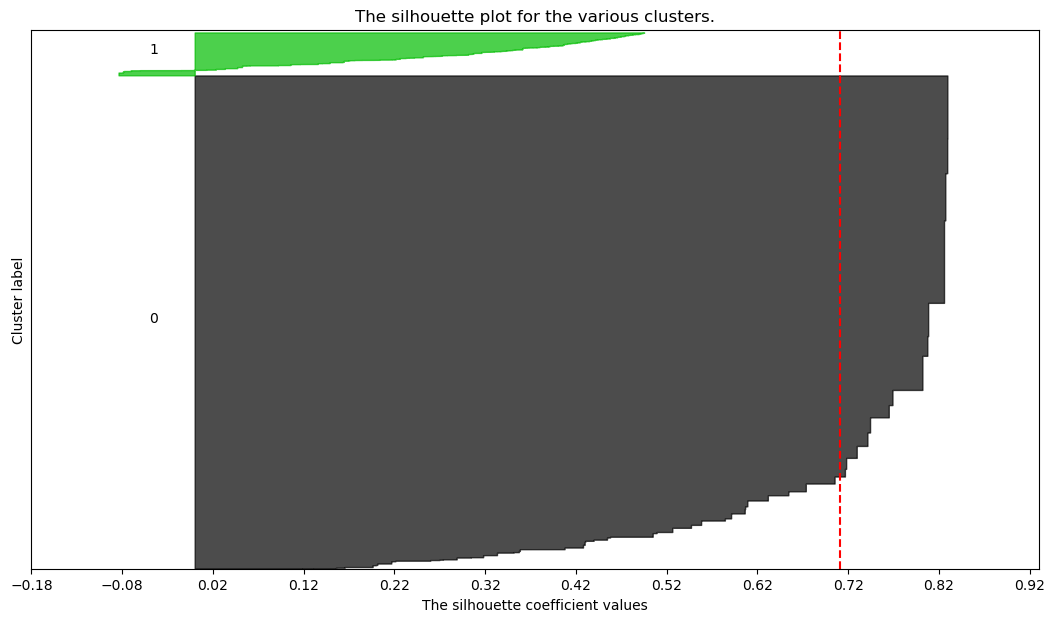

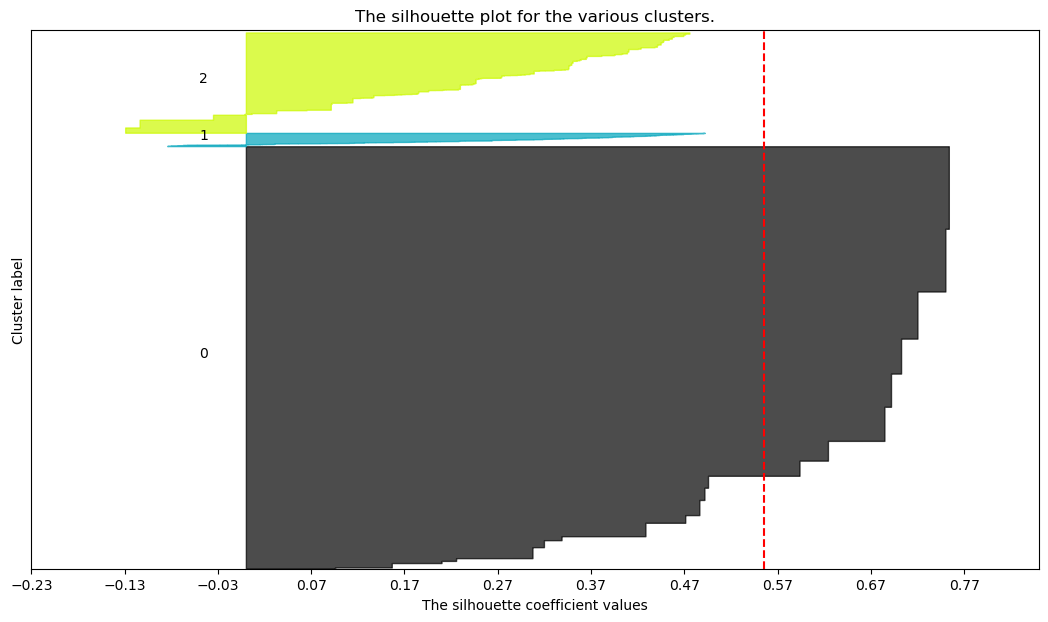

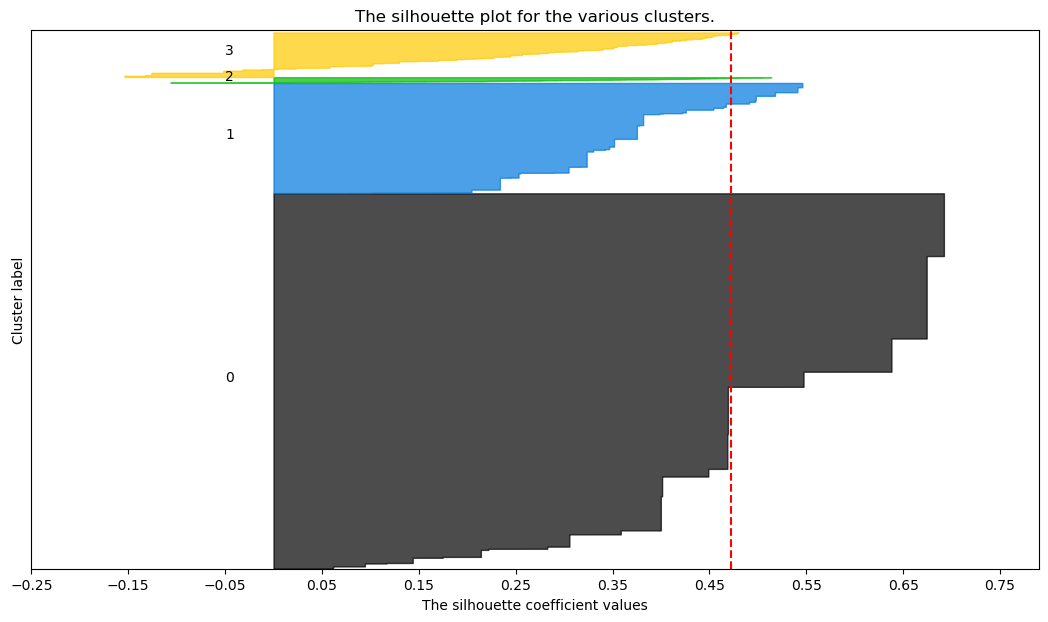

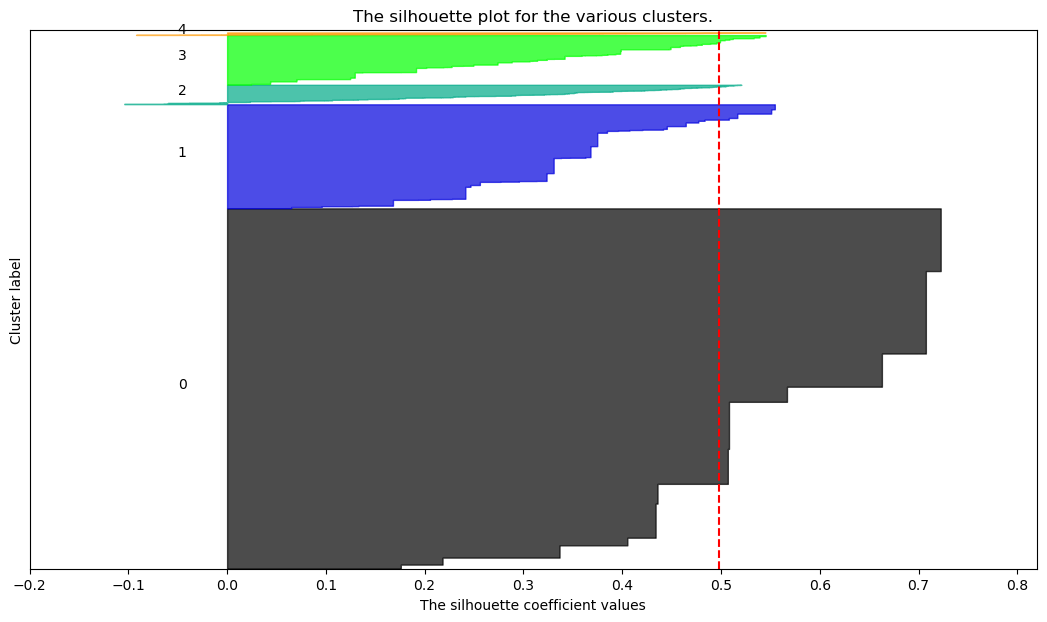

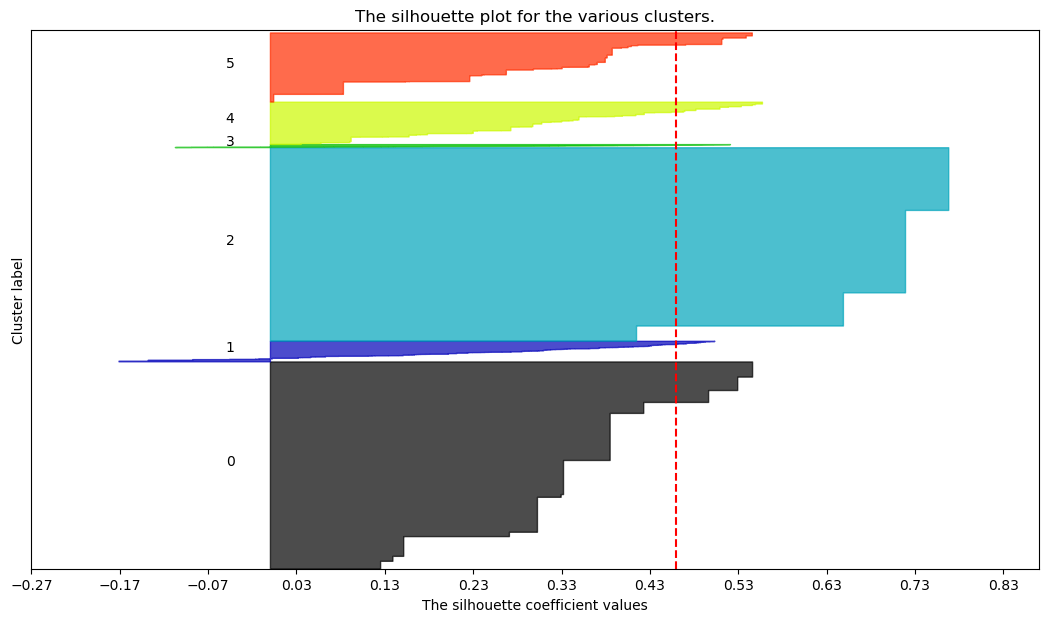

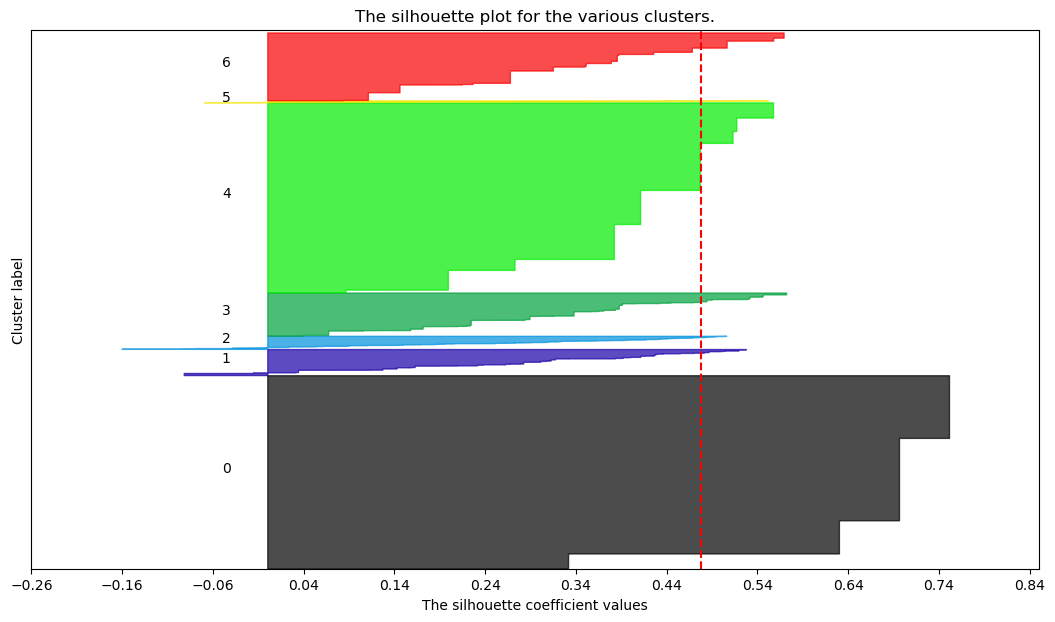

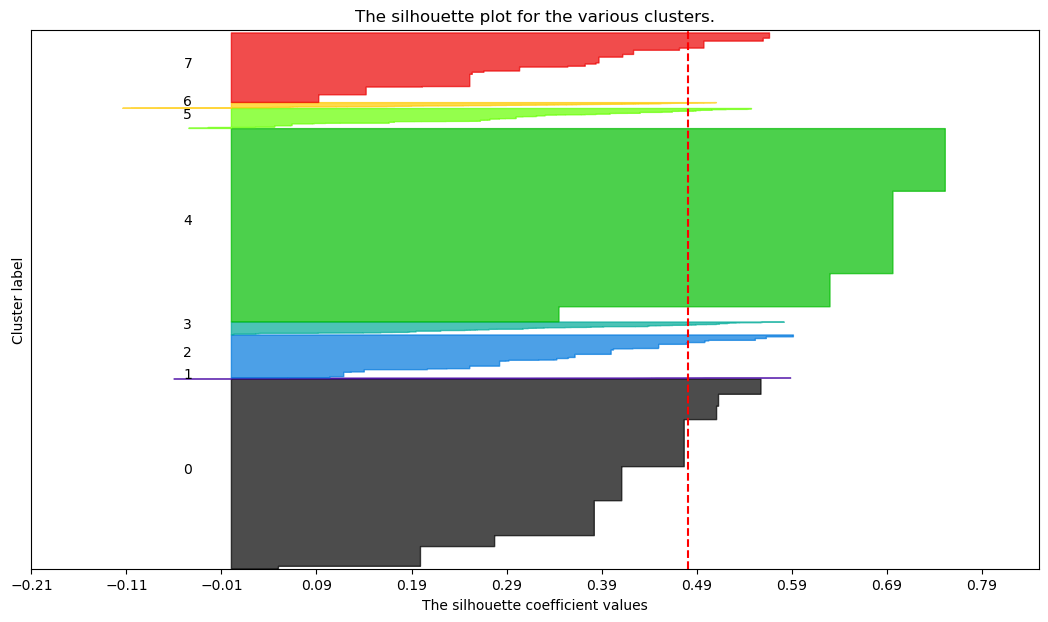

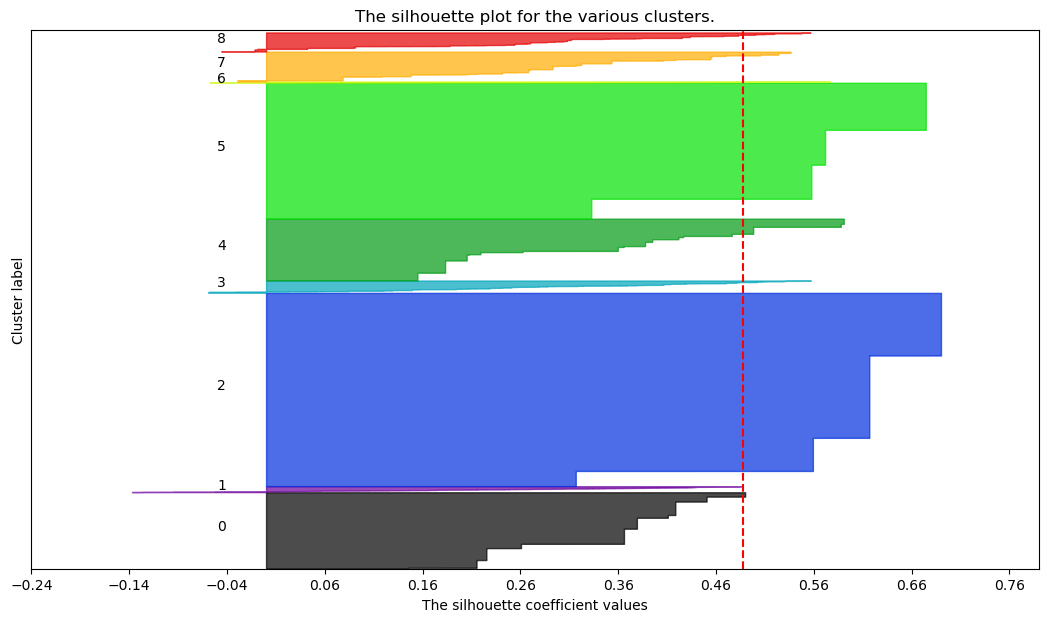

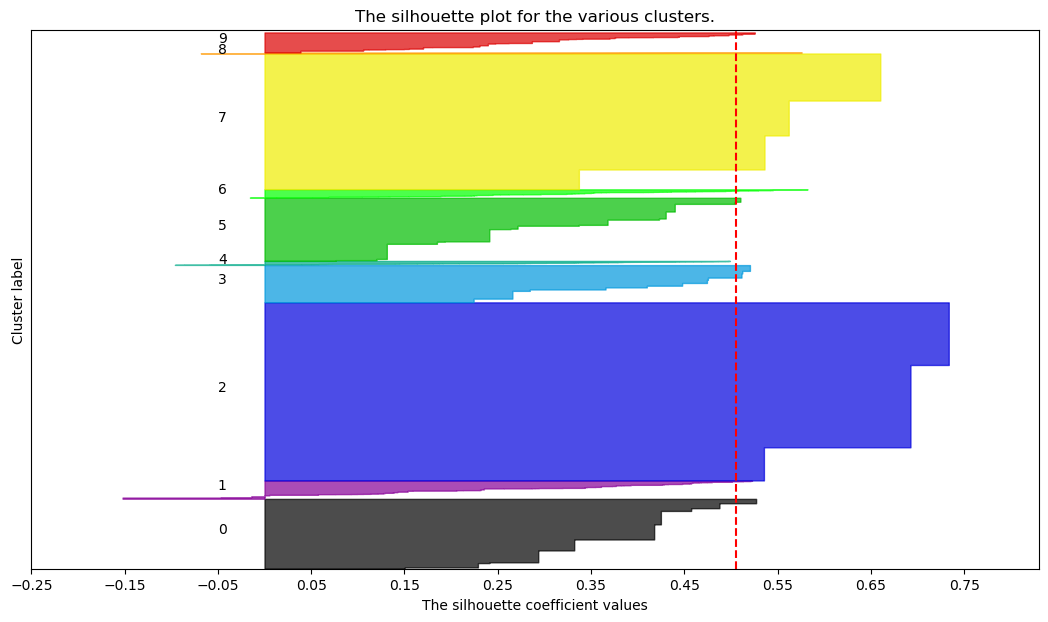

In [44]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(weekday_weekend_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(weekday_weekend_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(weekday_weekend_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [45]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(weekday_weekend_features)
km_labels = kmclust.fit_predict(weekday_weekend_features)

# Characterizing the final clusters
df_concat = pd.concat((weekday_weekend_features, pd.Series(km_labels, name='labels', index=weekday_weekend_features.index)), axis=1)
df_concat.groupby('labels').mean()

weekend_orders  underweekend_orders
labels                                     
0            -0.199228            -0.207090
1             2.292068             2.382517

# Analysis: low spenders, high spenders. Again, dow doesn't show major differences.

<a href="#Index">Back to Index</a>


# <a class='anchor' id='2.8.'></a>
># 2.8. Merge Time of Day and Order Volume


In [68]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
time_of_day_labels = kmclust.fit_predict(time_of_order_features)

#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
order_volume_labels = kmclust.fit_predict(order_volume_features)

df_scaled_new['time_of_day_labels'] = time_of_day_labels
df_scaled_new['order_volume_labels'] = order_volume_labels

In [69]:
pd.crosstab(df_scaled_new['time_of_day_labels'], df_scaled_new['order_volume_labels'])

order_volume_labels      0     1    2     3
time_of_day_labels                         
0                        1  1305  258   475
1                      269   465   65   934
2                    20891   250    0  5663
3                      351   253   36   521

In [64]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening ', 1: 'Graveyard shift', 2: 'Low for All', 3: 'Night'}
order_volume_mapping = {0: 'Low Volume', 1: 'High Volume', 2: 'Medium Volume', 3: 'Very High Volume'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in time_of_day_labels]
order_volume_labels_descriptive = [order_volume_mapping[label] for label in order_volume_labels]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, order_volume_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Order Volume'])


Order Volume               High Volume  Low Volume  Medium Volume  \
Time of Day                                                         
Graveyard shift                    399         315            970   
Low for All                        172       22008           4624   
Morning, Midday, Evening          1073           0            788   
Night                              170         461            507   

Order Volume               Very High Volume  
Time of Day                                  
Graveyard shift                          49  
Low for All                               0  
Morning, Midday, Evening                178  
Night                                    23

In [75]:
# Get centroids of clusters
df_centroids = df_scaled_new.groupby(['time_of_day_labels', 'order_volume_labels']).mean()

df_centroids


# Clusters with low frequency to be merged:
# (behavior_label, product_label)
#to_merge = [(0, 0), (1,0), (3,0), (0,1), (3, 1), (0, 3), (2, 3), (3, 3)]
to_merge = [(0, 0), (1, 0), (3, 0), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (3, 2), (0, 3)]

# Computing the euclidean distance matrix between the centroids
centroid_dists = euclidean = pairwise_distances(df_centroids)

df_dists = pd.DataFrame(
    centroid_dists, 
    columns=df_centroids.index, 
    index=df_centroids.index
)

df_dists


# Merging each low frequency clustering (source) 
# to the closest cluster (target)
source_target = {}

# Filter to_merge to avoid circular merging or merging into empty clusters
valid_clusters = [clus for clus in df_dists.index if clus not in to_merge]

for clus in to_merge:
    if clus not in source_target.values():
        # Get distances to valid clusters only
        distances = df_dists.loc[clus, valid_clusters].sort_values()

        # Find the nearest valid cluster
        if not distances.empty:
            source_target[clus] = distances.index[0]

# Update the DataFrame based on the corrected source_target
df_ = df_scaled_new.copy()

for source, target in source_target.items():
    mask = (df_['time_of_day_labels'] == source[0]) & (df_['order_volume_labels'] == source[1])
    df_.loc[mask, 'time_of_day_labels'] = target[0]
    df_.loc[mask, 'order_volume_labels'] = target[1]

# Check results
print("After merging:")
print(pd.crosstab(df_['time_of_day_labels'], df_['order_volume_labels']))



After merging:
order_volume_labels      0     1     3
time_of_day_labels                    
0                        0  1664     0
1                        0     0  1668
2                    20891     0  6389
3                        0     0  1125


<a href="#Index">Back to Index</a>

In [76]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening ', 1: 'Graveyard shift', 2: 'Low for All', 3: 'Night'}
order_volume_mapping = {0: 'Low Volume', 1: 'High Volume', 2: 'Medium Volume', 3: 'Very High Volume'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in df_['time_of_day_labels']]
order_volume_labels_descriptive = [order_volume_mapping[label] for label in df_['order_volume_labels']]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, order_volume_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Order Volume'])

Order Volume               High Volume  Low Volume  Very High Volume
Time of Day                                                         
Graveyard shift                      0           0              1668
Low for All                          0       20891              6389
Morning, Midday, Evening          1664           0                 0
Night                                0           0              1125

# <a class='anchor' id='2.9.'></a>
# 2.9. Cluster Analysis
 **From ChatGPT (I think it is wrong about what 'Low for All' really is, but there is some good stuff here)**

2. Observations
Graveyard Shift:

Most orders during this period are in Medium Volume (984 orders) or Low Volume (323 orders), indicating sporadic demand.
Few orders are in High Volume (385) or Very High Volume (41), showing minimal large-scale activity.
Low for All:

Dominated by Low Volume orders (21,392), suggesting these hours are very quiet overall.
Minimal activity in other volume categories (e.g., 140 for High Volume and 5,272 for Medium Volume).
Morning, Midday, Evening:

A significant portion of orders falls into Low Volume (1,284), showing some downtime even during these periods.
Moderate presence in Medium Volume (535) and Very High Volume (220), reflecting meal-related peaks.
Night:

Moderate activity spread across Low Volume (382), Medium Volume (506), and High Volume (243), indicating a balanced order pattern.
Few Very High Volume orders (30), showing limited promotional or event-driven spikes.



3. Business Implications
Graveyard Shift:

Consider optimizing delivery operations for cost-efficiency during these hours (e.g., fewer drivers or consolidating deliveries).
Marketing campaigns targeting late-night users (e.g., discounts for night owls) could boost activity in High Volume or Very High Volume categories.
Low for All:

This cluster shows consistently low activity, possibly representing non-core operating hours.
Consider reducing operational overhead (e.g., fewer active drivers or limited service availability) to cut costs during these hours.
Morning, Midday, Evening:

These are peak business hours where Medium Volume and Very High Volume orders dominate. Focus on:
Ensuring sufficient delivery capacity (drivers, vehicles).
Enhancing promotions or partnerships with popular restaurants.
Minimizing delays, as higher activity could strain resources.
Night:

Reflects balanced activity with a healthy spread across volume categories. Recommendations include:
Targeted marketing for social or entertainment-driven orders.
Testing late-night-exclusive menu options or deals.




4. Actionable Strategies
Optimize Operational Hours:

Shift resources (e.g., drivers and promotions) toward peak periods like "Morning, Midday, Evening" and reduce focus on "Low for All."
Dynamic Pricing:

Introduce surge pricing during High Volume and Very High Volume periods to maximize profits.
Offer discounts during the "Graveyard Shift" to stimulate demand.
Segmented Marketing Campaigns:

Graveyard Shift: Focus on late-night workers and students with promotions.
Morning, Midday, Evening: Highlight popular meal combos or lunch deals.
Night: Promote desserts, snacks, or alcohol pairings.
Resource Allocation:

Use this analysis to adjust driver schedules, ensuring coverage aligns with peak demand and minimizes downtime costs.

<a href="#Index">Back to Index</a>

CLAUDE was used to generate following code


Creating merged segments...

Segment Distribution:
                       Segment  Count  Percentage
0  High Volume - Low Frequency  26099       82.24
1      Low Volume - Day Active   1842        5.80
2     High Volume - Night Owls   1025        3.23
3  High Volume - Night Focused    775        2.44
4      Low Volume - Night Owls    708        2.23
5   Low Volume - Low Frequency    705        2.22
6   Low Volume - Night Focused    386        1.22
7     High Volume - Day Active    197        0.62

Generating visualizations...


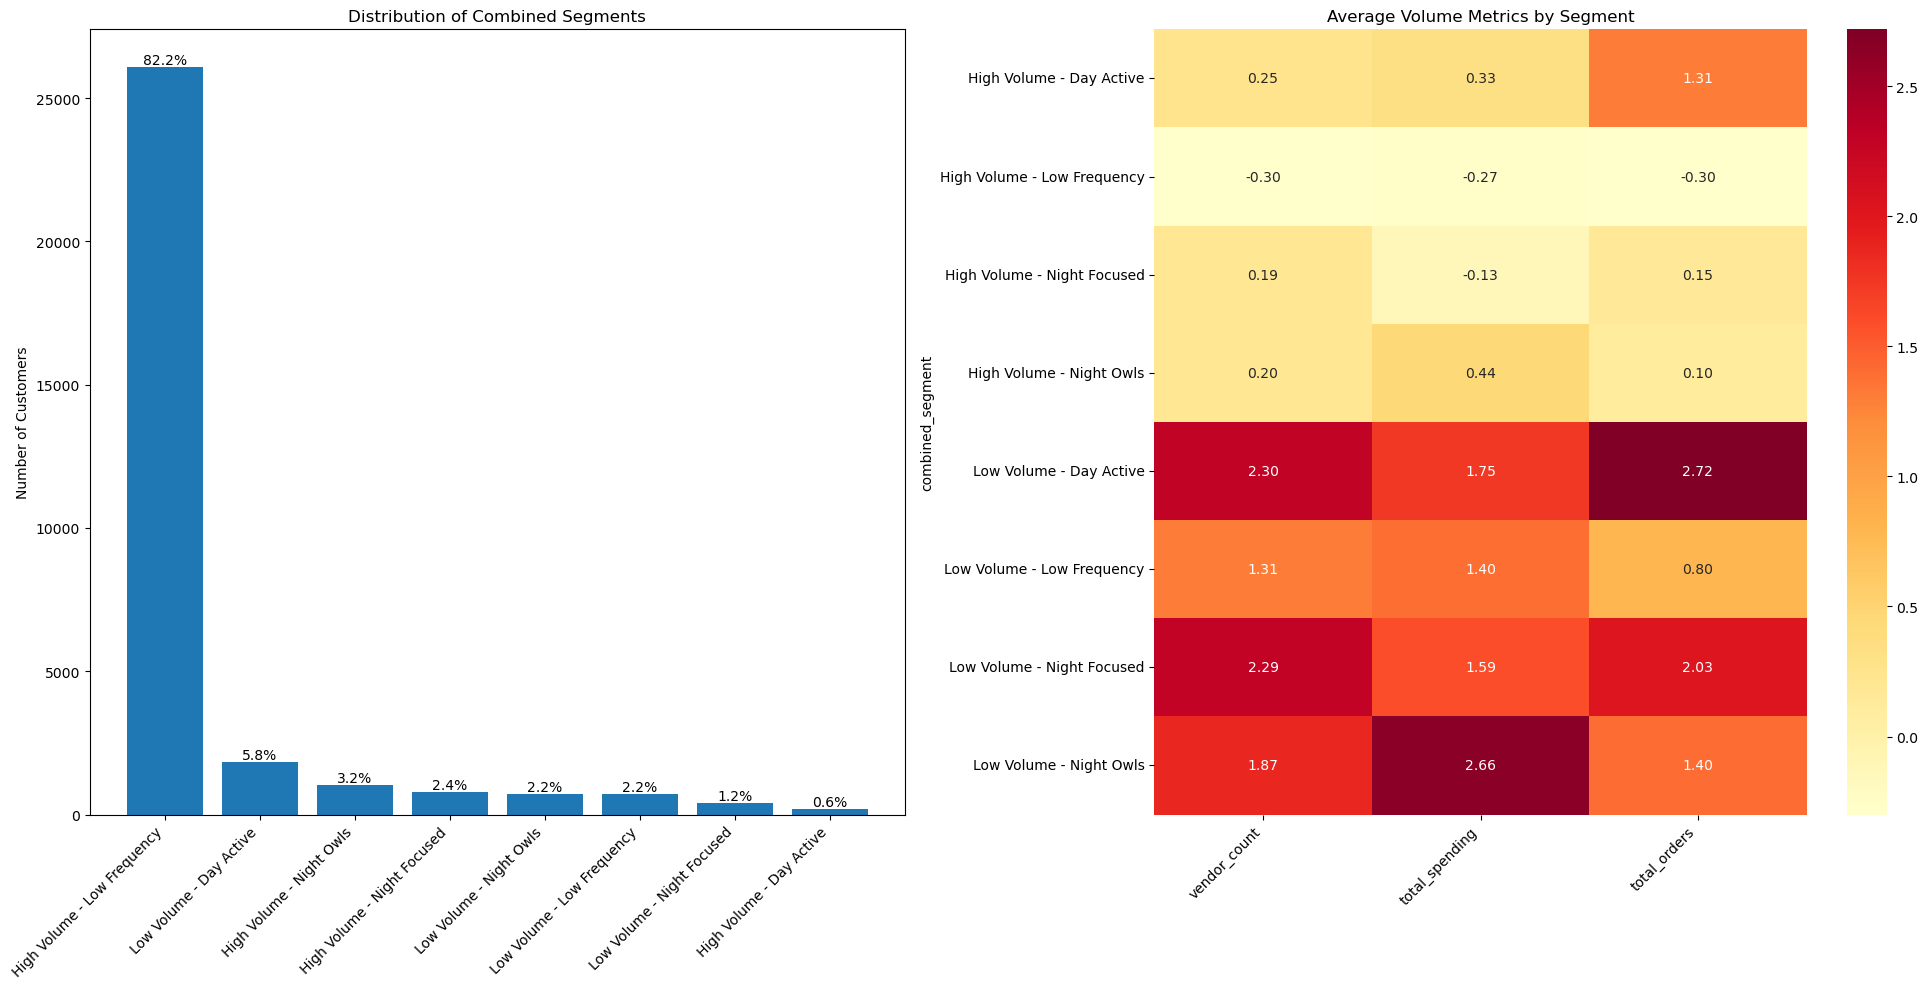

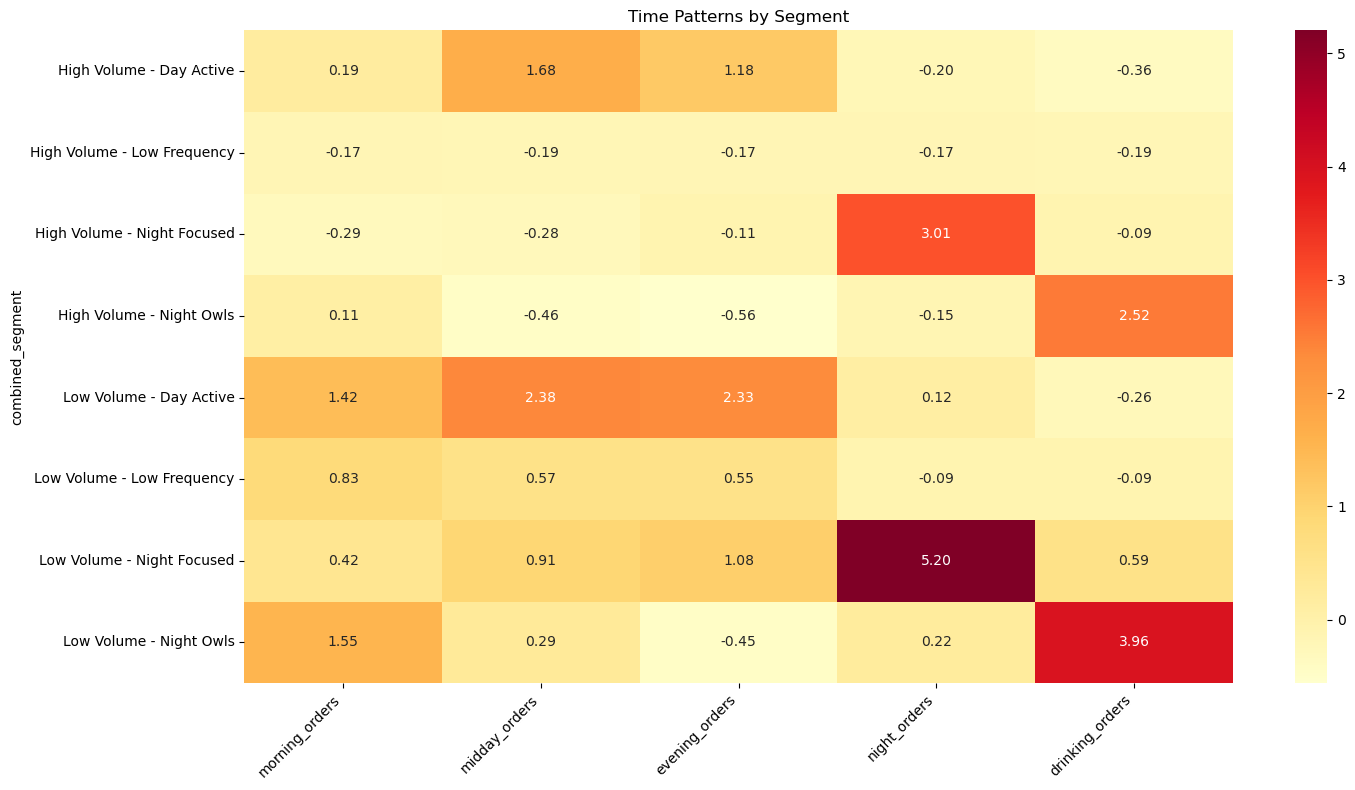


Generating detailed segment analysis...

Detailed Segment Analysis:

Segment: High Volume - Low Frequency
Number of customers: 26099 (82.2%)

Average metrics:
vendor_count: -0.30
total_spending: -0.27
total_orders: -0.30
morning_orders: -0.17
midday_orders: -0.19
evening_orders: -0.17
night_orders: -0.17
drinking_orders: -0.19
--------------------------------------------------------------------------------

Segment: High Volume - Night Focused
Number of customers: 775 (2.4%)

Average metrics:
vendor_count: 0.19
total_spending: -0.13
total_orders: 0.15
morning_orders: -0.29
midday_orders: -0.28
evening_orders: -0.11
night_orders: 3.01
drinking_orders: -0.09
--------------------------------------------------------------------------------

Segment: Low Volume - Low Frequency
Number of customers: 705 (2.2%)

Average metrics:
vendor_count: 1.31
total_spending: 1.40
total_orders: 0.80
morning_orders: 0.83
midday_orders: 0.57
evening_orders: 0.55
night_orders: -0.09
drinking_orders: -0.09
--

In [107]:
# First, recreate your time-based clustering
time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 
                                      'night_orders', 'twilight_orders']]

# Create time-based clusters with k=4 as per your previous analysis
kmclust_time = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
time_labels = kmclust_time.fit_predict(time_of_order_features)

# Your existing volume-based clustering
order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]
kmclust_volume = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
volume_labels = kmclust_volume.fit_predict(order_volume_features)

def create_merged_segments(df, volume_labels, time_labels):
    """
    Creates merged segments from volume and time clusters.
    Uses your existing cluster assignments to create meaningful combined segments.
    """
    # Create a copy of the dataframe to avoid warnings
    df = df.copy()
    
    # Add cluster labels
    df['volume_segment'] = volume_labels
    df['time_segment'] = time_labels
    
    # Create descriptive labels for volume segments
    volume_names = {
        0: 'Low Volume',    # Your cluster with negative means
        1: 'High Volume'    # Your cluster with positive means
    }
    
    # Create descriptive labels for time segments based on your analysis
    time_names = {
        0: 'Day Active',
        1: 'Night Owls',
        2: 'Low Frequency',
        3: 'Night Focused'
    }
    
    # Map the numeric labels to descriptive names
    df['volume_segment'] = df['volume_segment'].map(volume_names)
    df['time_segment'] = df['time_segment'].map(time_names)
    
    # Create combined segment labels
    df['combined_segment'] = df['volume_segment'] + ' - ' + df['time_segment']
    
    # Calculate segment counts and percentages
    segment_counts = df['combined_segment'].value_counts().reset_index()
    segment_counts.columns = ['Segment', 'Count']
    segment_counts['Percentage'] = (segment_counts['Count'] / len(df) * 100).round(2)
    
    return df, segment_counts

def plot_merged_segments(df, segment_counts):
    """
    Creates comprehensive visualizations for the merged segments.
    Shows distribution and characteristics of each combined segment.
    """
    # Create figure for segment distribution
    plt.figure(figsize=(20, 10))
    
    # Plot 1: Segment size distribution
    plt.subplot(1, 2, 1)
    bars = plt.bar(segment_counts['Segment'], segment_counts['Count'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Combined Segments')
    plt.ylabel('Number of Customers')
    
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height/len(df)*100:.1f}%',
                ha='center', va='bottom')
    
    # Plot 2: Volume metrics by segment
    plt.subplot(1, 2, 2)
    volume_metrics = ['vendor_count', 'total_spending', 'total_orders']
    segment_means = df.groupby('combined_segment')[volume_metrics].mean()
    
    sns.heatmap(segment_means, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Average Volume Metrics by Segment')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Additional plot for time patterns
    plt.figure(figsize=(15, 8))
    time_cols = ['morning_orders', 'midday_orders', 'evening_orders', 
                 'night_orders', 'twilight_orders']
    
    time_patterns = df.groupby('combined_segment')[time_cols].mean()
    sns.heatmap(time_patterns, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Time Patterns by Segment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_segments(df):
    """
    Provides detailed statistical analysis for each combined segment.
    """
    segments = df['combined_segment'].unique()
    metrics = ['vendor_count', 'total_spending', 'total_orders', 
              'morning_orders', 'midday_orders', 'evening_orders', 
              'night_orders', 'twilight_orders']
    
    print("\nDetailed Segment Analysis:")
    print("=" * 80)
    
    for segment in segments:
        segment_data = df[df['combined_segment'] == segment]
        print(f"\nSegment: {segment}")
        print(f"Number of customers: {len(segment_data)} ({len(segment_data)/len(df)*100:.1f}%)")
        print("\nAverage metrics:")
        for metric in metrics:
            print(f"{metric}: {segment_data[metric].mean():.2f}")
        print("-" * 80)

# Execute the analysis
print("Creating merged segments...")
merged_df, segment_counts = create_merged_segments(df_scaled_new, volume_labels, time_labels)

print("\nSegment Distribution:")
print(segment_counts)

print("\nGenerating visualizations...")
plot_merged_segments(merged_df, segment_counts)

print("\nGenerating detailed segment analysis...")
analyze_segments(merged_df)

Claude:
Segment Analysis by Volume and Time Patterns:

1. High Volume - Low Frequency (82.24% of customers)
Looking deeper at the metrics:
- The consistent negative values (-0.17 to -0.30) across all metrics suggest these customers have established but minimal ordering patterns
- Their ordering behavior shows remarkable consistency across time periods, indicating they don't have strong time preferences
- The combination of high volume classification but low frequency behavior suggests these might be customers who made several orders initially but haven't maintained that pace
- Key insight: This segment represents your greatest opportunity for growth, as even a small increase in engagement could have massive impact due to their large numbers

2. Low Volume - Day Active (5.80% of customers)
The metrics tell an interesting story:
- Their vendor count (2.30) combined with high total orders (2.72) suggests these customers are both exploratory and loyal
- The progression of their daytime activity (morning: 1.42 → midday: 2.38 → evening: 2.33) shows a clear work-day pattern
- The slightly positive night orders (0.12) but negative drinking orders (-0.26) suggests they occasionally order dinner but rarely late night
- Key insight: These customers are likely professionals or businesses with predictable ordering patterns and high value potential

3. High Volume - Night Owls (3.23% of customers)
Examining the timing patterns:
- Morning activity is slightly positive (0.11) while evening is strongly negative (-0.56)
- The dramatic spike in drinking hours (2.52) combined with negative evening orders suggests these customers start ordering late and continue into early morning
- Their moderate volume metrics (vendor_count: 0.20, total_spending: 0.44) indicate they're loyal to specific vendors during their preferred hours
- Key insight: This segment might represent entertainment industry workers or venues with very specific operational hours

4. Low Volume - Night Focused (1.22% of customers)
The metrics reveal a fascinating pattern:
- Extremely high night orders (5.20) - the highest intensity of any metric in any segment
- Relatively high vendor count (2.29) and total orders (2.03) despite being "low volume"
- Progressive increase in activity throughout the day (morning: 0.42 → midday: 0.91 → evening: 1.08)
- Key insight: These could be businesses that operate primarily at night, like hotels or late-night entertainment venues

Cross-Pattern Analysis:

1. Volume vs. Time Correlation
- Interesting paradox: "High Volume" segments often show lower actual order volumes than "Low Volume" segments
- This suggests the initial volume classification might be capturing something different than pure order quantity
- The time patterns seem to be stronger predictors of actual ordering behavior than the volume classification

2. Temporal Progression Patterns
Morning → Midday → Evening progression shows three main patterns:
- Increasing (Day Active segments)
- Decreasing (Night Owls)
- Spike pattern (Night Focused)

3. Value Indicators
Looking at total_spending relative to total_orders:
- Low Volume - Night Owls show the highest spending efficiency (spending: 2.66 vs orders: 1.40)
- High Volume - Day Active show balanced metrics (spending: 0.33 vs orders: 1.31)
- This suggests different price sensitivities across segments

Strategic Implications:

1. Customer Journey Optimization
- Create segment-specific onboarding experiences
- Develop targeted retention strategies for each segment
- Focus on moving customers from the majority segment into higher-value segments

2. Operational Excellence
- Staff optimization based on segment-specific peak times
- Vendor relationship management focusing on segment preferences
- Inventory and delivery capacity planning aligned with temporal patterns

3. Marketing and Promotion Strategy
For each segment:

High Volume - Low Frequency (82.24%):
- Focus on reactivation campaigns
- Introduce variety in ordering options
- Create "discovery" promotions to increase engagement

Low Volume - Day Active (5.80%):
- Business lunch packages
- Corporate account programs
- Catering services promotion

High Volume - Night Owls (3.23%):
- Late-night exclusive menus
- Special after-hours promotions
- Partnership with entertainment venues

Low Volume - Night Focused (1.22%):
- Premium night delivery service
- Special night menu options
- 24/7 customer support

4. Growth Opportunities:

Vertical Growth:
- Increase order frequency in the majority segment
- Expand average order value in high-spending segments
- Develop loyalty programs aligned with segment behaviors

Horizontal Growth:
- Target similar businesses/customers within each segment
- Expand service offerings based on segment-specific needs
- Create cross-segment promotion strategies


<a href="#Index">Back to Index</a>

# <a class='anchor' id='3.'></a>
># 3. Age Perspective

In [119]:
age_order_volume = df_scaled_new[['customer_age', 'total_spending', 'total_orders']]

In [120]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(age_order_volume)
    inertia.append(kmclust.inertia_)  

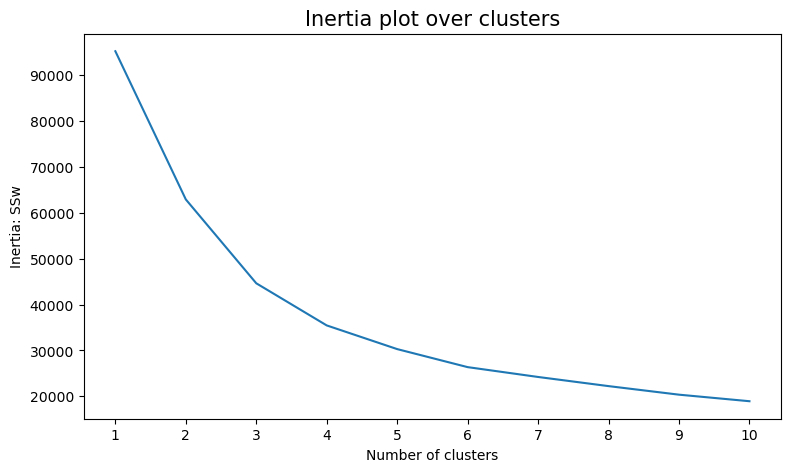

In [121]:

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.593417434898719
For n_clusters = 3, the average silhouette_score is : 0.4199902008621633
For n_clusters = 4, the average silhouette_score is : 0.44144320109952606
For n_clusters = 5, the average silhouette_score is : 0.3375393785741815
For n_clusters = 6, the average silhouette_score is : 0.34459615560884727
For n_clusters = 7, the average silhouette_score is : 0.35673738850811165
For n_clusters = 8, the average silhouette_score is : 0.30952779258178725
For n_clusters = 9, the average silhouette_score is : 0.3129984604317173
For n_clusters = 10, the average silhouette_score is : 0.32270019344459483


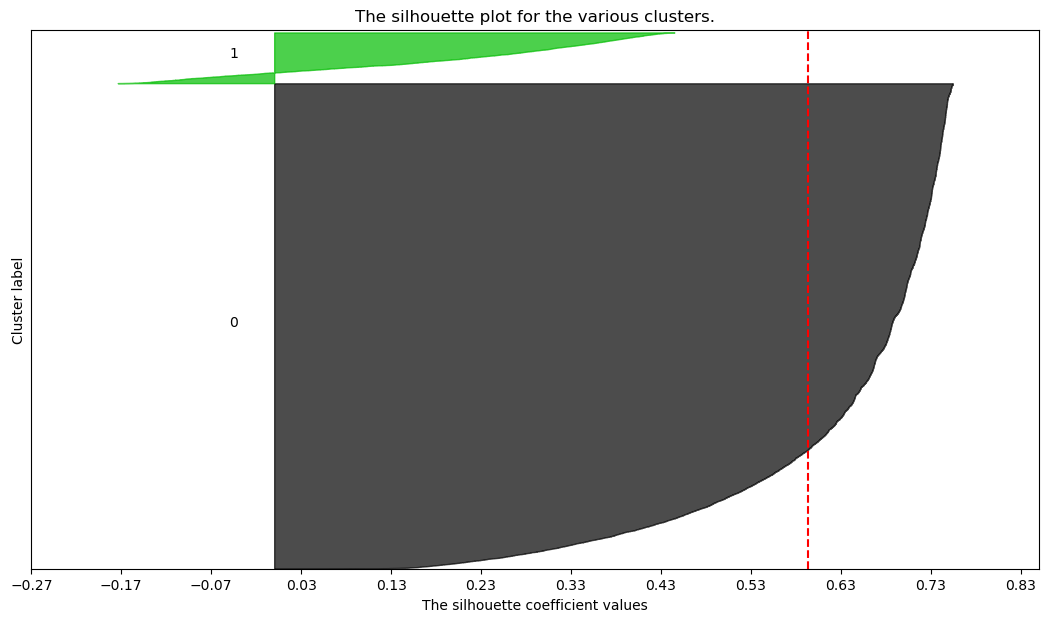

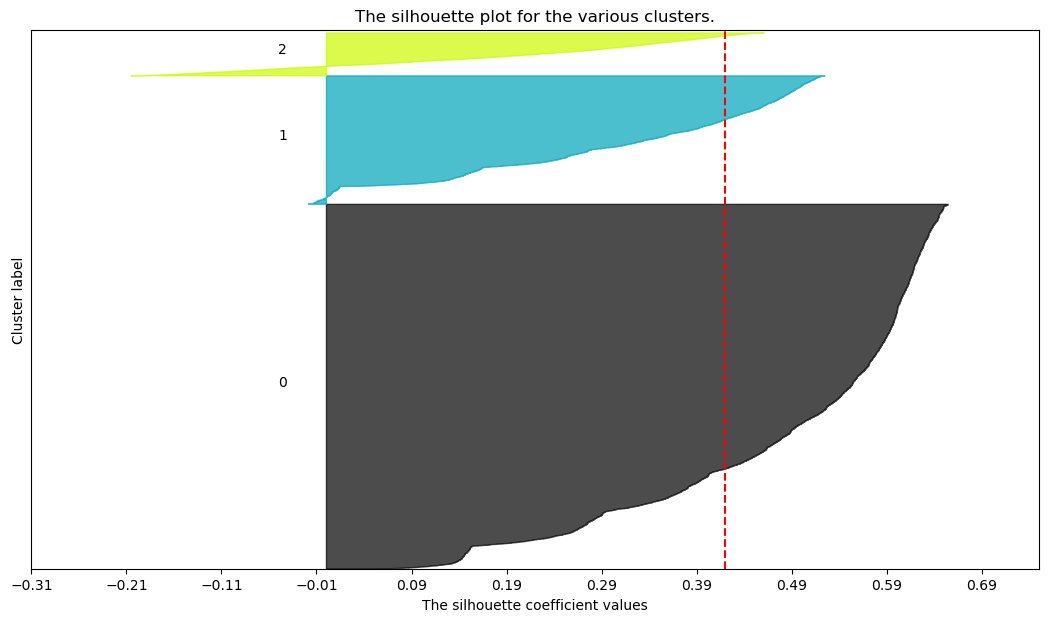

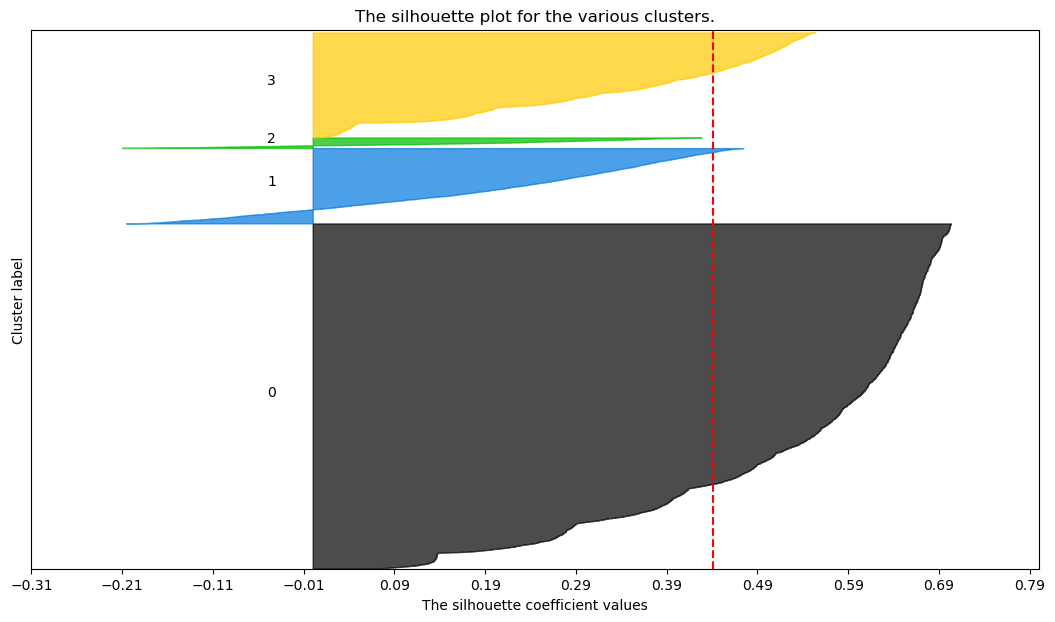

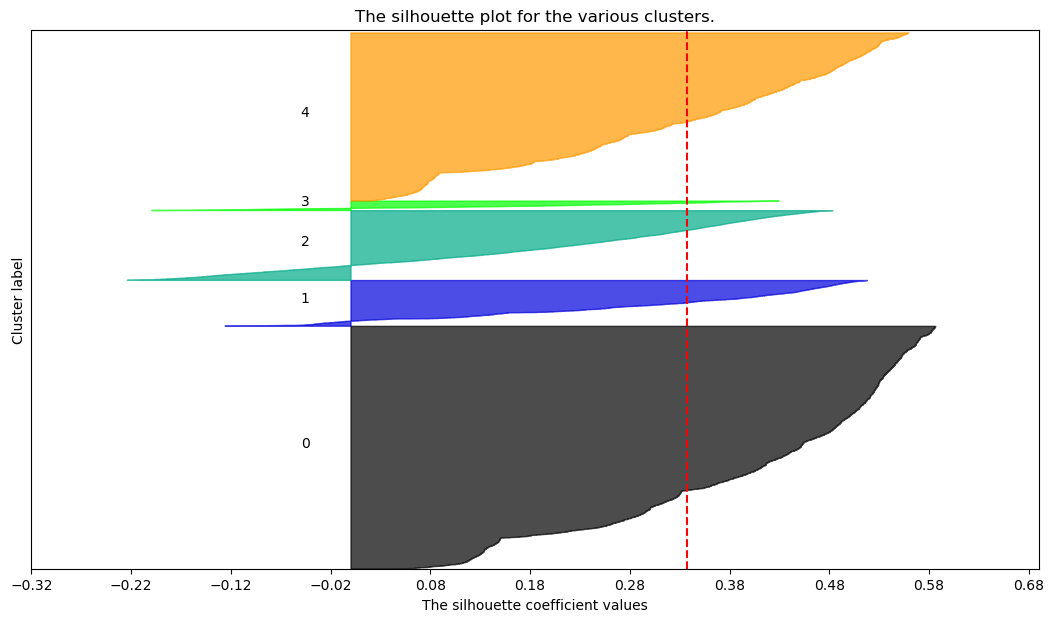

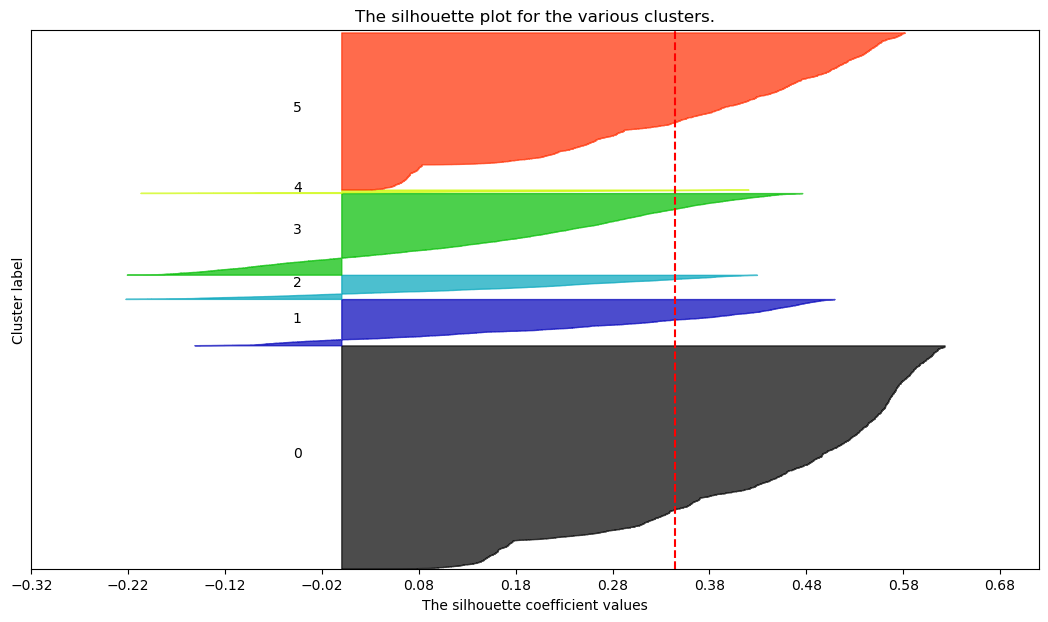

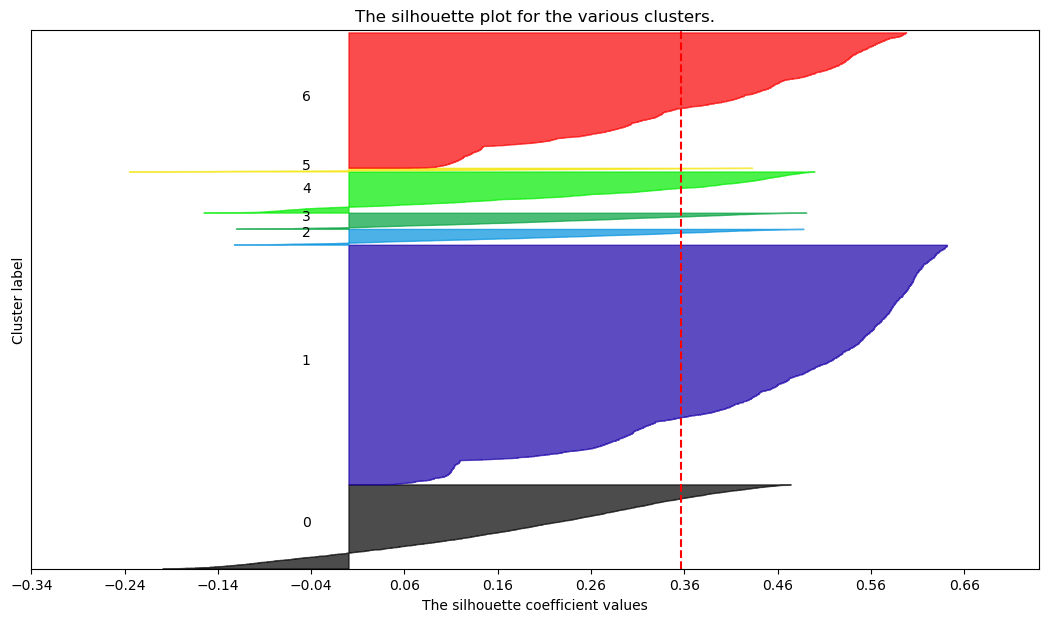

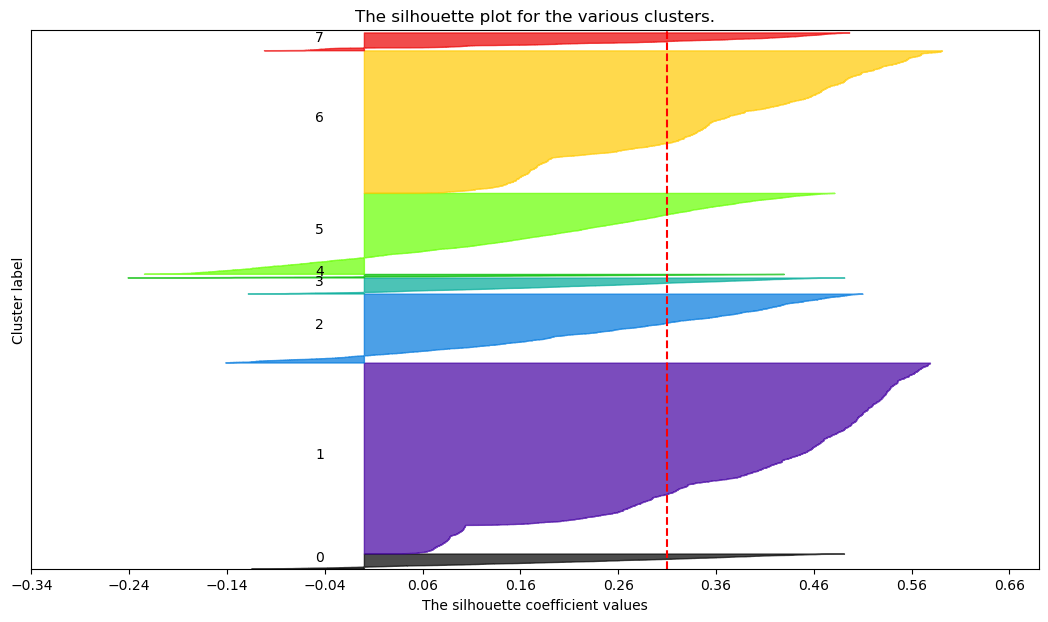

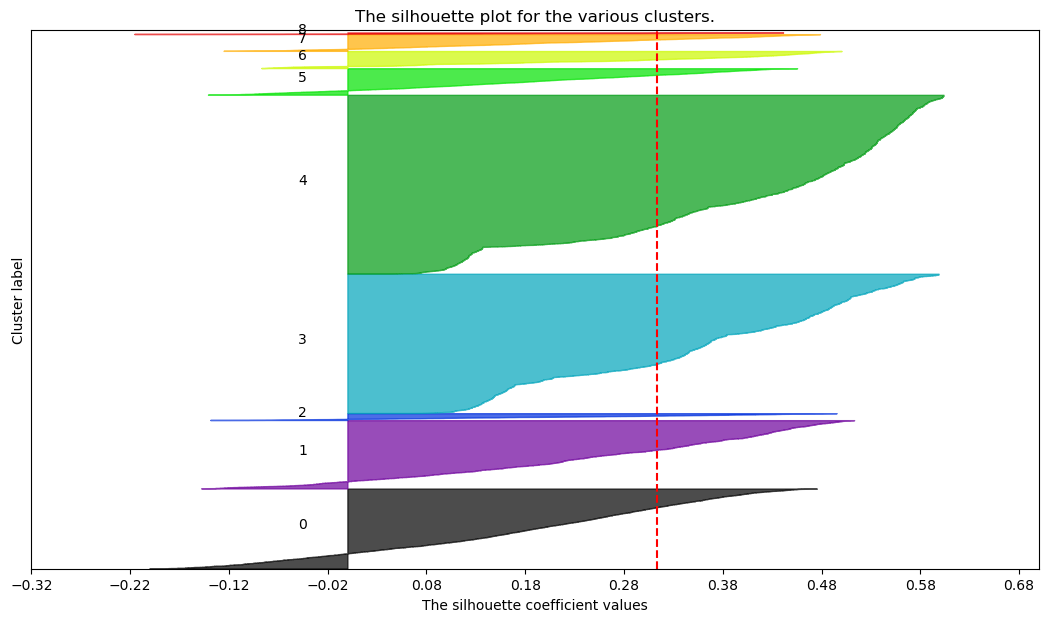

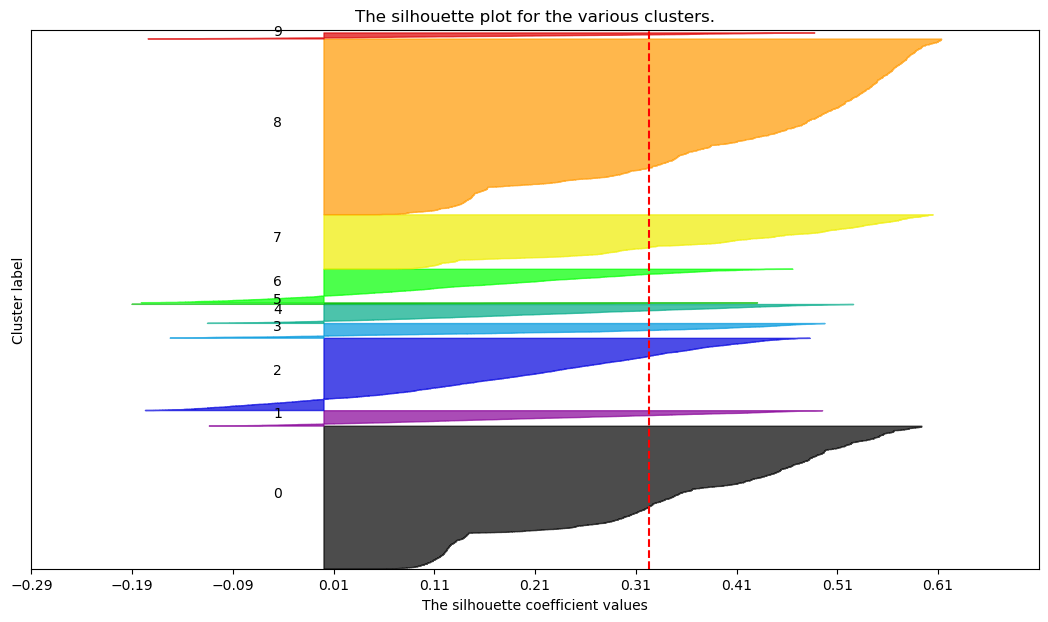

In [122]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(age_order_volume)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(age_order_volume, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(age_order_volume, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [67]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(age_order_volume)
km_labels = kmclust.fit_predict(age_order_volume)

# Characterizing the final clusters
df_concat = pd.concat((age_order_volume, pd.Series(km_labels, name='labels', index=age_order_volume.index)), axis=1)
df_concat.groupby('labels').mean()

customer_age  total_spending  total_orders
labels                                            
0          -0.002738       -0.230014     -0.231103
1           0.026208        2.201682      2.212104

<a href="#Index">Back to Index</a>

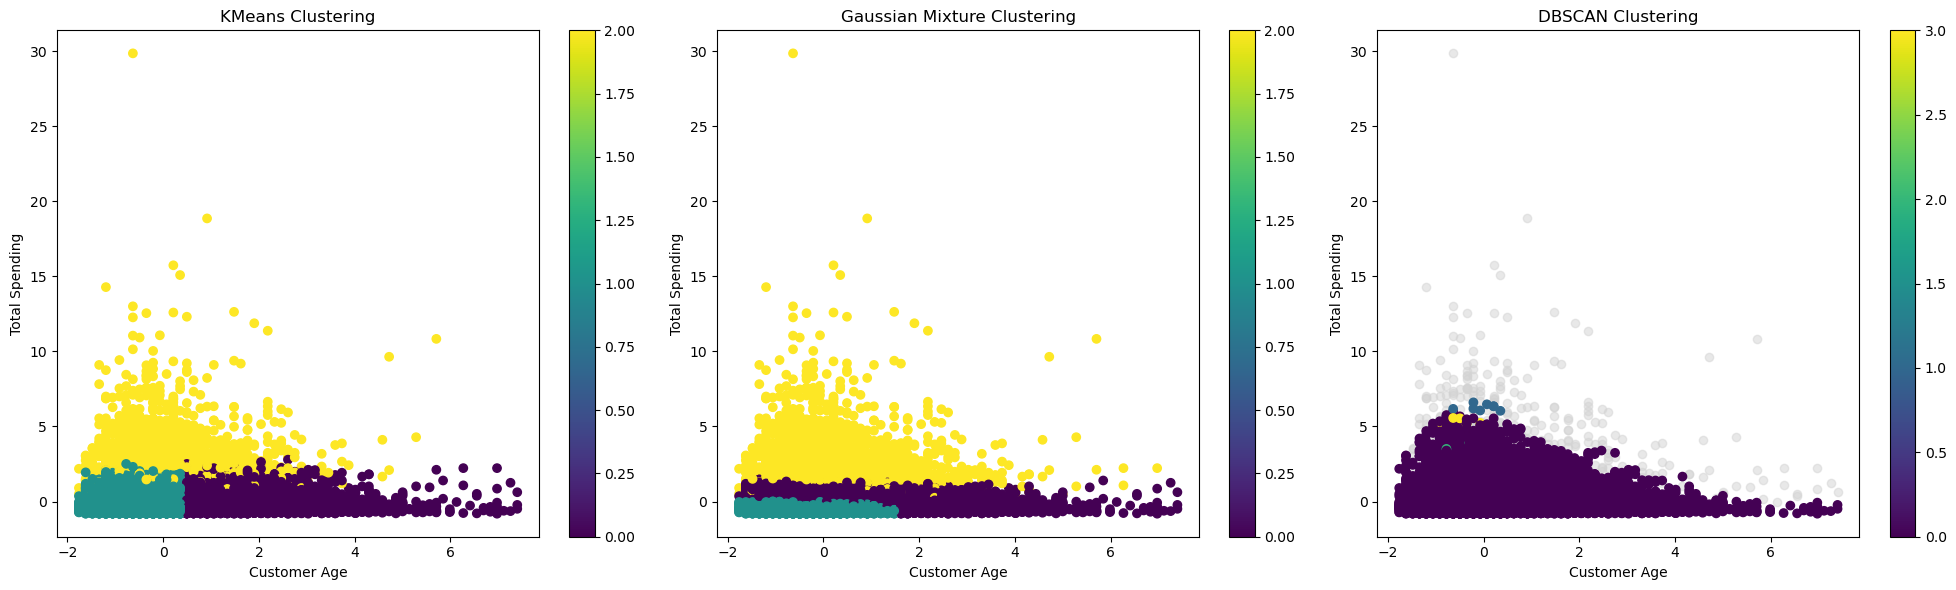

Clustering Performance Metrics:

Silhouette Scores:
KMeans: 0.420
GMM: 0.245
DBSCAN: 0.728

Cluster Sizes:
KMeans: [ 7602 21603  2532]
GMM: [11175 17039  3523]
DBSCAN: [31393     8     9     8] (Noise points: 319)

KMeans Cluster Characteristics:

Cluster 0:
Size: 7602 customers
Average age: 1.3
Average spending: -0.19
Average orders: -0.19

Cluster 1:
Size: 21603 customers
Average age: -0.5
Average spending: -0.22
Average orders: -0.22

Cluster 2:
Size: 2532 customers
Average age: -0.1
Average spending: 2.41
Average orders: 2.41

GMM Cluster Characteristics:

Cluster 0:
Size: 11175 customers
Average age: 0.4
Average spending: 0.09
Average orders: 0.08

Cluster 1:
Size: 17039 customers
Average age: -0.3
Average spending: -0.47
Average orders: -0.47

Cluster 2:
Size: 3523 customers
Average age: 0.1
Average spending: 1.99
Average orders: 2.00

DBSCAN Cluster Characteristics:

Cluster 0:
Size: 31393 customers
Average age: -0.0
Average spending: -0.05
Average orders: -0.05

Cluster 1:
Size

In [125]:
# Initialize our clustering algorithms with appropriate parameters
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters for more nuanced age groups
gmm = GaussianMixture(n_components=3, random_state=42)  # Matching KMeans clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjusted for your data scale

# Fit each algorithm and get cluster labels
kmeans_labels = kmeans.fit_predict(age_order_volume)
gmm_labels = gmm.fit_predict(age_order_volume)
dbscan_labels = dbscan.fit_predict(age_order_volume)

# Create figure with three subplots for comparing methods
fig, axs = plt.subplots(1, 3, figsize=(20,6))

# Function to create scatter plots with consistent styling
def plot_clusters(ax, x, y, labels, title, noise_mask=None):
    if noise_mask is not None:
        # Plot noise points first (if DBSCAN)
        ax.scatter(x[~noise_mask], y[~noise_mask], 
                  c='lightgray', label='Noise', alpha=0.5)
        # Plot clustered points
        scatter = ax.scatter(x[noise_mask], y[noise_mask], 
                           c=labels[noise_mask], cmap='viridis')
    else:
        # Plot all points for KMeans and GMM
        scatter = ax.scatter(x, y, c=labels, cmap='viridis')
    
    ax.set_title(f'{title} Clustering')
    ax.set_xlabel('Customer Age')
    ax.set_ylabel('Total Spending')
    return scatter

# Plot KMeans results
scatter_kmeans = plot_clusters(axs[0], 
                             age_order_volume['customer_age'],
                             age_order_volume['total_spending'],
                             kmeans_labels, 
                             'KMeans')

# Plot GMM results
scatter_gmm = plot_clusters(axs[1],
                          age_order_volume['customer_age'],
                          age_order_volume['total_spending'],
                          gmm_labels,
                          'Gaussian Mixture')

# Plot DBSCAN results
mask = dbscan_labels != -1
scatter_dbscan = plot_clusters(axs[2],
                             age_order_volume['customer_age'],
                             age_order_volume['total_spending'],
                             dbscan_labels,
                             'DBSCAN',
                             mask)

# Add colorbars
for ax, scatter in zip(axs, [scatter_kmeans, scatter_gmm, scatter_dbscan]):
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

# Calculate and print clustering metrics
print("Clustering Performance Metrics:\n" + "="*30)

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(age_order_volume, kmeans_labels)
gmm_silhouette = silhouette_score(age_order_volume, gmm_labels)
dbscan_silhouette = silhouette_score(age_order_volume[mask], dbscan_labels[mask]) if mask.any() else 0

print(f"\nSilhouette Scores:")
print(f"KMeans: {kmeans_silhouette:.3f}")
print(f"GMM: {gmm_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette:.3f}")

# Print cluster sizes
print(f"\nCluster Sizes:")
print(f"KMeans: {np.bincount(kmeans_labels)}")
print(f"GMM: {np.bincount(gmm_labels)}")
print(f"DBSCAN: {np.bincount(dbscan_labels[mask])} (Noise points: {(~mask).sum()})")

# Analyze cluster characteristics
def analyze_clusters(data, labels, method_name):
    print(f"\n{method_name} Cluster Characteristics:")
    for cluster in range(labels.max() + 1):
        cluster_data = data[labels == cluster]
        print(f"\nCluster {cluster}:")
        print(f"Size: {len(cluster_data)} customers")
        print(f"Average age: {cluster_data['customer_age'].mean():.1f}")
        print(f"Average spending: {cluster_data['total_spending'].mean():.2f}")
        print(f"Average orders: {cluster_data['total_orders'].mean():.2f}")

# Analyze each clustering method
analyze_clusters(age_order_volume, kmeans_labels, "KMeans")
analyze_clusters(age_order_volume, gmm_labels, "GMM")
if mask.any():
    analyze_clusters(age_order_volume[mask], dbscan_labels[mask], "DBSCAN")

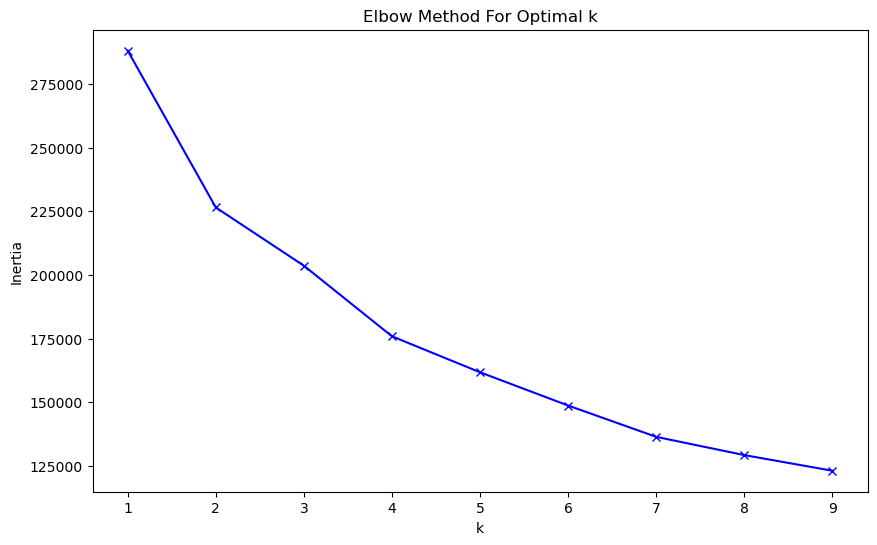

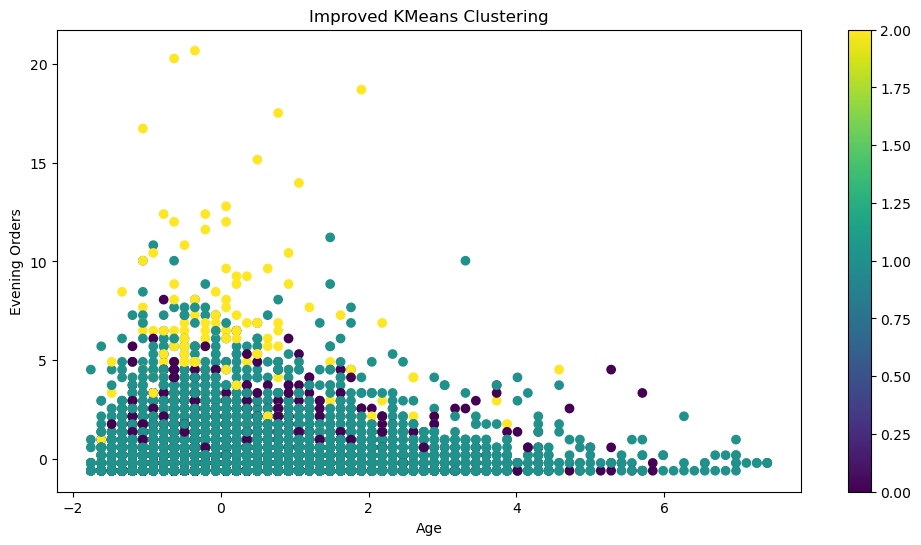


Cluster 0 Profile:
Size: 5390
Average Age: 0.0
Average Evening Orders: -0.1
Peak Order Time: morning_orders

Cluster 1 Profile:
Size: 25805
Average Age: -0.0
Average Evening Orders: -0.0
Peak Order Time: midday_orders

Cluster 2 Profile:
Size: 542
Average Age: -0.1
Average Evening Orders: 2.3
Peak Order Time: morning_orders


In [47]:
# Improved KMeans implementation
# Use RobustScaler to handle outliers better
scaler = RobustScaler()
scaled_features = scaler.fit_transform(scaled_age_time)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
scaled_pca = pca.fit_transform(scaled_features)

# Find optimal clusters using elbow method
inertias = []
for k in range(1, 10):
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(scaled_pca)
   inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Final KMeans with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_pca)

# Visualize results
plt.figure(figsize=(12,6))
scatter = plt.scatter(scaled_age_time['customer_age'], 
                    scaled_age_time['evening_orders'],
                    c=clusters, 
                    cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Age')
plt.ylabel('Evening Orders')
plt.title('Improved KMeans Clustering')
plt.show()

# Analyze clusters
for i in range(3):
   cluster_data = scaled_age_time[clusters == i]
   print(f"\nCluster {i} Profile:")
   print(f"Size: {len(cluster_data)}")
   print(f"Average Age: {cluster_data['customer_age'].mean():.1f}")
   print(f"Average Evening Orders: {cluster_data['evening_orders'].mean():.1f}")
   print(f"Peak Order Time: {cluster_data[['morning_orders','midday_orders','evening_orders']].idxmax(axis=1).mode()[0]}")

<a href="#Index">Back to Index</a>

# Claude explain

# <a class='anchor' id='4.'></a>
# 4. Customer Time-of-Day Ordering Patterns: A Detailed Analysis

Our analysis of customer ordering patterns reveals a fascinating story about how different groups of customers interact with the food delivery service throughout the day. Through careful statistical analysis using KMeans clustering, we've uncovered three distinct customer segments, each with its own unique characteristics and behaviors.

## Analysis Approach

We began by carefully preparing our data to ensure the most accurate results possible. This involved using robust scaling techniques to handle outliers effectively - this was particularly important given the wide variation in ordering frequencies we observed. We then applied Principal Component Analysis (PCA) to distill the most important patterns in the data while maintaining 95% of the original information. This helped us focus on the most meaningful differences between customer groups.

## The Three Customer Segments

The largest segment, which we call the "Mainstream Midday Customers," represents about 81.4% of all customers (25,805 individuals). These customers form the backbone of the business, showing consistent ordering patterns centered around lunch hours. Their behavior suggests they might be office workers or others who regularly order lunch delivery, forming a reliable and predictable customer base.

The second largest group, the "Morning Preference Group," makes up 17% of customers (5,390 individuals). These customers show a marked preference for morning orders, suggesting they might be early risers, business professionals having breakfast meetings, or perhaps cafes and offices ordering morning supplies. What's particularly interesting about this group is their below-average evening ordering, indicating a clear time-of-day preference that could be leveraged for targeted marketing.

Perhaps the most intriguing segment is the "Evening Power Users," comprising just 1.6% of customers (542 individuals). Despite their small size, this group shows remarkably different behavior, ordering significantly more during evening hours - more than 2.3 standard deviations above the average. They also show a secondary peak in morning orders, suggesting they might be highly engaged customers who rely heavily on food delivery services throughout the day.

## Business Implications and Future Opportunities

This segmentation reveals several important insights about the business. First, the heavy concentration of customers in the midday segment suggests that the business has successfully captured the lunch delivery market. However, the relatively small size of the evening segment, combined with their high engagement levels, hints at a significant growth opportunity. There might be untapped potential in converting more customers into evening users through targeted marketing and service improvements.

The morning segment presents another interesting opportunity. With 17% of customers showing a strong morning preference, there's potential to develop specialized breakfast offerings or early-day promotions to further strengthen this market.

Looking ahead, these insights suggest several strategic directions. The business could focus on growing the evening segment by understanding what makes the current evening power users so engaged and trying to replicate those conditions for other customers. Additionally, there's potential to develop time-specific offerings that better cater to each segment's unique needs and preferences.

This analysis also highlights the importance of considering time-of-day patterns in business planning. Rather than focusing solely on traditional demographic segments like age or location, understanding these temporal patterns can lead to more effective operational planning and marketing strategies.

Would you like me to elaborate on any particular aspect of these findings, such as the specific characteristics of one of the customer segments or potential strategic implementations?